# **ACCIDENTES, FALLAS Y SECUESTROS DE AERONAVES**

![imagen](https://drive.google.com/uc?id=1qG-twAOrLQJ2RHb24Sf2sA4AAGx1Zb0Y)

\
\
\
**Proyecto Final\
Curso Data Science\
Coderhouse**

Período: del 15/08/23 al 05/03/24

Comisión #46275

Profesores: Fran Azzollini / Dani Galeano / Noe Ferrero (actual)

Tutores: Mariano Rodas / Ariana Burna / Luciano Lisachi (actual)

Lenguaje de programación: [Python](https://www.python.org/)

Alumno: **[Iriarte Leonardo David](https://www.linkedin.com/in/leodaviri/)**

---

# **ABSTRACTO**

**RESUMEN:**

Los accidentes y hechos criminales en aeronaves afecta de forma directa a la población o al menos llama la atención, ya que el acceso al servicio tiene cada vez mayor alcance y todos y cada uno de nosotros/as podemos tomar el siguiente vuelo.\
Al explorar el dataset, consideramos datos de gran interés ya que siempre que un accidente o incidente ocurre, los estudios sobre el caso abundan y se profundizan dejando valiosos registros que podemos utilizar para todo tipo de análisis, incluso respondernos las preguntas más recurrentes y las que quizás todavía no se formularon pero nacen de los patrones encontrados.\
Más allá de la variedad de informes que podamos obtener, la pregunta más importante (y humana) que nos podemos hacer es:

\
- **¿Cuáles son las areonaves y/o las causas que más influyen sobre el número de víctimas fatales?**\
(tomamos como objetivo a predecir la probabilidad de supervivencia)

\

**Dataset:**

La ASN ([Aviation Safety Network](https://aviation-safety.net/) - Red de Seguridad Aérea) es un sitio web de Flight Safety Foundation que realiza un seguimiento de incidentes de aerolíneas.\
Su base de datos proporciona información autorizada actualizada, completa y confiable sobre accidentes de aviones y cuestiones de seguridad. Posee descripciones de más de 20.300 casos registrados y cada semana recibe aproximadamente 50.000 visitantes únicos.\
El dataset que utilizaremos especifica datos sobre accidentes y secuestros en todo el mundo de aviones de pasajeros (más de 12 pasajeros), aviones corporativos y aviones de transporte militar desde 1919 hasta 2022.
\
\
**Contexto comercial:**\
Analizar los tipos de aeronaves e incidentes para intentar encontrar o descartar posibles patrones sobre los hechos criminales y tendencias sobre los casos accidentales. Implementar visualizaciones adecuadas a cada tema y dar una óptima estructura al dataset con el objetivo de implementar modelos de clasificación que devuelvan los mejores parámetros.\
\
**Problema comercial:**\
Crear un modelo predictivo de alta precisión sobre la probabilidad de fatalidad según el tipo de accidente. Se considerarán las variables categóricas de mayor relevancia para determinar los aspectos a tratar sobre modelos de aeronaves, instancias de vuelo y gravedad de daños, los cuales afectan de forma directa el objetivo a predecir.\
\
**Contexto analítico:**\
El archivo csv, compartido por el usuario DEEP CONTRACTOR (actualizada por última en febrero del 2022) fue descargado de [Kaggle](https://www.kaggle.com/datasets/deepcontractor/aircraft-accidents-failures-hijacks-dataset) y subido a una repositorio público en Github que se encuentra en el siguiente siguiente link:
* [*Aircraft Inicident Dataset*](https://github.com/leodaviri/proyecto_final_DS_coderhouse/blob/main/Aircraft_Incident_Dataset.csv)

El mismo posee mayoría de variables categóricas y un alto porcentaje de valores nulos, se utilizarán métodos de data wrangling y feature engineering para finalmente crear modelo exclusivamente de clasificación, ya que es muy probable que los modelos de regresión no arrojen buenos resultados.\
\
**Audiencia:**\
El público que podría beneficiarse con el desarrollo de éste proyecto apunta a sectores afines, desde las mismas compañías compañías operadoras, la parte industrial y tecnológica de aeronaves, los aeropuertos, los servicios de seguridad y las aerolíneas.

# [ÍNDICE](#indice)

El índice utiliza hipervínculos hacia los segmentos titulados con markdowns mediante ***#scrollTo=***.\
A su vez, cada título de segmento tiene asignado como hipervínculo la vuelta al índice.

\

**Dichos hipervínculos son solamente funcionales en Google Colab.**

\

- [LIBRERÍAS](#scrollTo=NGhVg3QSKKLy)
- [DATA ACQUISITION](#scrollTo=lDFYnTokGq5V)\
(Adquisición de datos)
- [FUNCIONES](#scrollTo=FgjevbMsMVun)
- [DATA WRANGLING](#scrollTo=Y-OF4TUX-vOH)\
(Manipulación de Datos)

- [FEATURE ENGINEERING](#scrollTo=NhE5cFWLkUfF)\
(Ingeniería de Atributos)

- [ANÁLISIS EXPLORATORIO (EDA)](#scrollTo=24UXaxiVCA2Z)

- [INSIGHTS OBTENIDOS](#scrollTo=jJBOjmPVh4S6)

- [FEATURE SELECTION](#scrollTo=nYsNH9cKjrlw)\
(Selección de Características)

- [MACHINE LEARNING](#scrollTo=-PmUQTJV0TGa)\
(Aprendizaje Automático)

- [CROSS VALIDATION](#scrollTo=LeBNUjnq9Ve3)\
(Validación Cruzada)

- [ENSAMBLE Y PREDICCIÓN](#scrollTo=Up3hO9GhLQ7O)

- [VERSIONES PREVIAS](#scrollTo=JzgkPpgfyZME)

- [AGRADECIMIENTOS](#scrollTo=clLoCdERpv1V)

## **[LIBRERÍAS](#scrollTo=FNLamiM5YI3E)**

Listado de las librerías importadas y breve descripción de la utilidad cada grupo.

In [1]:
pip install fuzzywuzzy

In [101]:
# Tratamiento de datos
import pandas as pd
import numpy as np
from numpy.ma.core import ptp
import re
import missingno as msno
from datetime import datetime
import pytz
from fuzzywuzzy import fuzz, process

# Gráficos
import seaborn as sns
import warnings
from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# Incrustamos las visualizaciones de forma directa (sin plt.show)
%matplotlib inline

# Procesamiento y modelado
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler, PowerTransformer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

# Algoritmos de clasificación
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Para guardar e importar objetos .pkl
import joblib
from google.colab import files

# Métricas
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Hiperparámetros y validación
from sklearn.model_selection import LeaveOneOut, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, learning_curve, StratifiedKFold

## **[DATA ACQUISITION](#scrollTo=FNLamiM5YI3E)**

Como mencionamos en el abstracto, el dataset se encuentra en un repositorio público en [Github](https://github.com/leodaviri/proyecto_final_DS_coderhouse/blob/main/Aircraft_Incident_Dataset.csv), al cual se importa mediante el link que obtenemos al clickear en la opción 'View raw'. El mismo se utiliza para definir 'url'.

In [4]:
url = 'https://raw.githubusercontent.com/leodaviri/proyecto_final_DS_coderhouse/main/Aircraft_Incident_Dataset.csv'
df = pd.read_csv(url, index_col=2)

df.head()

Incident_Date                        Aircaft_Model  \
Aircaft_Registration                                                      
ZS-NRJ                 03-JAN-2022  British Aerospace 4121 Jetstream 41   
HR-AYY                 04-JAN-2022  British Aerospace 3101 Jetstream 31   
EP-CAP                 05-JAN-2022                       Boeing 737-4H6   
RA-64032               08-JAN-2022                  Tupolev Tu-204-100C   
NaN                    12-JAN-2022        Beechcraft 200 Super King Air   

                              Aircaft_Operator  \
Aircaft_Registration                             
ZS-NRJ                              SA Airlink   
HR-AYY                                  LANHSA   
EP-CAP                        Caspian Airlines   
RA-64032              Cainiao, opb Aviastar-TU   
NaN                                    private   

                                        Aircaft_Nature  \
Aircaft_Registration                                     
ZS-NRJ                Domestic Non Scheduled Passenger   
HR-AYY                    Domestic Scheduled Passenger   
EP-CAP                    Domestic Scheduled Passenger   
RA-64032                                         Cargo   
NaN                                     Illegal Flight   

                                                      Incident_Category  \
Aircaft_Registration                                                      
ZS-NRJ                                     Accident | repairable-damage   
HR-AYY                                     Accident | repairable-damage   
EP-CAP                                     Accident | repairable-damage   
RA-64032                                           Accident | hull-loss   
NaN                   Criminal occurrence (sabotage, shoot down) | h...   

                                                     Incident_Cause(es)  \
Aircaft_Registration                                                      
ZS-NRJ                Airplane - Engines, Airplane - Engines - Prop/...   
HR-AYY                Airplane - Undercarriage, Airplane - Undercarr...   
EP-CAP                Airplane - Undercarriage, Airplane - Undercarr...   
RA-64032              Cargo - Fire/smoke, Result - Damaged on the gr...   
NaN                                      Result - Damaged on the ground   

                         Incident_Location    Aircaft_Damage_Type  \
Aircaft_Registration                                                
ZS-NRJ                near Venetia Mine...            Substantial   
HR-AYY                     Roatán-Juan ...            Substantial   
EP-CAP                     Isfahan-Shah...            Substantial   
RA-64032                   Hangzhou-Xia...              Destroyed   
NaN                        Machakilha, ...  Damaged beyond repair   

                                           Date      Time  ...  \
Aircaft_Registration                                       ...   
ZS-NRJ                    Monday 3 January 2022     08:10  ...   
HR-AYY                   Tuesday 4 January 2022  ca 12:00  ...   
EP-CAP                 Wednesday 5 January 2022     17:07  ...   
RA-64032                Saturday 8 January 2022     04:40  ...   
NaN                   Wednesday 12 January 2022  c. 02:00  ...   

                                      Onboard_Crew  \
Aircaft_Registration                                 
ZS-NRJ                Fatalities: 0 / Occupants: 3   
HR-AYY                  Fatalities: 0 / Occupants:   
EP-CAP                  Fatalities: 0 / Occupants:   
RA-64032              Fatalities: 0 / Occupants: 8   
NaN                   Fatalities: 0 / Occupants: 0   

                                Onboard_Passengers  \
Aircaft_Registration                                 
ZS-NRJ                Fatalities: 0 / Occupants: 4   
HR-AYY                  Fatalities: 0 / Occupants:   
EP-CAP                  Fatalities: 0 / Occupants:   
RA-64032              Fatalities: 0 / Occupants: 0   
NaN                   Fatalities: 0

### Exploramos el contenido.

In [4]:
df.shape

(23519, 22)

In [5]:
df.dtypes

Incident_Date           object
Aircaft_Model           object
Aircaft_Operator        object
Aircaft_Nature          object
Incident_Category       object
Incident_Cause(es)      object
Incident_Location       object
Aircaft_Damage_Type     object
Date                    object
Time                    object
Arit                    object
Aircaft_Engines         object
Onboard_Crew            object
Onboard_Passengers      object
Onboard_Total           object
Fatalities               int64
Aircaft_First_Flight    object
Aircraft_Phase          object
Departure_Airport       object
Destination_Airport     object
Ground_Casualties       object
Collision_Casualties    object
dtype: object

In [6]:
df.columns.tolist()

['Incident_Date',
 'Aircaft_Model',
 'Aircaft_Operator',
 'Aircaft_Nature',
 'Incident_Category',
 'Incident_Cause(es)',
 'Incident_Location',
 'Aircaft_Damage_Type',
 'Date',
 'Time',
 'Arit',
 'Aircaft_Engines',
 'Onboard_Crew',
 'Onboard_Passengers',
 'Onboard_Total',
 'Fatalities',
 'Aircaft_First_Flight',
 'Aircraft_Phase',
 'Departure_Airport',
 'Destination_Airport',
 'Ground_Casualties',
 'Collision_Casualties']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23519 entries, ZS-NRJ to N123
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Incident_Date         23519 non-null  object
 1   Aircaft_Model         23519 non-null  object
 2   Aircaft_Operator      23519 non-null  object
 3   Aircaft_Nature        23519 non-null  object
 4   Incident_Category     23519 non-null  object
 5   Incident_Cause(es)    23519 non-null  object
 6   Incident_Location     22587 non-null  object
 7   Aircaft_Damage_Type   23519 non-null  object
 8   Date                  23519 non-null  object
 9   Time                  9203 non-null   object
 10  Arit                  23519 non-null  object
 11  Aircaft_Engines       10636 non-null  object
 12  Onboard_Crew          23519 non-null  object
 13  Onboard_Passengers    23519 non-null  object
 14  Onboard_Total         23519 non-null  object
 15  Fatalities            23519 non-null 

**DEFINICIÓN DE VARIABLES:**

* AIRCRAFT_REGISTRATION: Registro de la aeronave (Index).
01. INCIDENT_DATE: Fecha del accidente/incidente.
02. AIRCRAFT_MODEL: Modelo de la aeronave.
03. AIRCRAFT_OPERATOR: Empresa operadora de la aeronave.
04. AIRCRAFT_NATURE: Tipo de utilidad de aeroave.
05. INCIDENT_CATEGORY: Categoría o tipo de accidente/incidente.
06. INCIDENT_CAUSE(ES): Causa/s del accidente/incidente.
07. INCIDENT_LOCATION: Breve descripción de la zona donde ocurrió el accidente/incidente.
08. AIRCRAFT_DAMAGE_TYPE: Tipo de daños en la aeronave.
09. DATE: Fecha del accidente/incidente (especifica el día de la semana).
10. TIME: Hora del accidente/incidente.
11. ARIT: -término desconocido- duplica la información de la variable INCIDENT_DATE.
12. AIRCRAFT_ENGINES: Tipo de motores de la aeronave.
13. ONBOARD_CREW: Tripulación a bordo, cuantifica el total de muertes sobre el total de ocupaciones.
14. ONBOARD_PASSENGERS: Pasajeros a bordo, cuantifica el total de muertes sobre el total de ocupaciones.
15. ONBOARD_TOTAL: Total de personas a bordo, cuantifica el total de muertes sobre el total de ocupaciones.
16. FATALITIES: Total de muertes.
17. AIRCRAFT_FIRST_FLIGHT: Primer vuelo realizado por la aeronave.
18. AIRCRAFT_PHASE: Fase de vuelo (por ej: aterrizando, en ruta, en ascenso, etc).
19. DEPARTURE_AIRPORT: Aeropuerto de salida.
20. DESTINATION_AIRPORT: Aeropuerto de destino.
21. GROUND_CASUALTIES: Víctimas en suelo.
22. COLLISION_CASUALTIES: Víctimas por colisión.

## **[FUNCIONES](#scrollTo=FNLamiM5YI3E)**

Descripción de las funciones creadas que utilizaremos durante el proyecto.\
Cabe destacar que al ser un dataset con mayoría de variables categóricas y muchos nulos y caracteres erróneos que NO los toma como nulos (por ende, hay que encontrarlos), casi todas las funciones son de una aplicación específica para una variable en particular.\
Las 2 primeras funciones 'resumen_nulos' y 'relleno_nan_sim' son las reutilizables durante data wrangling y feature engineering.

### Funciones reutilizables

In [3]:
# Función para mostrar los nulos en 2 columnas (cantidad y porcentual)

def resumen_nulos(dataframe):
    # Filtra y muestra solamente las columnas que contienen nulos
    columnas_con_nulos = dataframe.columns[dataframe.isnull().any()]

    # Si no hay columnas con nulos, devuelve un mensaje informativo
    if len(columnas_con_nulos) == 0:
        return "No hay columnas con valores nulos en el DataFrame."

    # Calcula la cantidad de nulos por columna
    nulos_por_columna = dataframe[columnas_con_nulos].isnull().sum()

    # Calcula el porcentaje de nulos por columna
    porcentaje_nulos = (nulos_por_columna / len(dataframe)) * 100

    # Crea un dataframe de resumen
    resumen_df = pd.DataFrame({
        'Cantidad de Nulos': nulos_por_columna,
        'Porcentaje de Nulos': porcentaje_nulos
    })

    # Ordena el dataframe por la cantidad de nulos de mayor a menor
    resumen_df = resumen_df.sort_values(by='Cantidad de Nulos', ascending = False)

    return resumen_df

In [9]:
# Función para rellenar nulos en referencia a similitudes existentes de otra columna
# Rellena los nulos en la columna 'col_to_fill' basándose en la columna 'reference_col'

def relleno_nan_sim(df, col_to_fill, reference_col,
                    threshold = 80): # El threshold puede modificarse según necesidad

     # Filtra el df para obtener solo los nulos en col_to_fill y referencia
    null_values_df = df[df[col_to_fill].isnull() & df[reference_col].notnull()]

    # Guardamos la cantidad total de nulos previos a la función
    null_count_before = df[col_to_fill].isnull().sum()

    # Itera sobre los valores únicos existentes en reference_col
    for reference_value in null_values_df[reference_col].dropna().unique():

        # Encuentra las cadenas más cercanas en la lista de referencias
        matches = process.extractBests(reference_value,
                                       df[reference_col].dropna().unique(),
                                       score_cutoff = threshold,
                                       scorer = fuzz.ratio)

        if matches:
            # Filtra el df por el valor de referencia en reference_col
            filtered_df = df[df[reference_col].isin([match[0] for match in matches])]

            # Verifica si hay al menos un valor real en col_to_fill para la referencia
            if not filtered_df[col_to_fill].dropna().empty:

                # Encuentra el valor más frecuente en col_to_fill para la referencia
                most_common_value = filtered_df[col_to_fill].value_counts().idxmax()

                # Rellena los nulos en col_to_fill con el valor más frecuente correspondiente
                df.loc[(df[col_to_fill].isnull()) & (df[reference_col].isin([match[0] for match in matches])),
                       col_to_fill] = most_common_value

    # Calcula el total y el porcentaje de valores nulos reemplazados
    null_count_after = df[col_to_fill].isnull().sum()
    replaced_count = null_count_before - null_count_after
    replaced_percentage = (replaced_count / null_count_before) * 100

    return f'Se reemplazaron {replaced_count} valores nulos en {col_to_fill}. ({replaced_percentage:.2f}% de reemplazo)'

### Funciones específicas - data wrangling / engineering

In [10]:
# Función para dividir mediante delimitador '/ ' y dejar sólo el último número

def procesar_valor(valor):
    # Divide los datos en lista llamada 'partes' asignando 2do o 1er elemento
    partes = valor.split('/ ')
    if len(partes) > 1:
        valor_final = partes[1]
    else:
        valor_final = partes[0]

    # Crea lista con números enteros; verificamos mediante 'isdigit'
    numeros = [int(s) for s in valor_final.split() if s.isdigit()]

    # Devuelve el último número obtenido, sino existe, devuelve 0 (cero)
    if len(numeros) > 0:
        return numeros[-1]
    else:
        return 0

In [11]:
# Función específica para extraer sólo el número de la columna 'Fatalities'

def extraer_fatalidades(s):
    # Busca y devuelve lista de números, coincidentes con 1 o más dígitos
    numbers = re.findall(r'\d+', s)

    # Verifica si hay números obtenidos y los convierte a int; si no devuelve 0
    return int(numbers[0]) if numbers else 0

In [12]:
# Función específica para extraer sólo el año del primer vuelo

def extraer_anio(row):
    # De la columna se toman los primeros 4 caracteres en formato str
    extract_year = str(row)[:4]

    # Verifica si la lista contiene sólo números y que no hayan 0
    if extract_year.isdigit() and int(extract_year) != 0:

    # Si la verificación es correcta, devuelve un valor en int
        return int(extract_year)

    # Si la verificación es falsa, devuelve 0
    else:
        return 0

In [13]:
# Función específica para determinar tipo de vuelo

def determinar_tipo_vuelo(row):
    # Se consideran los valores de ambas columnas
    # Utiliza strip para espacios en blanco y lower para normalizar el texto
    departure_airport = str(row['Departure_Airport']).strip().lower()
    destination_airport = str(row['Destination_Airport']).strip().lower()

    # Si ambas columnas son nulas, dejar la fila como nula
    if pd.isnull(departure_airport) and pd.isnull(destination_airport):
        return pd.NA

    # Se extraen los valores (países) posteriores a las comas en ambas variables
    elif ',' in departure_airport and ',' in destination_airport:
        departure_after_comma = departure_airport.split(',')[1].strip()
        destination_after_comma = destination_airport.split(',')[1].strip()

        # Si los valores obtenidos coinciden, son vuelos domésticos
        if departure_after_comma == destination_after_comma:
            return 'Domestic'

        # De no haber coincidencia, serán internacionales
        else:
            return 'International'

    else:
        return pd.NA

In [14]:
# Función específica para resumir categorías (de 11 a 2) en una nueva variable

def determinar_categoria(row):
    # Se consideran los valores de la columna
    incident_category = row['Incident_Category']

    # Si figura alguna de las categorías en lista, devolverá 'Accidents'
    if any(category in incident_category for category in ['Accident | repairable-damage',
                                                          'Accident | hull-loss',
                                                          'Incident | repairable-damage',
                                                          'occurrence unknown | hull-loss',
                                                          'other occurrence (ground fire, sabotage) | repairable-damage']):
        return 'Accidents'

    # Si figura alguna de las categorías en lista, devolverá 'Criminal'
    elif any(category in incident_category for category in ['Criminal occurrence (sabotage, shoot down) | hull-loss',
                                                            'other occurrence (ground fire, sabotage) | hull-loss',
                                                            'Criminal occurrence (sabotage, shoot down) | repairable-damage',
                                                            'Hijacking | repairable-damage',
                                                            'Criminal occurrence (sabotage, shoot down) | repairable-damage',
                                                            'Hijacking | hull-loss']):
        return 'Criminal'

    # Si no coincide con ninguna de las categorías anteriores, devuelve 'Other'
    else:
        return 'Other'

In [15]:
# Función específica para determinar el país del caso, en base a la fase de vuelo

def determinar_pais(row):
    # Se consideran los valores de la columna
    phase = row['Aircraft_Phase']

    # Si la fase es (UNK), o no tiene valores similares, devuelve nan
    if phase == 'Unknown (UNK)':
        return pd.NA

    # Si coinciden alguna de las categorías, verifica y devuelve el país posterior a la coma de destination
    elif phase in ['Landing (LDG)', 'En route (ENR)', 'Approach (APR)', 'Maneuvering (MNV)']:
        destination_airport = row['Destination_Airport']
        return destination_airport.split(', ')[-1] if pd.notna(destination_airport) else pd.NA

    # Si coinciden alguna de las categorías, verifica y devuelve el país posterior a la coma de departure
    elif phase in ['Standing (STD)', 'Takeoff (TOF)', 'Initial climb (ICL)', 'Pushback / towing (PBT)', 'Taxi (TXI)']:
        departure_airport = row['Departure_Airport']
        return departure_airport.split(', ')[-1] if pd.notna(departure_airport) else pd.NA

    else:
        return pd.NA

In [16]:
# Función específica para asignar hemisferio según país

def asignar_hemisferio(pais):

    # Definimos mantener los nulos en caso de haber en existencia
    if pd.isna(pais):
        return pd.NA

    # Se designa de forma manual el hemisferio con menor cantidad de países
    southern = [
        'South Africa', 'Brazil', 'Indonesia', 'Zambia', 'Kenya', 'Antarctica',
        'Botswana', 'Burundi', 'Eswatini', 'Lesotho', 'Malawi', 'Mozambique',
        'Namibia', 'Rwanda', 'Tanzania', 'Zimbabwe', 'Gabon', 'Congo',
        'Bolivia', 'Argentina', 'Chile', 'Peru', 'Uruguay', 'Ecuador',
        'Papua New Guinea', 'Australia', 'New Zealand', 'Angola',
        'Democratic Republic of the Congo'
    ]

    # Se determina la función que determina el hemisferio sur
    if pais in southern:
        return 'South'

    # Caso contrario, devolverá como valor el hemisferio norte
    else:
        return 'North'

In [17]:
# Función específica para asignar estación según hemisferio

def asignar_estacion(row):

    # Se definen las estaciones de un solo hemisferio, en este caso, norte
    winter_months = ['Dec', 'Jan', 'Feb']
    spring_months = ['Mar', 'Apr', 'May']
    summer_months = ['Jun', 'Jul', 'Aug']
    autumn_months = ['Sep', 'Oct', 'Nov']

    # Verifica si 'Month_name' es nulo
    if pd.notna(row['Month_name']):

        # Se determinan y asignan una u otra estación dependiendo del hemisferio
        if row['Month_name'] in winter_months:
            return 'Winter' if str(row['Hemisphere']) == 'North' else 'Summer'
        elif row['Month_name'] in spring_months:
            return 'Spring' if str(row['Hemisphere']) == 'North' else 'Autumn'
        elif row['Month_name'] in summer_months:
            return 'Summer' if str(row['Hemisphere']) == 'North' else 'Winter'
        elif row['Month_name'] in autumn_months:
            return 'Autumn' if str(row['Hemisphere']) == 'North' else 'Spring'

    # Se determina un nulo en caso de no corresponder a la función
    return pd.NA

In [18]:
# Función específica para resumir categorías (de 25 a 4) en una nueva variable

def determinar_utilidad(row):
    # Se consideran los valores de la columna
    nature = row['Aircaft_Nature']

    # Si coinciden alguna de las categorías, devuelve 'Passenger'
    if nature in ['Domestic Non Scheduled Passenger',
                  'Domestic Scheduled Passenger',
                  'Non Scheduled Passenger',
                  'Scheduled Passenger',
                  'Passenger',
                  'Private',
                  'Executive',
                  'International Scheduled Passenger',
                  "Int'l Non Scheduled Passenger",
                  'Official state flight']:
        return 'Passenger'

    # Si coinciden alguna de las categorías, devuelve 'Aerial_Work'
    elif nature in ['Cargo', 'Test', 'Training',
                    'Ambulance', 'Fire fighting',
                    'Aerial Work (Calibration, Photo)',
                    'Survey/research', 'Agricultural',
                    'Ferry/positioning']:
        return 'Aerial_Work'

    # Si coinciden alguna de las categorías, devuelve 'Other'
    elif nature in ['Illegal Flight', 'Parachuting', 'Demonstration']:
        return 'Other'

    # Mantenemos la categoría 'Military' porque es mayoría de datos
    elif nature == 'Military':
        return 'Military'

    # Unifica los valores 'Unknown', '-' en nan
    elif nature in ['Unknown', '-']:
        return pd.NA

    # Refuerzo de la función, por si se nos pasa algún valor por alto
    else:
        return pd.NA

### Funciones específicas - machine learning

In [35]:
# Función para visualización de curva de aprendizaje de modelos

def plot_curva_aprendizaje(estimator, title, X, y, ylim = None, cv = None,
                        n_jobs = -1, train_sizes = np.linspace(.1, 1.0, 5)):

    # Configuración del gráfico
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training Examples')
    plt.ylabel('Score')

    # Obtención de líneas de aprendizajes (size, score, cros-validation)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)

    # Cálculo de estadísticas
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)

    # Relleno de áreas entre curvas
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha = 0.1,
                     color = 'r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color='g')

    # Trazado y modelado de curvas
    plt.plot(train_sizes, train_scores_mean, 'o-', color = 'r',
             label = 'Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color = 'g',
             label = 'Cross-validation score')

    # Posicionamiento de la leyenda y retorno del objeto plt
    plt.legend(loc = 'best')
    return plt

## **[DATA WRANGLING](#scrollTo=FNLamiM5YI3E)**

En éste segmento se realizan tratamientos específicos sobre los datos, los nulos, la estructura del dataset y la detección de valores erróneos.

Comenzamos borrando los duplicados.

In [20]:
duplicados = df.duplicated().sum()

print('Tamaño inicial: ', len(df))
df = df.drop_duplicates()
print('Tamaño final: ', len(df))
print('Se quitaron', duplicados, 'registros duplicados')

Tamaño inicial:  23519
Tamaño final:  23229
Se quitaron 290 registros duplicados


### Análisis de valores nulos

Previo a contabilizar y visualizar la cantidad de nulos, ejecutaremos un código que nos permita reemplazar valores erróneos detectados en algunas variables categóricas, los cuales son:
* 'unknown' / 'Unknown'
* '-'
* '?'
* 'None'

Éstos valores no son tomados como nan ya que son str.\
Al ejecutar el código reemplazaremos dichos valores por nan.

In [21]:
print('Total de valores nulos iniciales: ', df.isnull().sum().sum())
print('DETALLE POR VARIABLE:')
df.isnull().sum()

Total de valores nulos iniciales:  78637
DETALLE POR VARIABLE:


Incident_Date               0
Aircaft_Model               0
Aircaft_Operator            0
Aircaft_Nature              0
Incident_Category           0
Incident_Cause(es)          0
Incident_Location         867
Aircaft_Damage_Type         0
Date                        0
Time                    14041
Arit                        0
Aircaft_Engines         12624
Onboard_Crew                0
Onboard_Passengers          0
Onboard_Total               0
Fatalities                  0
Aircaft_First_Flight     5281
Aircraft_Phase              0
Departure_Airport           0
Destination_Airport         0
Ground_Casualties       22882
Collision_Casualties    22942
dtype: int64

In [22]:
# Reemplazamos valores incorrectos por nulos
df.replace(['?', 'unknown', 'Unknown', 'None'], np.nan, inplace=True)
df.replace(r'^-$', np.nan, regex=True, inplace=True)

In [23]:
print('Total de valores nulos reales: ', df.isnull().sum().sum())
print('DETALLE POR VARIABLE:')
df.isnull().sum()

Total de valores nulos reales:  101058
DETALLE POR VARIABLE:


Incident_Date               0
Aircaft_Model              34
Aircaft_Operator          183
Aircaft_Nature           2978
Incident_Category           0
Incident_Cause(es)          0
Incident_Location        1182
Aircaft_Damage_Type      1107
Date                        0
Time                    14041
Arit                        0
Aircaft_Engines         12624
Onboard_Crew                0
Onboard_Passengers          0
Onboard_Total               0
Fatalities                  0
Aircaft_First_Flight     5281
Aircraft_Phase              0
Departure_Airport        8953
Destination_Airport      8851
Ground_Casualties       22882
Collision_Casualties    22942
dtype: int64

Visualizamos los nulos de forma gráfica.\
Intentaremos encontrar patrones y corroboramos la correlación.

<Axes: >

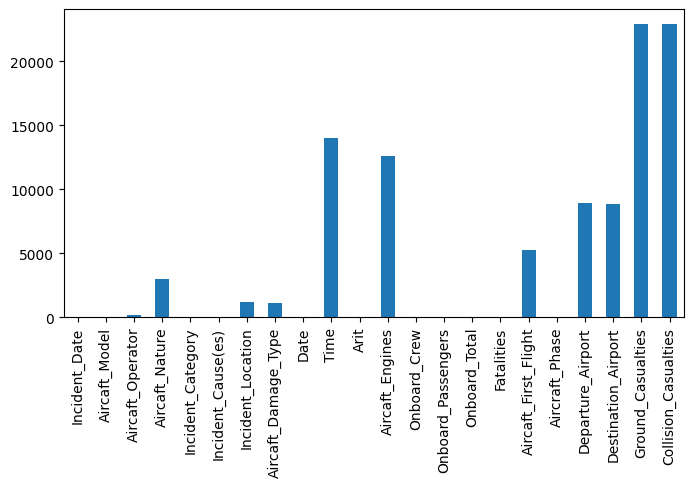

In [24]:
plt.figure(figsize=(8,4))
df.isnull().sum().plot(kind='bar')

<Axes: ylabel='Aircaft_Registration'>

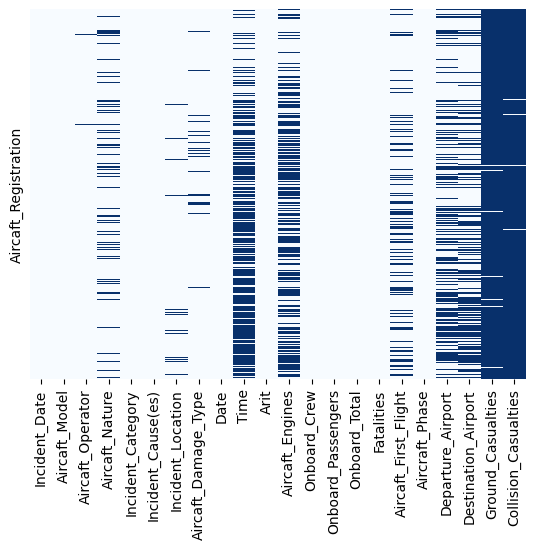

In [25]:
# No se detectan patrones claros en nulos

sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap = "Blues")

<Axes: >

<Figure size 600x400 with 0 Axes>

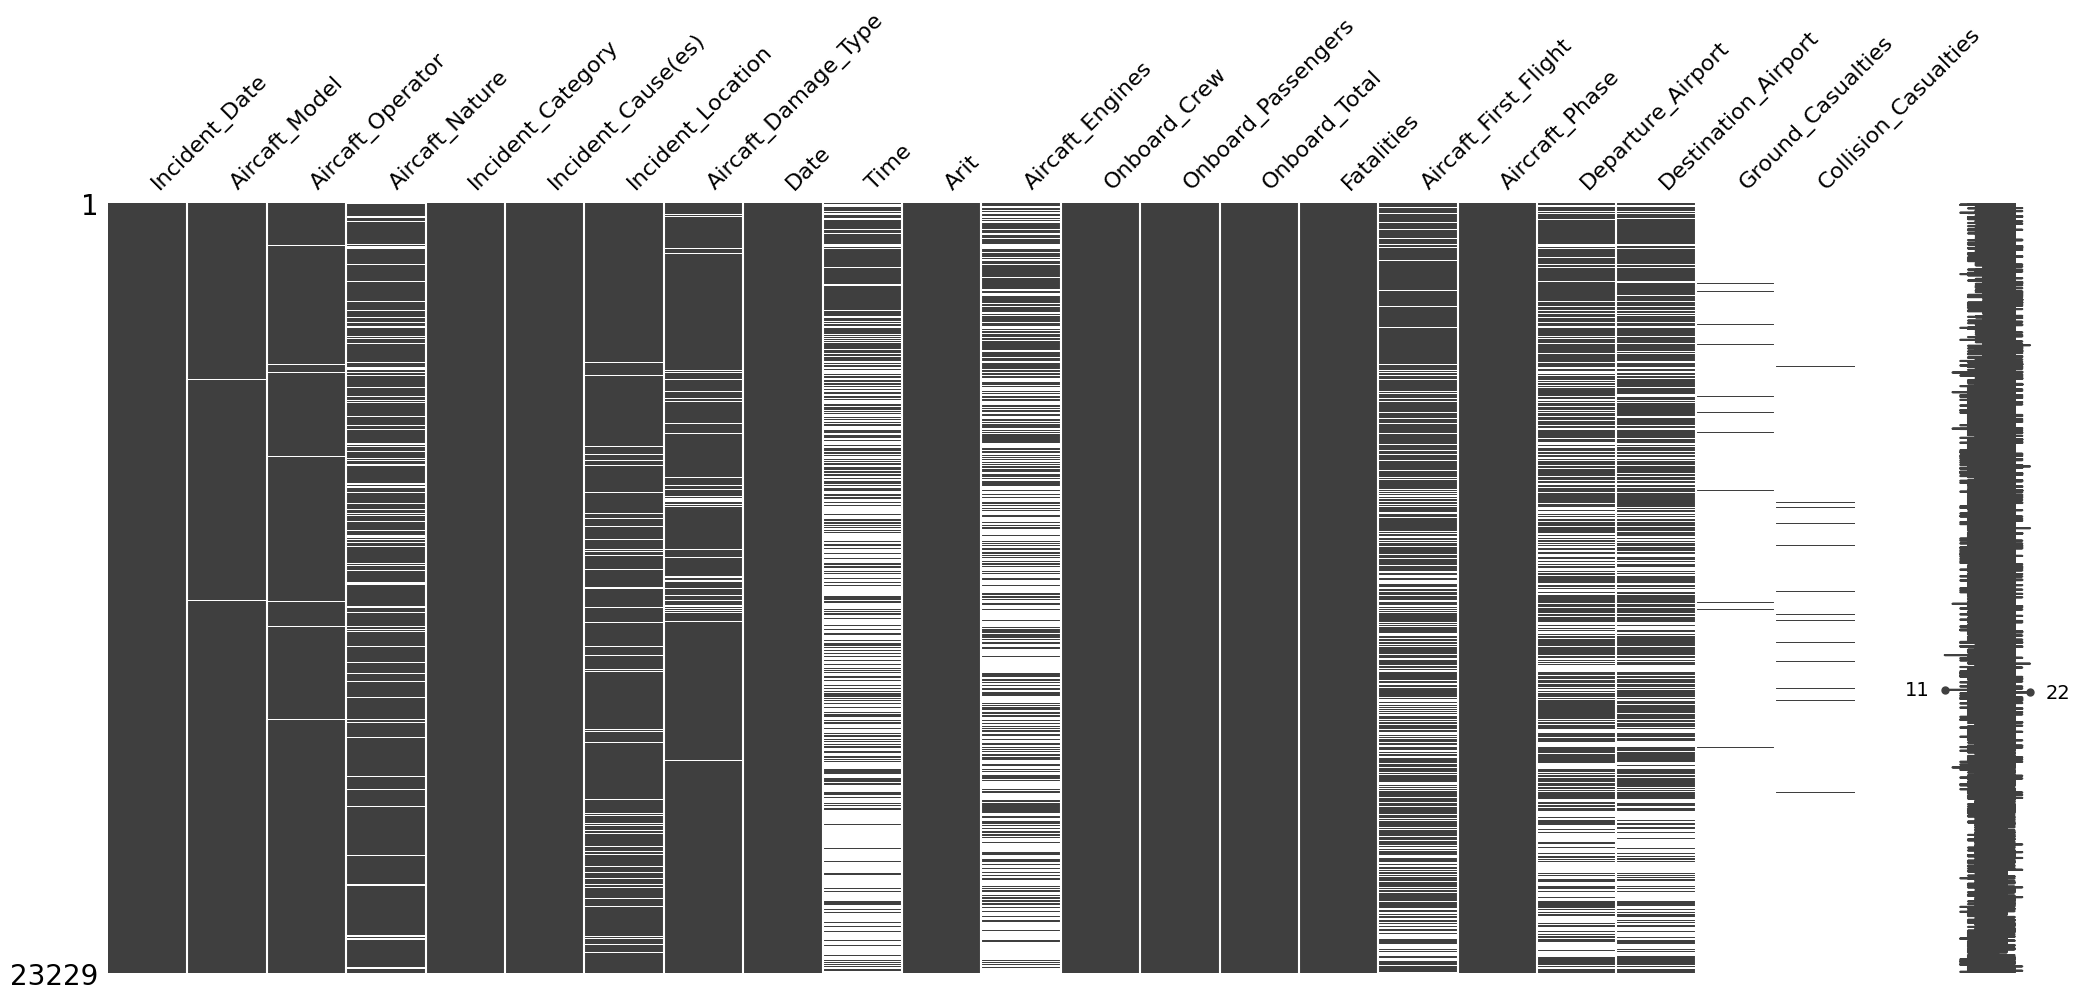

In [26]:
# Chequeamos en una matriz. Mismo resultado, sin patrones claros

plt.figure(figsize=(6, 4))
msno.matrix(df)

<Axes: >

<Figure size 600x400 with 0 Axes>

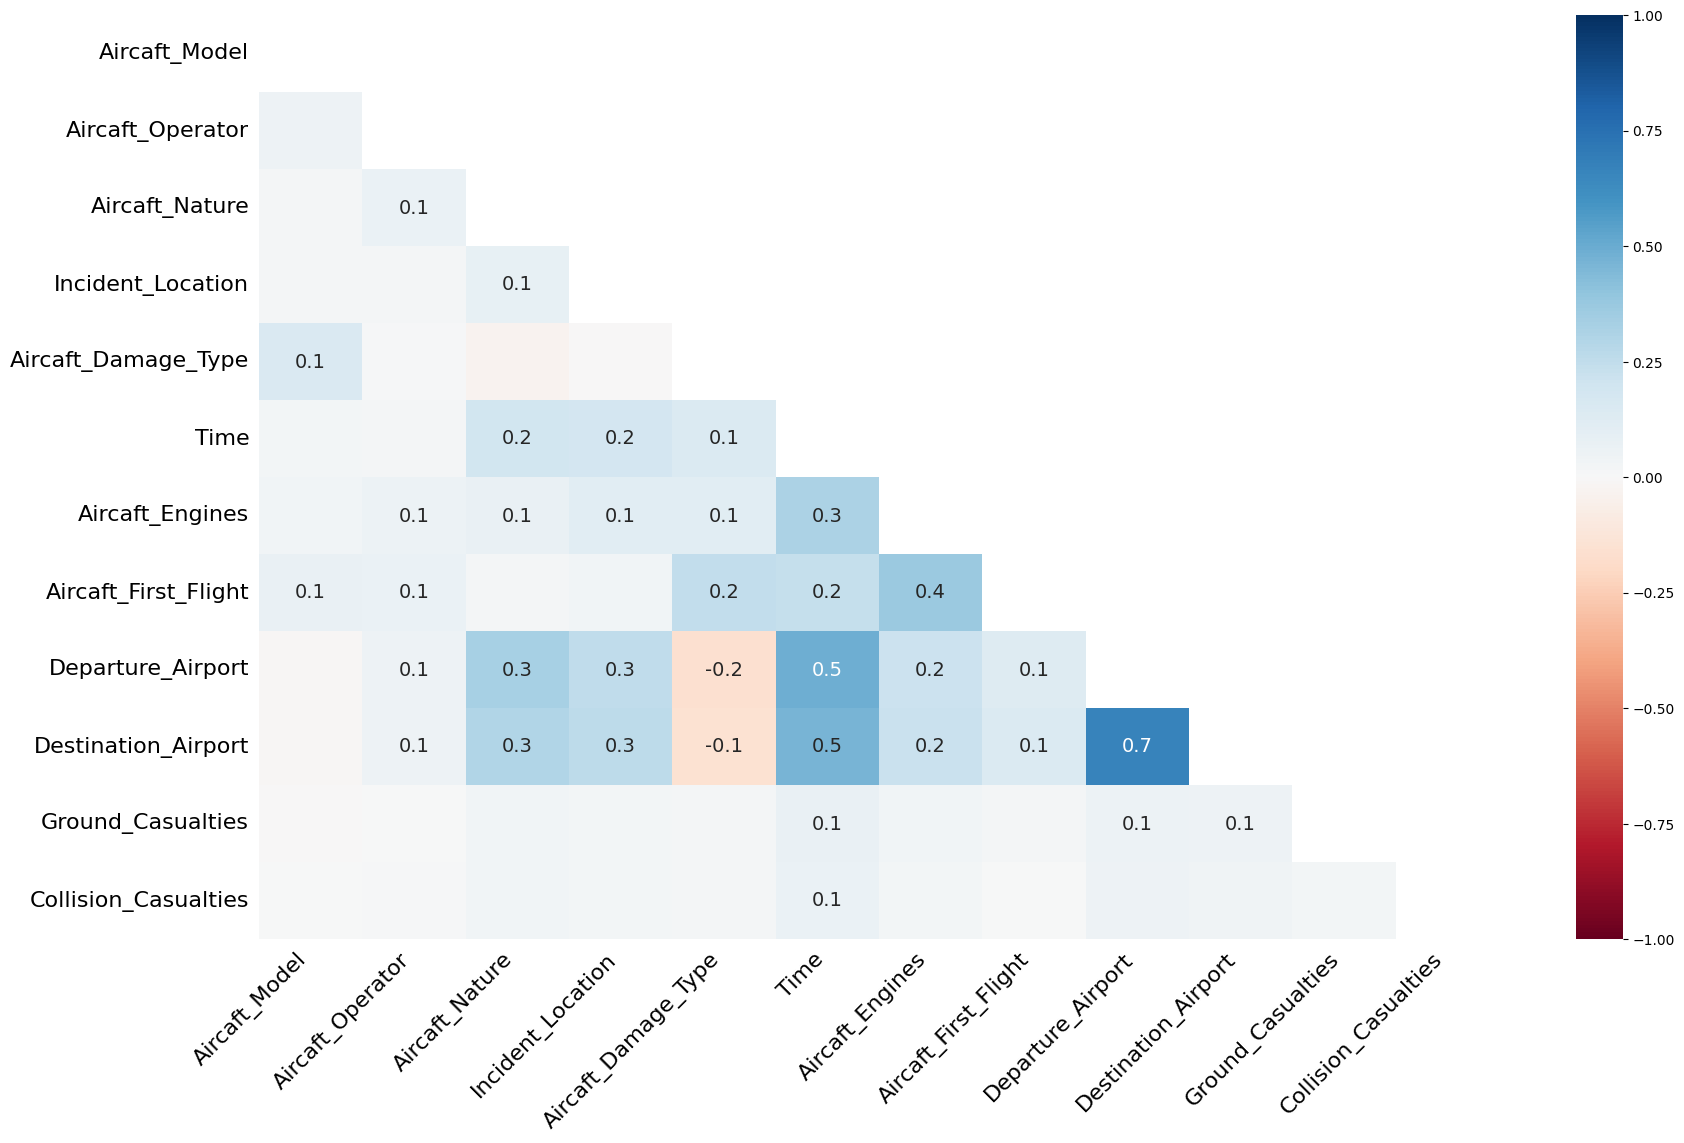

In [27]:
# Las columnas con mayor cantidad de nulos tienen baja correlación

plt.figure(figsize=(6, 4))
msno.heatmap(df)

<Axes: >

<Figure size 600x400 with 0 Axes>

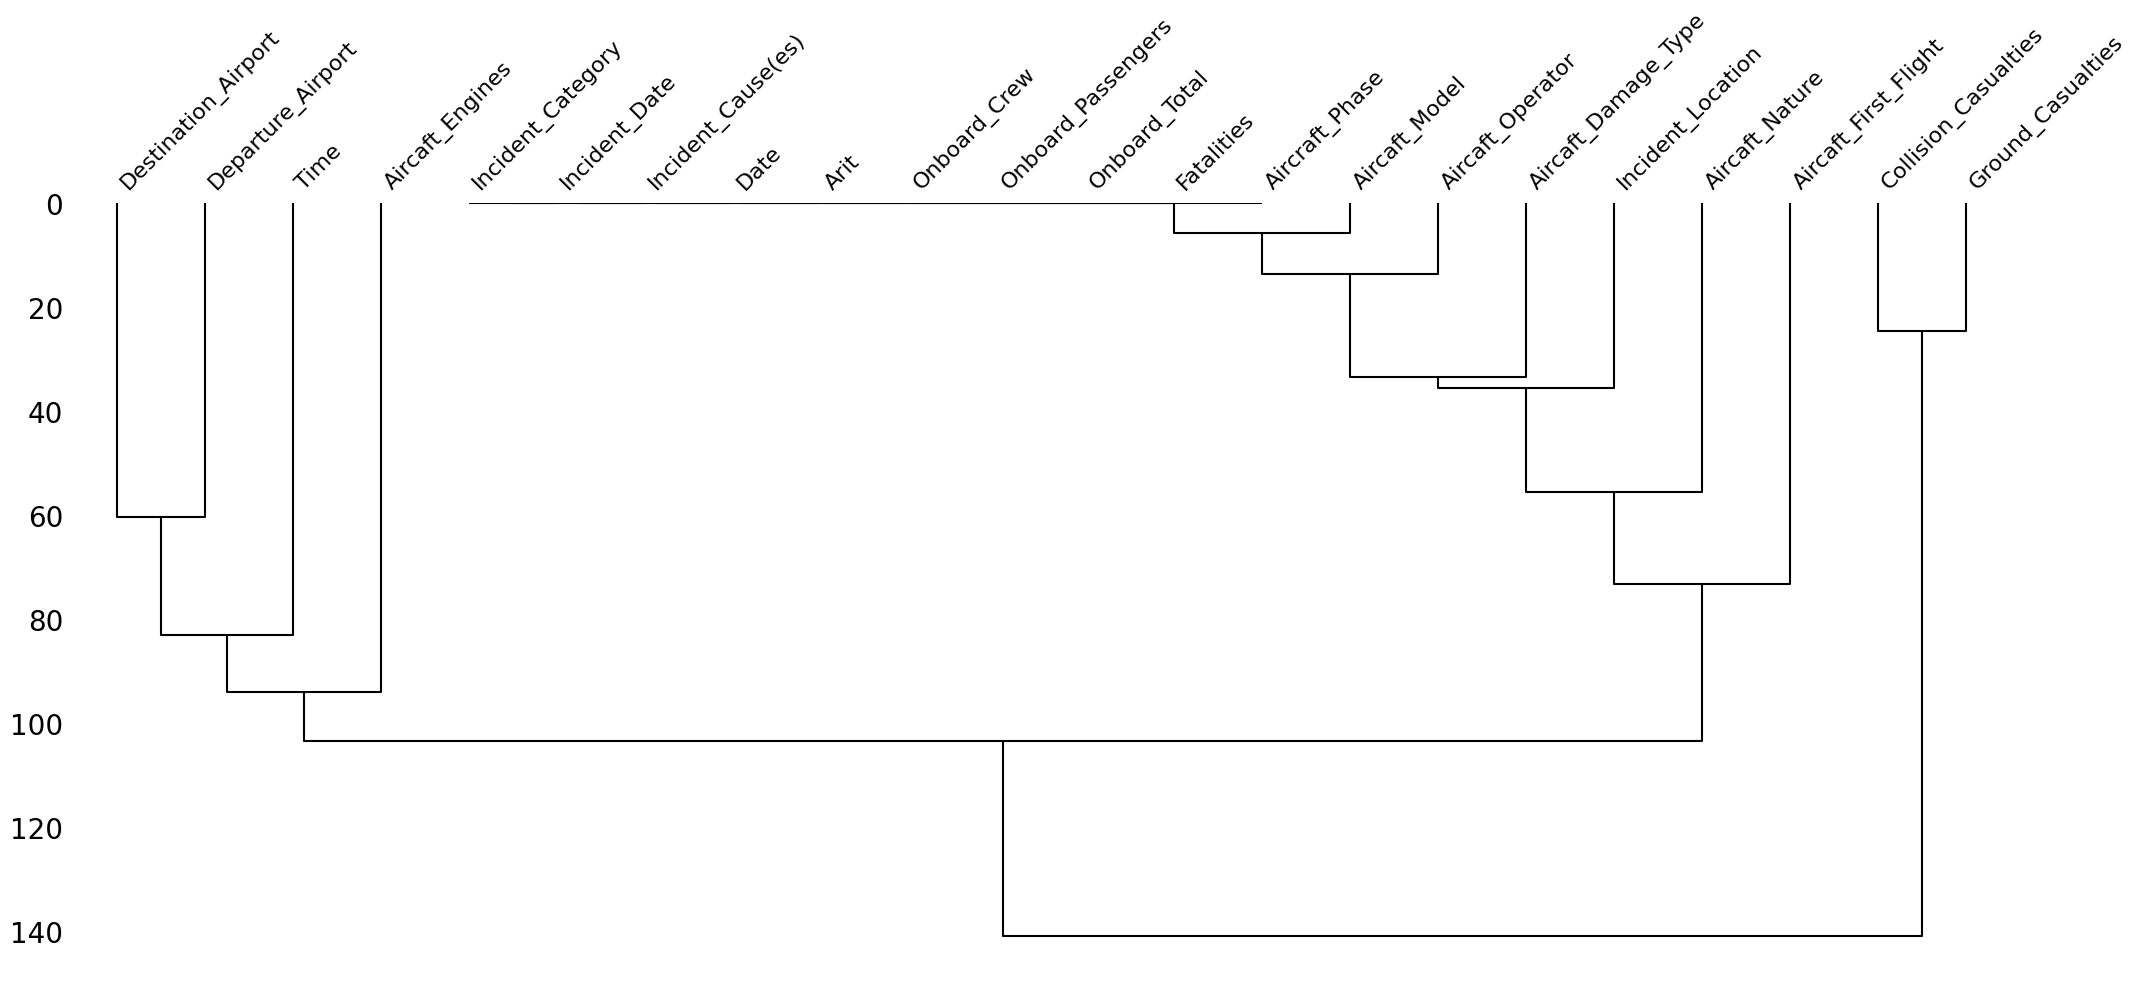

In [28]:
plt.figure(figsize=(6, 4))
msno.dendrogram(df)

In [29]:
# Utilizamos la función 'resumen_nulos' previamente creada

resumen_nulos(df)

Cantidad de Nulos  Porcentaje de Nulos
Collision_Casualties              22942            98.764475
Ground_Casualties                 22882            98.506178
Time                              14041            60.445994
Aircaft_Engines                   12624            54.345861
Departure_Airport                  8953            38.542339
Destination_Airport                8851            38.103233
Aircaft_First_Flight               5281            22.734513
Aircaft_Nature                     2978            12.820182
Incident_Location                  1182             5.088467
Aircaft_Damage_Type                1107             4.765595
Aircaft_Operator                    183             0.787808
Aircaft_Model                        34             0.146369

### Manipulación de datos

Comenzamos rellenando los nulos de las variables categóricas con la función 'relleno_nan_sim', la cual toma como referencia los valores existentes en una segunda variable para el relleno, considerando similitudes que pueden variar según el threshold asignado.

In [30]:
relleno_nan_sim(df, 'Aircaft_Model', 'Aircaft_Nature', threshold=60)

'Se reemplazaron 25 valores nulos en Aircaft_Model. (73.53% de reemplazo)'

In [31]:
relleno_nan_sim(df, 'Aircaft_Nature', 'Aircaft_Model', threshold=60)

'Se reemplazaron 2968 valores nulos en Aircaft_Nature. (99.66% de reemplazo)'

In [32]:
relleno_nan_sim(df, 'Aircaft_Engines', 'Aircaft_Model', threshold=60)

'Se reemplazaron 12345 valores nulos en Aircaft_Engines. (97.79% de reemplazo)'

In [33]:
relleno_nan_sim(df, 'Aircaft_Operator', 'Aircaft_Model', threshold=60)

'Se reemplazaron 180 valores nulos en Aircaft_Operator. (98.36% de reemplazo)'

In [34]:
relleno_nan_sim(df, 'Aircaft_Damage_Type', 'Incident_Category', threshold=60)

'Se reemplazaron 1107 valores nulos en Aircaft_Damage_Type. (100.00% de reemplazo)'

In [35]:
# Logramos reemplazar 16.625 de 16.926 nulos en 5 variables (98,22%)

resumen_nulos(df)

Cantidad de Nulos  Porcentaje de Nulos
Collision_Casualties              22942            98.764475
Ground_Casualties                 22882            98.506178
Time                              14041            60.445994
Departure_Airport                  8953            38.542339
Destination_Airport                8851            38.103233
Aircaft_First_Flight               5281            22.734513
Incident_Location                  1182             5.088467
Aircaft_Engines                     279             1.201085
Aircaft_Nature                       10             0.043050
Aircaft_Model                         9             0.038745
Aircaft_Operator                      3             0.012915

Ahora trabajaremos sobre las variables que tienen fecha de incidente.\
Modificaremos la variable 'Incident_Date' para transformarla a formato datetime, pero previo a ello, analizamos los datos.

In [36]:
print(df['Incident_Date'].head(10))
print('---------------------')
print(df['Incident_Date'].tail(10))

Aircaft_Registration
ZS-NRJ      03-JAN-2022
HR-AYY      04-JAN-2022
EP-CAP      05-JAN-2022
RA-64032    08-JAN-2022
NaN         12-JAN-2022
N760JB      22-JAN-2022
C-GEAS      31-JAN-2022
5H-TAZ      05-FEB-2022
SP-402      08-FEB-2022
RA-33599    11-FEB-2022
Name: Incident_Date, dtype: object
---------------------
Aircaft_Registration
O-BLAN    26-AUG-1921
O-BRUN    27-SEP-1921
O-BLEU    27-SEP-1921
G-EATM    30-DEC-1921
G-EANV    23-FEB-1920
G-EAMC    25-FEB-1920
G-EAKE    30-JUN-1920
G-EAMA    14-DEC-1920
NaN       02-AUG-1919
N123      11-AUG-1919
Name: Incident_Date, dtype: object


Encontramos que hay algunos registros que tienen caracteres erróneos, específicamente "??" y "???". Corroboramos que en las otras 2 variables de fechas figuren igual, ya que caso contrario nos sería útil poder reemplazar sichos caracteres por información real existente en otras variables.

In [37]:
filtro_fecha = df[df['Incident_Date'].str.contains('\?')]
filtro_fecha[['Incident_Date', 'Date', 'Arit']].head(10)

Incident_Date         Date         Arit
Aircaft_Registration                                        
NaN                    ??-JAN-2021  xx JAN 2021  ??-JAN-2021
N888JL                 ??-OCT-2016  xx OCT 2016  ??-OCT-2016
N628BS                 ??-???-2016  xx xxx 2016  ??-???-2016
7O-ADO                 ??-MAR-2015  xx MAR 2015  ??-MAR-2015
N20FM                  ??-OCT-2015  xx OCT 2015  ??-OCT-2015
UR-33590               ??-AUG-2014  xx AUG 2014  ??-AUG-2014
UR-33587               ??-???-2014  xx xxx 2014  ??-???-2014
XA-JWM                 ??-???-2014  xx xxx 2014  ??-???-2014
T.10-02                ??-MAY-2013  xx MAY 2013  ??-MAY-2013
CU-T1552               ??-OCT-2013  xx OCT 2013  ??-OCT-2013

En éste caso, no tuvimos suerte ya que los caracteres '?' están presentes por igual en las 3 variables. Lo cual, tiene sentido si se trata de un dataframe bien relacionado entre variables.\
Antes de eliminar los registros corroboramos que la suma total no sea considerable.\
Posteriormemnte los omitiremos a fin de filtrar las filas que cumplan el formato adecuado y luego se utiliza la función pd.to_datetime para convertir la variable "Incident_Date" en formato fecha.

In [38]:
cant_ff = (df['Incident_Date'].str.contains('\?')).sum()

print(f"La suma de registros con valores '?' en 'Incident_Date' es:", cant_ff)

La suma de registros con valores '?' en 'Incident_Date' es: 482


In [39]:
# Eliminamos las filas que contienen los caracteres '?'

df = df[df['Incident_Date'].str.match(r'\d{2}-[A-Z]{3}-\d{4}', na=False)]

A continuación cambiamos el formato de la variable 'Incident-Date' a datetime y ejecutamos las visualizaciones para confirmar el formato asignado.

In [40]:
df['Incident_Date'] = pd.to_datetime(df['Incident_Date'], format='%d-%b-%Y')
df['Incident_Date'].head(10)

<ipython-input-40-f6f1d17aeb10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Incident_Date'] = pd.to_datetime(df['Incident_Date'], format='%d-%b-%Y')


Aircaft_Registration
ZS-NRJ     2022-01-03
HR-AYY     2022-01-04
EP-CAP     2022-01-05
RA-64032   2022-01-08
NaN        2022-01-12
N760JB     2022-01-22
C-GEAS     2022-01-31
5H-TAZ     2022-02-05
SP-402     2022-02-08
RA-33599   2022-02-11
Name: Incident_Date, dtype: datetime64[ns]

## **[FEATURE ENGINEERING](#scrollTo=FNLamiM5YI3E)**

A continuación continuaremos trabajaremos sobre los valores nulos, la limpieza y estructuración del dataset, pero además crearemos algunas variables nuevas que nos permitirán mejores visualizaciones.

In [41]:
# Volvemos a chequear los nulos

resumen_nulos(df)

Cantidad de Nulos  Porcentaje de Nulos
Collision_Casualties              22458            98.738184
Ground_Casualties                 22399            98.478787
Time                              13557            59.604309
Departure_Airport                  8499            37.366454
Destination_Airport                8419            37.014729
Aircaft_First_Flight               5120            22.510442
Incident_Location                   992             4.361398
Aircaft_Engines                     273             1.200264
Aircaft_Nature                       10             0.043966
Aircaft_Model                         9             0.039569
Aircaft_Operator                      3             0.013190

Hacemos una resumida visualización de los datos reales que contienen las 3 variables con mayor porcentaje de nulos.

In [42]:
df[['Time', 'Collision_Casualties', 'Ground_Casualties']]

Time Collision_Casualties Ground_Casualties
Aircaft_Registration                                                 
ZS-NRJ                   08:10                  NaN               NaN
HR-AYY                ca 12:00                  NaN               NaN
EP-CAP                   17:07                  NaN               NaN
RA-64032                 04:40                  NaN               NaN
NaN                   c. 02:00                  NaN               NaN
...                        ...                  ...               ...
G-EAMC                     NaN                  NaN               NaN
G-EAKE                     NaN                  NaN               NaN
G-EAMA                ca 12:15                  NaN               NaN
NaN                        NaN                  NaN               NaN
N123                       NaN                  NaN               NaN

[22745 rows x 3 columns]

In [43]:
filtered_nonull = df.loc[~df[['Time', 'Collision_Casualties', 'Ground_Casualties']].isnull().any(axis=1),
                            ['Time', 'Collision_Casualties', 'Ground_Casualties']]

filtered_nonull

Time Collision_Casualties Ground_Casualties
Aircaft_Registration                                                  
SE-DMA                    08:10        Fatalities: 4     Fatalities: 4
XA-JED                    11:52        Fatalities: 3    Fatalities: 15
N784B                     17:22        Fatalities: 3     Fatalities: 1
N533PS                    09:01        Fatalities: 2     Fatalities: 7
OD-ADE                13:13 UTC        Fatalities: 3    Fatalities: 87
N8013U                    10:33       Fatalities: 44     Fatalities: 6
53-3277                   19:13        Fatalities: 6     Fatalities: 1
CCCP-L2071                20:02        Fatalities: 4     Fatalities: 6
CF-TFW                10:03 MST        Fatalities: 1     Fatalities: 1

Podemos prescindir de la variable Time ya que, más allá de la cantidad de nulos, presenta un formato a corregir en gran variedad de caracteres no deseados y además si bien puede ser un factor relevante en cuanto a accidentes aéreos, al ser un dataset que abarca casos mundiales, el horario es relativo a la zona, por lo cual requiere un trabajo mucho más complejo para obtener insihgts sólidos.
En cuanto a las variables que contienen más del 98% de nulos, se debe a lo que precisamente especifica el nombre de cada una:

- **Collision_Casualties** (víctimas por colisión, sin abordaje)
- **Ground_Casualties** (víctimas terrestres, sin abordaje)

Podemos prescindir de ambas variables ya que, en cuanto a los cálculos que podamos obtener de fatalidades es de mayor relevancia considerar las personas a bordo que las víctimas casuales. No obstante, primero vamos a cruzar algunos datos con las variables 'Fatalities', 'Onboard_Total', 'Ground_Casualties' y 'Collision_Casualties' para corroborar si hay dependencia de algunos valores en relación a las variables que queremos borrar.


In [44]:
top_valores = df['Fatalities'].nlargest(10).index

top_onboard_total = df.loc[top_valores, ['Fatalities', 'Onboard_Total',
                                         'Ground_Casualties', 'Collision_Casualties']]

top_onboard_total

Fatalities                     Onboard_Total  \
Aircaft_Registration                                                 
N334AA                      1692    Fatalities: 92 / Occupants: 92   
N612UA                       965    Fatalities: 65 / Occupants: 65   
JA8119                       520  Fatalities: 520 / Occupants: 524   
JA8119                         0    Fatalities: 0 / Occupants: 394   
TC-JAV                       346  Fatalities: 346 / Occupants: 346   
N736PA                       335  Fatalities: 335 / Occupants: 396   
N736PA                         0    Fatalities: 0 / Occupants: 379   
VT-EFO                       329  Fatalities: 329 / Occupants: 329   
VT-EFO                         0    Fatalities: 0 / Occupants: 284   
HZ-AIH                       312  Fatalities: 312 / Occupants: 312   
HZ-AHK                       301  Fatalities: 301 / Occupants: 301   
9M-MRD                       298  Fatalities: 298 / Occupants: 298   
EP-IBU                       290  Fatalities: 290 / Occupants: 290   

                     Ground_Casualties Collision_Casualties  
Aircaft_Registration                                         
N334AA                Fatalities: 1600                  NaN  
N612UA                 Fatalities: 900                  NaN  
JA8119                             NaN                  NaN  
JA8119                             NaN                  NaN  
TC-JAV                             NaN                  NaN  
N736PA                             NaN      Fatalities: 248  
N736PA                             NaN                  NaN  
VT-EFO                             NaN                  NaN  
VT-EFO                             NaN                  NaN  
HZ-AIH                             NaN       Fatalities: 37  
HZ-AHK                             NaN                  NaN  
9M-MRD                             NaN                  NaN  
EP-IBU                             NaN                  NaN

Hicimos un top de valores más altos de la variable 'Fatalities' para comparar con el resto y efectivamente notamos que suma también las víctimas de ambas variables 'Casualties'. Trabajaremos en ello, comenzaremos convirtiendo las variables a int aplicando un código que nos permita dejar sólo los valores númericos.

In [45]:
df['Ground_Casualties'] = df['Ground_Casualties'].fillna('Fatalities: 0').str.replace('Fatalities: ', '').astype(int)
df['Collision_Casualties'] = df['Collision_Casualties'].fillna('Fatalities: 0').str.replace('Fatalities: ', '').astype(int)

df[['Ground_Casualties', 'Collision_Casualties']].head(10)

Ground_Casualties  Collision_Casualties
Aircaft_Registration                                         
ZS-NRJ                                0                     0
HR-AYY                                0                     0
EP-CAP                                0                     0
RA-64032                              0                     0
NaN                                   0                     0
N760JB                                0                     0
C-GEAS                                0                     0
5H-TAZ                                0                     0
SP-402                                0                     0
RA-33599                              0                     0

Dado que la vista del df de ambas variables arroja todos valores 0, hacemos otras vistas de valores máximos de cada variables para cersiorarnos que hayan otros valores reales y no haya errores.

In [46]:
top_10_ground = df['Ground_Casualties'].sort_values(ascending=False).head(10)
print(top_10_ground)
print('------------------')
top_10_collision = df['Collision_Casualties'].sort_values(ascending=False).head(10)
print(top_10_collision)

Aircaft_Registration
N334AA      1600
N612UA       900
RA-26222     237
N644AA       125
N228SW       107
N730JP        88
OD-ADE        87
YV-C-AVD      71
PK-RIM        49
HC-BKN        49
Name: Ground_Casualties, dtype: int64
------------------
Aircaft_Registration
PH-BUF        335
UN-76435      312
N736PA        248
N600XL        154
G-AWZT        113
D-IEVX        110
CCCP-52018     96
CCCP-65735     94
CCCP-65816     84
N6907C         84
Name: Collision_Casualties, dtype: int64


Modificamos los valores totales de la variable 'Onboard_Total' ya que tiene un formato repetitivo respecto a las 2 variables anteriores y la posterior.
Nos será de mayor utilidad si sólo mostrara un valor numérico de total de pasajeros y tripulación para luego hacer cálculos precisos con respecto a la variable 'Fatalities', que también es tipo int64.

In [47]:
# Utilizamos la función 'procesar_valor' previamente creada

df['Onboard_Total'] = df['Onboard_Total'].apply(procesar_valor)

In [48]:
df['Onboard_Total'].head(10)

Aircaft_Registration
ZS-NRJ        7
HR-AYY       19
EP-CAP      116
RA-64032      8
NaN           0
N760JB        0
C-GEAS        3
5H-TAZ        0
SP-402       12
RA-33599      2
Name: Onboard_Total, dtype: int64

Las variables 'Onboard_Crew' y 'Onboard_Passengers' también presentan formato object los cuales tienen datos específicos de personas a bordo y personas fallecidas en la misma instancia.

In [49]:
df[['Onboard_Crew', 'Onboard_Passengers']].head(10)

Onboard_Crew  \
Aircaft_Registration                                 
ZS-NRJ                Fatalities: 0 / Occupants: 3   
HR-AYY                  Fatalities: 0 / Occupants:   
EP-CAP                  Fatalities: 0 / Occupants:   
RA-64032              Fatalities: 0 / Occupants: 8   
NaN                   Fatalities: 0 / Occupants: 0   
N760JB                  Fatalities: 0 / Occupants:   
C-GEAS                  Fatalities: 0 / Occupants:   
5H-TAZ                  Fatalities: 0 / Occupants:   
SP-402                Fatalities: 0 / Occupants: 5   
RA-33599              Fatalities: 2 / Occupants: 2   

                                Onboard_Passengers  
Aircaft_Registration                                
ZS-NRJ                Fatalities: 0 / Occupants: 4  
HR-AYY                  Fatalities: 0 / Occupants:  
EP-CAP                  Fatalities: 0 / Occupants:  
RA-64032              Fatalities: 0 / Occupants: 0  
NaN                   Fatalities: 0 / Occupants: 0  
N760JB                  Fatalities: 0 / Occupants:  
C-GEAS                  Fatalities: 0 / Occupants:  
5H-TAZ                  Fatalities: 0 / Occupants:  
SP-402                Fatalities: 0 / Occupants: 7  
RA-33599              Fatalities: 0 / Occupants: 0

Se aplica un código que convierta éstos datos, al igual que los anteriores, para utilizar las variables en formato int. Para ello, se deja sólo el número de personas a bordo en cada variable extrayendo el número final de cada registro y en caso de no tener número, se asigna 0.

Además se crean 2 variables nuevas llamadas 'Crew_Fatalities' y 'Pass_Fatalities' las cuales utilizan otro proceso de extracción de número, pero en éste caso el que se asigna luego de 'Fatalities: ' y en caso de no tener número, se asigna 0.

In [50]:
# Utilizaremos la función 'extraer_fatalidades' previamente creada

df['Crew_Fatalities'] = df['Onboard_Crew'].apply(lambda x: extraer_fatalidades(x.split(' / ')[0]))
df['Pass_Fatalities'] = df['Onboard_Passengers'].apply(lambda x: extraer_fatalidades(x.split(' / ')[0]))
df['Onboard_Crew'] = df['Onboard_Crew'].apply(lambda x: int(re.findall(r'\d+', x.split(' / ')[1])[0]) if re.findall(r'\d+', x.split(' / ')[1]) else 0)
df['Onboard_Passengers'] = df['Onboard_Passengers'].apply(lambda x: int(re.findall(r'\d+', x.split(' / ')[1])[0]) if re.findall(r'\d+', x.split(' / ')[1]) else 0)

df['Onboard_Crew'] = df['Onboard_Crew'].astype(int)
df['Onboard_Passengers'] = df['Onboard_Passengers'].astype(int)
df['Crew_Fatalities'] = df['Crew_Fatalities'].astype(int)
df['Pass_Fatalities'] = df['Pass_Fatalities'].astype(int)

df[['Onboard_Crew', 'Crew_Fatalities', 'Onboard_Passengers', 'Pass_Fatalities']].head(10)

Onboard_Crew  Crew_Fatalities  Onboard_Passengers  \
Aircaft_Registration                                                      
ZS-NRJ                           3                0                   4   
HR-AYY                           0                0                   0   
EP-CAP                           0                0                   0   
RA-64032                         8                0                   0   
NaN                              0                0                   0   
N760JB                           0                0                   0   
C-GEAS                           0                0                   0   
5H-TAZ                           0                0                   0   
SP-402                           5                0                   7   
RA-33599                         2                2                   0   

                      Pass_Fatalities  
Aircaft_Registration                   
ZS-NRJ                              0  
HR-AYY                              0  
EP-CAP                              0  
RA-64032                            0  
NaN                                 0  
N760JB                              0  
C-GEAS                              0  
5H-TAZ                              0  
SP-402                              0  
RA-33599                            0

Corroboramos los valores máximos para que no hayan incongruencias.

In [51]:
print(df['Onboard_Crew'].sort_values(ascending=False).head(5))
print('-----------')
print(df['Crew_Fatalities'].sort_values(ascending=False).head(5))
print('-----------')
print(df['Onboard_Passengers'].sort_values(ascending=False).head(5))
print('-----------')
print(df['Pass_Fatalities'].sort_values(ascending=False).head(5))

Aircaft_Registration
83-0008    32
135749     31
VH-OQA     29
141303     29
68-0218    29
Name: Onboard_Crew, dtype: int64
-----------
Aircaft_Registration
135749      31
CU-T1201    25
61-0331     24
HZ-AIH      23
VT-EBD      23
Name: Crew_Fatalities, dtype: int64
-----------
Aircaft_Registration
JA8119    509
JA8966    503
F-HPJE    497
N605FF    451
VH-OQA    440
Name: Onboard_Passengers, dtype: int64
-----------
Aircaft_Registration
JA8119    505
TC-JAV    335
N736PA    326
VT-EFO    307
HZ-AIH    289
Name: Pass_Fatalities, dtype: int64


Por último, a la variable 'Fatalities' le omitiremos el valor de las variables 'Ground_Casualties' y 'Collision_Casualties', sólo sumaremos los fallecidos de las 2 nuevas variables creadas 'Crew_Fatalities' y 'Pass_Fatalities' para que arroje como resultado únicamente las víctimas que estuvieron a bordo de la aeronave.

In [52]:
df['Fatalities'] = (df['Crew_Fatalities'] + df['Pass_Fatalities'])
df['Fatalities'].sort_values(ascending=False).head(10)

Aircaft_Registration
JA8119     520
TC-JAV     346
N736PA     335
VT-EFO     329
HZ-AIH     312
HZ-AHK     301
9M-MRD     298
EP-IBU     290
15-2280    275
N110AA     271
Name: Fatalities, dtype: int64

Una vez modificado y agregado las variables según la utilidad deseada, revisamos los valores antes de finalmente decidir borrar las variables com mayor porcentaje de valores nulos.

In [53]:
df.Collision_Casualties.value_counts().head(10)

0    22458
1       60
2       55
4       29
5       20
3       20
7       18
6       14
9        5
8        5
Name: Collision_Casualties, dtype: int64

In [54]:
df.Ground_Casualties.value_counts().head(10)

0     22399
1       132
2        57
3        35
4        21
6        16
7        13
5        11
8         7
10        5
Name: Ground_Casualties, dtype: int64

In [55]:
df.Time.value_counts().head(10)

14:30       46
10:30       40
16:30       37
17:30       35
18:30       35
11:30       35
08:30       35
12:30       34
ca 10:00    34
15:30       34
Name: Time, dtype: int64

In [56]:
df.Aircaft_Engines.value_counts().head(10)

2 Pratt Whitney R-1830-92         3391
2 Ivchenko AI-24VT                1119
2 Pratt Whitney R-1830-90C         779
2 Pratt Whitney R-2800-51          658
3 BMW 132A3                        586
2 Pratt Whitney Canada PT6A-27     470
2 Pratt Whitney R-1830-90          467
2 Wright R-2600-35                 444
2 Pratt Whitney R-2800-75          400
4 Allison 501-D22A                 377
Name: Aircaft_Engines, dtype: int64

---

DECISIÓN FINAL, BORRAR LAS VARIABLES.\
Ésto se ejecutará al final de la sección, quizás sumemos otras variables más.

---

En cuanto a la variable 'Aircaft_First_Flight', no es un dato que sea relevante al momento de analizar y/o predecir, pero de la misma podemos hacer un cálculo que nos permita calcular la edad de la aeronave y ése si puede ser un dato que sea de gran aporte al proyecto.

Se identifican diversidad de formatos de valores, donde a veces posee solo 4 dígitos que indican un año, en otros casos poseen una fecha completa y también pueden tener una referencia de edad por meses y/o años de antigüedad entre parentesis.

In [57]:
df['Aircaft_First_Flight'].head(10)

Aircaft_Registration
ZS-NRJ      1995-05-19  (26 years 8 months)
HR-AYY                                 1985
EP-CAP      1992-09-18  (29 years 4 months)
RA-64032    2002-07-18  (19 years 6 months)
NaN                                     NaN
N760JB      2008-10-07  (13 years 4 months)
C-GEAS                                 1990
5H-TAZ                                 2006
SP-402                                  NaN
RA-33599                               1988
Name: Aircaft_First_Flight, dtype: object

Ingresaremos un código de cálculo que nos permita extraer sólo los primeros 4 dígitos que indiquen el año del primer vuelo y luego restar dicho valor el número de año existente en la variable 'Incident_Date' para devolver la edad de la aeronave al momento del suceso, en una variable nueva llamada 'Aircraft_Age'. Se agregará un condicional que devuelva valor 0 en caso de que la variable 'Aircaft_First_Flight' no posea valores o sea NaN, para que en ésos casos entonces no realice la resta, sino que devuelva valor 0 en la variable nueva (de ésta manear evitamos posibles errores en los cuales, por ejemplo, veamos aeronaves con edad 1962).

De la variable 'Incident_Date', previamente transformada a formato datetime, utilizaremos sus datos para crear una variable 'Year' que nos servirá para dicho cálculo, comenzamos por visualizar los datos.

A modo de organización, creamos 3 variables que especifican año, mes y día de la semana de la variable 'Incident_Date'; los meses y años serán con nombres para utilizar en gráficos y se agregan 2 variables más que duplican éstas 2 últimas, pero de forma numérica:
- Sobre la variable 'Year', extraemos sólo el año de la variable 'Incident_Date'.
- Sobre la variable 'Month_name', asignamos y mostramos la abreviación textual de cada uno.
- También se crea 'Month' que mantiene el valor numérico.
- Sobre la variable 'Day_name', asignamos el nombre y orden de los días de la semana.
- También se crea 'Day' que mantiene el valor numérico.

In [58]:
meses = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'}

df['Year'] = df['Incident_Date'].dt.year
df['Month'] = df['Incident_Date'].dt.month
df['Month_name'] = df['Incident_Date'].dt.month.map(meses)
df['Day'] = df['Incident_Date'].dt.day
df['Day_name'] = df['Incident_Date'].dt.day_name()

df['Day_name'] = pd.Categorical(df['Day_name'], categories=['Monday',
                                                            'Tuesday',
                                                            'Wednesday',
                                                            'Thursday',
                                                            'Friday',
                                                            'Saturday',
                                                            'Sunday'],
                                ordered=True)

df[['Year', 'Month', 'Month_name', 'Day', 'Day_name']].head(10)

Year  Month Month_name  Day   Day_name
Aircaft_Registration                                        
ZS-NRJ                2022      1        Jan    3     Monday
HR-AYY                2022      1        Jan    4    Tuesday
EP-CAP                2022      1        Jan    5  Wednesday
RA-64032              2022      1        Jan    8   Saturday
NaN                   2022      1        Jan   12  Wednesday
N760JB                2022      1        Jan   22   Saturday
C-GEAS                2022      1        Jan   31     Monday
5H-TAZ                2022      2        Feb    5   Saturday
SP-402                2022      2        Feb    8    Tuesday
RA-33599              2022      2        Feb   11     Friday

Visualización de valores únicos de los años, meses y días donde se registraron los casos.

In [59]:
print(df['Year'].unique())
print("--------------------")
print(df['Month_name'].unique())
print("--------------------")
print(df['Day_name'].unique())

[2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009
 2008 2007 2006 2005 2004 2003 2002 2001 2000 1999 1998 1997 1996 1995
 1994 1993 1992 1991 1990 1989 1988 1987 1986 1985 1984 1983 1982 1981
 1980 1979 1978 1977 1976 1975 1974 1973 1972 1971 1970 1969 1968 1967
 1966 1965 1964 1963 1962 1961 1960 1959 1958 1957 1956 1955 1954 1953
 1952 1951 1950 1949 1948 1947 1946 1945 1944 1943 1942 1941 1940 1939
 1938 1937 1936 1935 1934 1933 1932 1931 1930 1929 1928 1927 1926 1925
 1924 1923 1922 1921 1920 1919]
--------------------
['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
--------------------
['Monday', 'Tuesday', 'Wednesday', 'Saturday', 'Friday', 'Sunday', 'Thursday']
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' <
                         'Sunday']


Ahora, corroboramos si los datos de las variables 'Date' y 'Arit' coinciden con los de 'Incident_Date'.\
De ser así, serían las 2 variables a eliminar por duplicidad de datos innecesarios.

In [60]:
df[['Incident_Date','Arit','Date']].head(10)

Incident_Date         Arit                       Date
Aircaft_Registration                                                      
ZS-NRJ                  2022-01-03  03-JAN-2022      Monday 3 January 2022
HR-AYY                  2022-01-04  04-JAN-2022     Tuesday 4 January 2022
EP-CAP                  2022-01-05  05-JAN-2022   Wednesday 5 January 2022
RA-64032                2022-01-08  08-JAN-2022    Saturday 8 January 2022
NaN                     2022-01-12  12-JAN-2022  Wednesday 12 January 2022
N760JB                  2022-01-22  22-JAN-2022   Saturday 22 January 2022
C-GEAS                  2022-01-31  31-JAN-2022     Monday 31 January 2022
5H-TAZ                  2022-02-05  05-FEB-2022   Saturday 5 February 2022
SP-402                  2022-02-08  08-FEB-2022    Tuesday 8 February 2022
RA-33599                2022-02-11  11-FEB-2022    Friday 11 February 2022

Efectivamente serán las 2 variables próximas a eliminar.\
Siguiendo con los features, vez creada la variable 'Year' podemos utilizarla para crear la variable previamente mencionada 'Aircraft_Age'.

In [61]:
def extraer_anio(row):
    # De la variable se toman los primeros 4 caracteres en formato str
    extract_year = str(row['Aircaft_First_Flight'])[:4]
    # Verifica si la lista contiene sólo números y que no hayan 0
    if extract_year.isdigit() and int(extract_year) != 0:
    # Si la verificación es correcta, devuelve un valor en int
        return row['Year'] - int(extract_year)
    # Si la verificación es falsa, devuelve 0
    else:
        return 0

df['Aircraft_Age'] = df.apply(extraer_anio, axis=1).astype(int)

df['Aircraft_Age'].value_counts().head(10)

0    6622
1    2152
2    1093
3     739
5     686
4     658
6     602
7     587
8     496
9     456
Name: Aircraft_Age, dtype: int64

Visualización de los valores máximos y mínimos en lista de la variable nueva.

In [62]:
print(df['Aircraft_Age'].nlargest(10))
print('-----------------')
print(df['Aircraft_Age'].nsmallest(10))


Aircaft_Registration
HB-HOT     79
HK-2820    77
C-GJKM     77
C-FKGL     76
C-FKAL     76
HK-2006    75
N467KS     75
N93012     75
N437GB     75
FAS116     75
Name: Aircraft_Age, dtype: int64
-----------------
Aircaft_Registration
ZS-SBE     -4
NaN         0
SP-402      0
NaN         0
AF-222      0
NaN         0
NaN         0
UP-A0351    0
02 white    0
NaN         0
Name: Aircraft_Age, dtype: int64


Notamos que por algún error de registro del dataset hay un valor negativo y además quedaron muchos valores en 0 dada la cantidad de nulos en la variable 'Aircaft_First_Flight' por lo cual procedemos a llenar ésos valores 0 y negativos, inicialmente con la función 'relleno_nan_sim' para poder utilizar las edades más precisas según las referencias de la variable 'Aircaft_Model'. Pero para ello, primero debemos convertir los valores <=0 en nan.\
Los valores restantes que no hayan podido ser convertidos, se reemplazarán con el valor promedio.

In [63]:
df['Aircraft_Age'] = df['Aircraft_Age'].mask(df['Aircraft_Age'] <= 0, pd.NA)

In [64]:
# Aplicamos la función de relleno

relleno_nan_sim(df, 'Aircraft_Age', 'Aircaft_Model', threshold=60)

'Se reemplazaron 6273 valores nulos en Aircraft_Age. (94.72% de reemplazo)'

In [65]:
# Reemplazamos por el promedio y nos aseguramos que mantenga formato int

mean_age = df['Aircraft_Age'].mean()

df['Aircraft_Age'] = df['Aircraft_Age'].fillna(mean_age)
df['Aircraft_Age'] = df['Aircraft_Age'].astype(int)

print(df['Aircraft_Age'].nlargest(10))
print('-----------------')
print(df['Aircraft_Age'].nsmallest(10))

Aircaft_Registration
HB-HOT     79
HK-2820    77
C-GJKM     77
C-FKGL     76
C-FKAL     76
HK-2006    75
N467KS     75
N93012     75
N437GB     75
FAS116     75
Name: Aircraft_Age, dtype: int64
-----------------
Aircaft_Registration
VT-MPQ      1
RF-88450    1
N1GG        1
ET-AYB      1
VP-BWC      1
ET-AVJ      1
G-CKWB      1
5H-AAM      1
HL7204      1
30513       1
Name: Aircraft_Age, dtype: int64


Por último, la variable 'Incident_Location' tiene formato object, con más de 13.000 variables categóricas que no serán de utilidad ya que son datos inexactos e incompletos y terminan siempre con puntos suspensivos.

In [66]:
print(df['Incident_Location'].head(10))
print('------------------')
print('Cantidad de valores únicos: ', df['Incident_Location'].nunique())

Aircaft_Registration
ZS-NRJ      near Venetia Mine...
HR-AYY           Roatán-Juan ...
EP-CAP           Isfahan-Shah...
RA-64032         Hangzhou-Xia...
NaN              Machakilha, ...
N760JB           Hayden-Yampa...
C-GEAS           Thunder Bay ...
5H-TAZ           New Fangak A...
SP-402             Agok Airstrip
RA-33599    near Koryaki, Yel...
Name: Incident_Location, dtype: object
------------------
Cantidad de valores únicos:  13878


Ésta variable también será eliminada junto con 'Aircaft_First_Flight' de la cual ya extrajimos lo necesario para la variable 'Aircraft_Age' y las variables con datos duplicados 'Arit' y 'Date'.\
Ésta función será aplicada al final del segmento.

---

Agregamos la variable 'Flight_Type' la cual define con una función condicional si el país de la variable 'Departure_Airport' coincide con el país de la variable 'Destination_Airport' entonces devolverá el valor 'Domestic', caso contrario el valor será 'International'.

In [67]:
# Breve visualización de los valores que más se repiten (moda)

print(df['Departure_Airport'].value_counts(ascending=False).head(5))
print('-------------------------------------------------------------')
print(df['Destination_Airport'].value_counts(ascending=False).head(5))

Miami International Airport, FL (MIA/KMIA) , United States of America                       106
Bogotá-Eldorado Airport (BOG/SKBO) , Colombia                                                64
New York-John F. Kennedy International Airport, NY (JFK/KJFK) , United States of America     63
Los Angeles International Airport, CA (LAX/KLAX) , United States of America                  53
Chicago-O'Hare International Airport, IL (ORD/KORD) , United States of America               49
Name: Departure_Airport, dtype: int64
-------------------------------------------------------------
Miami International Airport, FL (MIA/KMIA) , United States of America                       124
New York-John F. Kennedy International Airport, NY (JFK/KJFK) , United States of America     57
Bogotá-Eldorado Airport (BOG/SKBO) , Colombia                                                57
Kunming-Wujiaba Airfield (KMG/ZPPP) , China                                                  55
Los Angeles International Airport, C

In [68]:
# Utilizamos la función 'determinar_tipo_vuelo' previamente creada

df['Flight_Type'] = df.apply(determinar_tipo_vuelo, axis=1)

df['Flight_Type'].head(10)

Aircaft_Registration
ZS-NRJ           Domestic
HR-AYY           Domestic
EP-CAP           Domestic
RA-64032    International
NaN                  <NA>
N760JB      International
C-GEAS      International
5H-TAZ               <NA>
SP-402           Domestic
RA-33599             <NA>
Name: Flight_Type, dtype: object

In [69]:
# Complementamos con la función 'relleno_nan_sim'

relleno_nan_sim(df, 'Flight_Type', 'Aircaft_Model', threshold=60)

'Se reemplazaron 10218 valores nulos en Flight_Type. (99.65% de reemplazo)'

In [70]:
# Damos una segunda pasada, con otra variable de referencia

relleno_nan_sim(df, 'Flight_Type', 'Aircaft_Nature', threshold=60)

'Se reemplazaron 31 valores nulos en Flight_Type. (86.11% de reemplazo)'

In [71]:
# Contabilizamos valores únicos

df['Flight_Type'].value_counts()

Domestic         11526
International    11214
Name: Flight_Type, dtype: int64

La variable 'Incident_Category' tiene 10 variables categóricas, las cuales vamos a agrupar en 2 que generalicen y separen accidentes de hechos criminales, creando una nueva variable llamada 'Category':

VARIABLE 'ACCIDENTS'.

- **Accident | repairable-damage:** Accidente; daño reparable.
- **Accident | hull-loss:** Accidente; pérdida del casco.
- **Incident | repairable-damage:** Incidente; daño reparable.
- **Occurrence unknown | hull-loss:** Suceso desconocido; pérdida del casco.

VARIABLE 'CRIMINAL'.

- **Criminal occurrence (sabotage, shoot down) | hull-loss:** Hecho criminal (sabotaje, derribo); pérdida del casco.
- **Other occurrence (ground fire, sabotage) | hull-loss:** Otros sucesos (incendio terrestre, sabotaje); pérdida del casco.
- **Criminal occurrence (sabotage, shoot down) | repairable-damage:** Hecho criminal (sabotaje, derribo); daño reparable.
- **Hijacking | repairable-damage:** Secuestro | daño reparable.
- **Other occurrence (ground fire, sabotage) | repairable-damage:** Otros sucesos (incendio terrestre, sabotaje); daño reparable.
- **Hijacking | hull-loss:** Secuestro; pérdida del casco

In [72]:
df['Incident_Category'].value_counts()

Accident | hull-loss                                              16749
Accident | repairable-damage                                       2354
Criminal occurrence (sabotage, shoot down) | hull-loss             1094
Hijacking | repairable-damage                                      1049
other occurrence (ground fire, sabotage) | hull-loss                867
occurrence unknown | hull-loss                                      435
Criminal occurrence (sabotage, shoot down) | repairable-damage       80
other occurrence (ground fire, sabotage) | repairable-damage         63
Hijacking | hull-loss                                                42
Incident | repairable-damage                                         12
Name: Incident_Category, dtype: int64

In [73]:
# Utilizamos la función 'determinar_categoria' previamente creada

df['Category'] = df.apply(determinar_categoria, axis=1)

df['Category'].value_counts()

Accidents    19613
Criminal      3132
Name: Category, dtype: int64

También notamos que los valores están separados en 2 términos por una barra vertical (|). Ésto será un delimitador para crear una nueva variable llamada 'Damage_Repair', la cual tendrá sólo 2 categorías.


In [74]:
# Realizamos Split y nos quedamos con el 2do valor

df['Damage_Repair'] = df['Incident_Category'].str.split(' \| ', expand=True)[1]

df['Damage_Repair'].value_counts()

hull-loss            19187
repairable-damage     3558
Name: Damage_Repair, dtype: int64

Crearemos una variable llamada 'Country' la cual se asignan valores según una función que determina si corresponde el país que figura posterior a la coma de las variables 'Destination_Airport' o 'Departure_Airport', dependiendo de la fase de vuelo registrada en la variable 'Aircraft_Phase'.\
Primero, normalizamos la variable 'Aircraft_Phase'.

In [75]:
# Visualizamos valores únicos

df['Aircraft_Phase'].value_counts()

En route (ENR)             5739
Landing (LDG)              4512
Unknown (UNK)              4236
Approach (APR)             2633
Takeoff (TOF)              2064
Standing (STD)             1536
Initial climb (ICL)        1114
Taxi (TXI)                  462
Maneuvering (MNV)           378
Pushback / towing (PBT)      69
(CMB)                         1
()                            1
Name: Aircraft_Phase, dtype: int64

Encontramos un valor incompleto '()' el cual corroboraremos a que modelo de aeronve está asociado el registro con el fin de encontrar, de dicho modelo, la fase de vuelo que más se repite en los incidentes y reemplazar el valor.\
Por otro lado, asignaremos la fase '(CMB)' a 'Initial climb (ICL)' ya que en términos de aviación, son similares.

In [76]:
# Filtramos ambas variables por el valor '()' para encontrar el modelo

df[['Aircraft_Phase', 'Aircaft_Model']][df['Aircraft_Phase'] == '()']

Aircraft_Phase     Aircaft_Model
Aircaft_Registration                                 
WL-AGZG                          ()  Junkers Ju-52/3m

In [77]:
# Ahora utilizamos el modelo de aeronave para generar un filtro a la inversa

df[['Aircaft_Model', 'Aircraft_Phase']][df['Aircaft_Model'] == 'Junkers Ju-52/3m']

Aircaft_Model  Aircraft_Phase
Aircaft_Registration                                  
HB-HOS                Junkers Ju-52/3m      Taxi (TXI)
NaN                   Junkers Ju-52/3m   Unknown (UNK)
HB-HOS                Junkers Ju-52/3m  Approach (APR)
NaN                   Junkers Ju-52/3m   Takeoff (TOF)
VH-BUU                Junkers Ju-52/3m   Landing (LDG)
...                                ...             ...
NaN                   Junkers Ju-52/3m   Unknown (UNK)
D-ATAK                Junkers Ju-52/3m   Landing (LDG)
D-ASIH                Junkers Ju-52/3m  En route (ENR)
22-78                 Junkers Ju-52/3m   Unknown (UNK)
NaN                   Junkers Ju-52/3m  En route (ENR)

[336 rows x 2 columns]

In [78]:
phase_junker = df[['Aircaft_Model', 'Aircraft_Phase']][df['Aircaft_Model'] == 'Junkers Ju-52/3m']

# Calcula el conteo de cada valor en 'Aircraft_Phase' y encuentra el más frecuente
most_common_phase = phase_junker['Aircraft_Phase'].value_counts().idxmax()

print(f"El valor más común en 'Aircraft_Phase' para 'Junkers Ju-52/3m' es: {most_common_phase}")

El valor más común en 'Aircraft_Phase' para 'Junkers Ju-52/3m' es: En route (ENR)


In [79]:
# Realizamos los reemplazos y corroboramos los valores únicos

df['Aircraft_Phase'] = df['Aircraft_Phase'].replace({'()': 'En route (ENR)',
                                                     '(CMB)': 'Initial climb (ICL)'})

df['Aircraft_Phase'].value_counts()

En route (ENR)             5740
Landing (LDG)              4512
Unknown (UNK)              4236
Approach (APR)             2633
Takeoff (TOF)              2064
Standing (STD)             1536
Initial climb (ICL)        1115
Taxi (TXI)                  462
Maneuvering (MNV)           378
Pushback / towing (PBT)      69
Name: Aircraft_Phase, dtype: int64

Ahora si, procedemos a crear la variable 'Country'.

In [80]:
# Utilizamos la función 'determinar_pais' previamente creada

df['Country'] = df.apply(determinar_pais, axis=1)

df['Country'].value_counts().head(10)

United States of America    3387
Russia                       880
United Kingdom               629
Canada                       585
Brazil                       467
India                        414
Colombia                     374
France                       318
Indonesia                    298
Germany                      290
Name: Country, dtype: int64

In [81]:
# Corregimos los nulos en la variable

relleno_nan_sim(df, 'Country', 'Aircaft_Model', threshold=60)

'Se reemplazaron 7956 valores nulos en Country. (99.71% de reemplazo)'

In [82]:
df['Country'].value_counts()

United States of America    7184
Russia                      1889
United Kingdom              1366
Brazil                       842
Canada                       765
                            ... 
USS Ranger                     1
Kosovo                         1
USS Independence               1
Cook Islands                   1
Eswatini                       1
Name: Country, Length: 223, dtype: int64

También vamos a aplicar la función 'asignar_hemisferio' y 'asignar_estacion' para crear las variables 'Hemisphere' y 'Season', las cuales tendrá como objetivo simplificar la cantidad de valores existentes en la variable 'Country'

In [83]:
df['Hemisphere'] = df['Country'].apply(asignar_hemisferio)
df['Season'] = df.apply(asignar_estacion, axis=1)

df[['Hemisphere', 'Season']]

Hemisphere  Season
Aircaft_Registration                   
ZS-NRJ                    South  Summer
HR-AYY                    North  Winter
EP-CAP                    North  Winter
RA-64032                  North  Winter
NaN                       North  Winter
...                         ...     ...
G-EAMC                    North  Winter
G-EAKE                    North  Summer
G-EAMA                    North  Winter
NaN                       North  Summer
N123                      North  Summer

[22745 rows x 2 columns]

In [84]:
# Chequeamos los valores únicos

print(df['Hemisphere'].value_counts())
print(df['Season'].value_counts())

North    19867
South     2855
Name: Hemisphere, dtype: int64
Spring    5752
Summer    5727
Winter    5670
Autumn    5596
Name: Season, dtype: int64


Sobre la variable 'Aircaft_Nature' encontramos 23 categorías, las cuales se pueden simplificar o reducir, lo cual haremos creando otra variable.

In [85]:
print(f'Total de categorías:',df['Aircaft_Nature'].nunique())
print(df['Aircaft_Nature'].value_counts())

Total de categorías: 23
Military                             9114
Domestic Scheduled Passenger         4860
Cargo                                2237
International Scheduled Passenger    1561
Domestic Non Scheduled Passenger      871
Executive                             721
Ferry/positioning                     699
Training                              432
Int'l Non Scheduled Passenger         335
Passenger                             277
Illegal Flight                        261
Private                               246
Test                                  243
Agricultural                          178
Scheduled Passenger                   139
Survey/research                       109
Ambulance                             107
Fire fighting                          99
Parachuting                            85
Demonstration                          49
Non Scheduled Passenger                46
Official state flight                  42
Aerial Work (Calibration, Photo)       24
Name: Airc

In [86]:
# Utilizamos la función 'determinar_utilidad' previamente creada

df['Aircraft_Utility'] = df.apply(determinar_utilidad, axis=1)

df['Aircraft_Utility'].value_counts()

Military       9114
Passenger      9098
Aerial_Work    4128
Other           395
Name: Aircraft_Utility, dtype: int64

También creamos la **VARIABLE OBJEVITO**, la cual se llama 'Survival_Prob' y tiene un cálculo simple de probabilidad entre las personas total a bordo según la variable 'Onboard_Total' y las víctimas fatales según la variable 'Fatalities'.

In [87]:
df['Survival_Prob'] = (df['Onboard_Total'] - df['Fatalities']) / df['Onboard_Total']*100
df['Survival_Prob'] = df['Survival_Prob'].replace([np.nan, np.inf, -np.inf], 0).round().astype(int)

df['Survival_Prob'].unique()

array([100,   0,  67,  74,  75,  27,  50,  20,  33,  98,  25,   2,  89,
        12,   4,  99,  47,  91,  96,  56,  71,  46,  38,   5,  88,  28,
         1,  95,  29,  13,  83,  60,  80,  93,  14,  69,  70,  22,  57,
        64,   8,  17,  26,  84,  79,  92,   6,  44,  40,  90,  30,  23,
        77,   3,  10,  81,  11,  78,  43,  97,  86,  21,  85,  35,  94,
         7,  31,  62,  18,   9,  36,  87,  59,  15,  37,  72,  53,  54,
        82,  58,  42,  73,  39,  76,  65,  68,  63,  66,  41,  55,  48,
        24,  52,  61,  16,  49,  45,  51,  32,  19,  34])

Finalmente procedemos a elimiar las variables con mayor porcentaje de nulos y las que nos sirvieron de base para extraer nuevas variables, pero no utilizaremos durante el proyecto.\
Sumado a ello, también eliminaremos registros que no pudieron ser rellenados, pero que significan menos del 2% del dataset.

In [88]:
resumen_nulos(df)

Cantidad de Nulos  Porcentaje de Nulos
Time                              13557            59.604309
Departure_Airport                  8499            37.366454
Destination_Airport                8419            37.014729
Aircaft_First_Flight               5120            22.510442
Incident_Location                   992             4.361398
Aircaft_Engines                     273             1.200264
Country                              23             0.101121
Hemisphere                           23             0.101121
Aircaft_Nature                       10             0.043966
Aircraft_Utility                     10             0.043966
Aircaft_Model                         9             0.039569
Flight_Type                           5             0.021983
Aircaft_Operator                      3             0.013190

In [89]:
# Borramos variables

delete_columns=['Collision_Casualties',
                'Ground_Casualties',
                'Time',
                'Aircaft_First_Flight',
                'Incident_Location',
                'Arit',
                'Date',
                'Departure_Airport',
                'Destination_Airport']

df = df.drop(labels=delete_columns, axis=1)

df.columns.tolist()

['Incident_Date',
 'Aircaft_Model',
 'Aircaft_Operator',
 'Aircaft_Nature',
 'Incident_Category',
 'Incident_Cause(es)',
 'Aircaft_Damage_Type',
 'Aircaft_Engines',
 'Onboard_Crew',
 'Onboard_Passengers',
 'Onboard_Total',
 'Fatalities',
 'Aircraft_Phase',
 'Crew_Fatalities',
 'Pass_Fatalities',
 'Year',
 'Month',
 'Month_name',
 'Day',
 'Day_name',
 'Aircraft_Age',
 'Flight_Type',
 'Category',
 'Damage_Repair',
 'Country',
 'Hemisphere',
 'Season',
 'Aircraft_Utility',
 'Survival_Prob']

In [90]:
print('Tamaño inicial: ', len(df))
df = df.dropna()
print('Tamaño final: ', len(df))

Tamaño inicial:  22745
Tamaño final:  22464


In [101]:
print('Tamaño inicial: ', len(df['Aircaft_Registration']))

Tamaño inicial:  22464


### Comprobación final

Ahora si verificamos cómo queda nuestro dataset, sin valores nulos y con los formatos optimizados para posteriores análisis.\
Durante la limpieza y estructura, eliminamos solamente 1.055 registros lo que suponen el 4,49% total.

In [91]:
print('Tamaño del dataframe', df.shape)
print('Cantidad total de registros', df.size)

Tamaño del dataframe (22464, 29)
Cantidad total de registros 651456


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22464 entries, ZS-NRJ to N123
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Incident_Date        22464 non-null  datetime64[ns]
 1   Aircaft_Model        22464 non-null  object        
 2   Aircaft_Operator     22464 non-null  object        
 3   Aircaft_Nature       22464 non-null  object        
 4   Incident_Category    22464 non-null  object        
 5   Incident_Cause(es)   22464 non-null  object        
 6   Aircaft_Damage_Type  22464 non-null  object        
 7   Aircaft_Engines      22464 non-null  object        
 8   Onboard_Crew         22464 non-null  int64         
 9   Onboard_Passengers   22464 non-null  int64         
 10  Onboard_Total        22464 non-null  int64         
 11  Fatalities           22464 non-null  int64         
 12  Aircraft_Phase       22464 non-null  object        
 13  Crew_Fatalities      22464 non-n

In [93]:
# Verificamos nuevamente los nulos

resumen_nulos(df)

'No hay columnas con valores nulos en el DataFrame.'

In [94]:
# Transponemos la descripción de las variables numéricas

df.describe()

Onboard_Crew  Onboard_Passengers  Onboard_Total   Fatalities  \
count  22464.000000        22464.000000   22464.000000  22464.00000   
mean       2.645433           14.101941      18.864494      5.16680   
std        3.163185           38.274426      42.009318     18.27069   
min        0.000000            0.000000       0.000000      0.00000   
25%        0.000000            0.000000       0.000000      0.00000   
50%        2.000000            0.000000       4.000000      0.00000   
75%        4.000000            8.000000      15.000000      3.00000   
max       32.000000          509.000000     524.000000    520.00000   

       Crew_Fatalities  Pass_Fatalities          Year         Month  \
count     22464.000000     22464.000000  22464.000000  22464.000000   
mean          1.231882         3.934918   1973.569222      6.513266   
std           2.328736        16.979554     24.957891      3.471471   
min           0.000000         0.000000   1919.000000      1.000000   
25%           0.000000         0.000000   1948.000000      3.000000   
50%           0.000000         0.000000   1971.000000      7.000000   
75%           2.000000         0.000000   1995.000000      9.000000   
max          31.000000       505.000000   2022.000000     12.000000   

                Day  Aircraft_Age  Survival_Prob  
count  22464.000000  22464.000000   22464.000000  
mean      15.800036     14.584936      41.272748  
std        8.729805     15.149436      47.286267  
min        1.000000      1.000000       0.000000  
25%        8.000000      3.000000       0.000000  
50%       16.000000      9.000000       0.000000  
75%       23.000000     22.000000     100.000000  
max       31.000000     79.000000     100.000000

Text(0.5, 0.98, 'Histogramas de mi DataFrame')

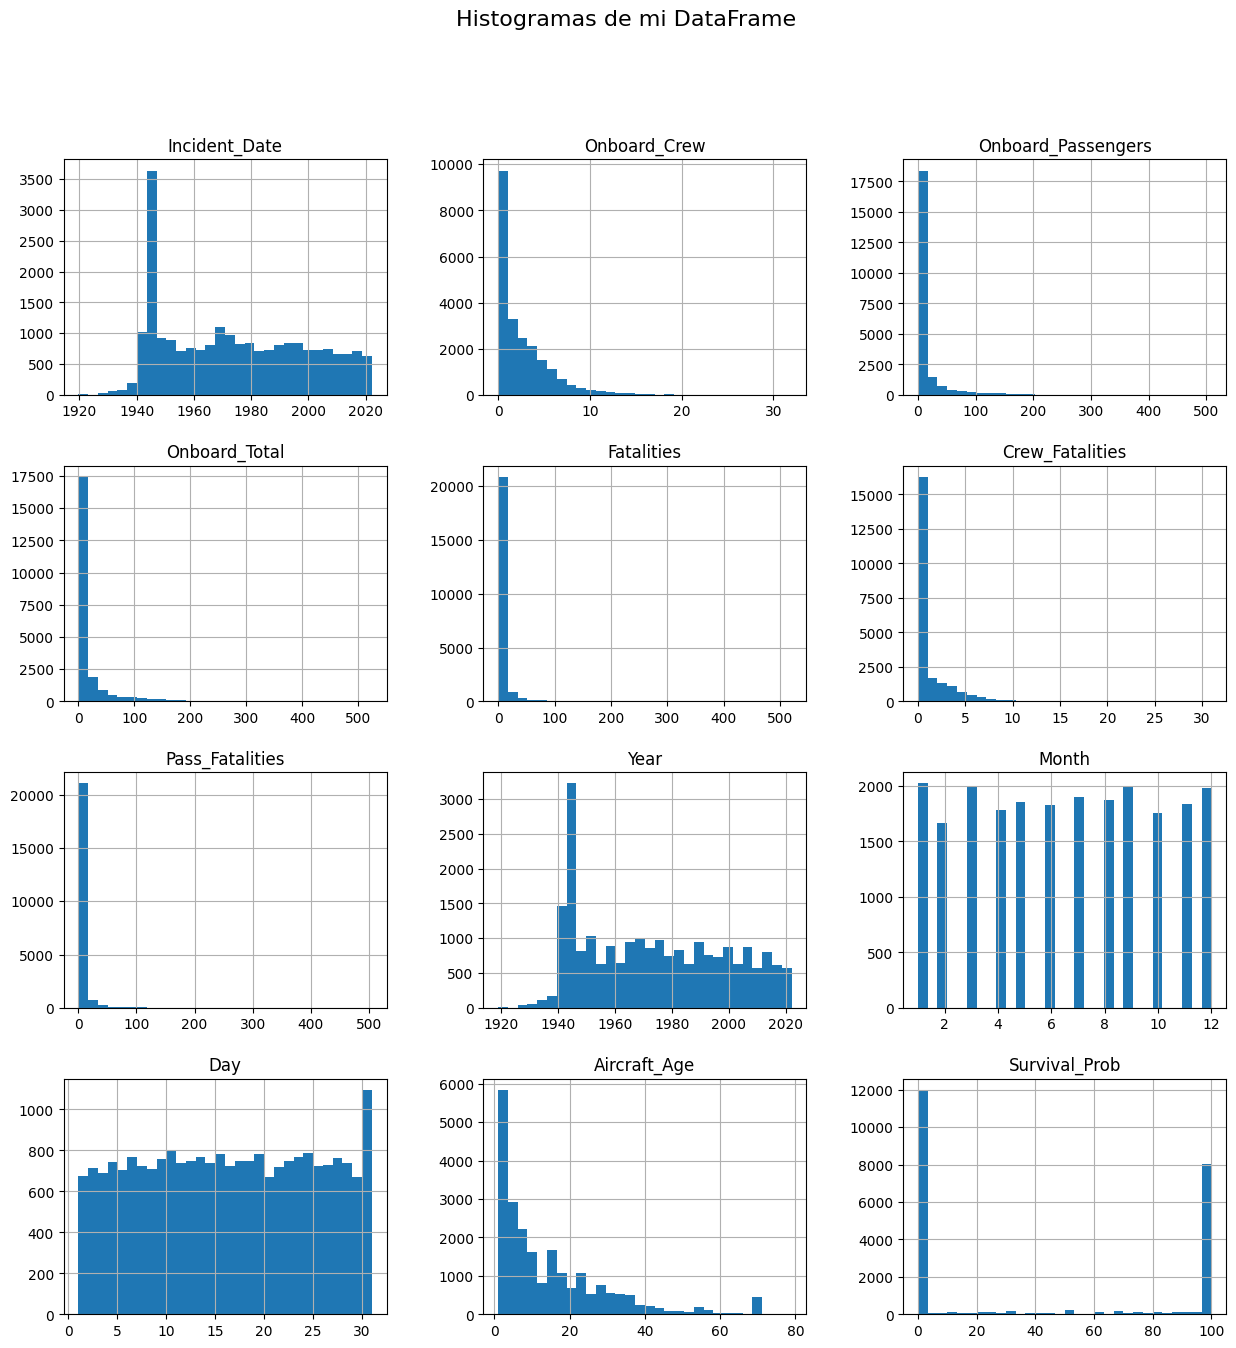

In [95]:
# Comprobamos el balance de las variables

df.hist(bins = 30, figsize = (15, 15))

plt.suptitle('Histogramas de mi DataFrame', fontsize = 16)

In [96]:
# Guardamos el dataset corregido en un nuevo archivo:

df.to_csv('Aircraft_Incident_Dataset_new.csv')
files.download('Aircraft_Incident_Dataset_new.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **[ANÁLISIS EXPLORATORIO (EDA)](#scrollTo=FNLamiM5YI3E)**

A partir de éste segmento, utilizamos el dataset guardado posterior a Data Wrangling 'Aircraft_Incident_Dataset_new', el cual nos permitirá ejecutar los códigos desde éste punto, sin necesidad de recorrer los segmentos previos.\
Realizaremos el análisis exploratiorio combinando análisis univariado y bivariado de datos, obteniendo visualizaciones para intentar responder las siguientes preguntas de interés:

01. ¿Cómo fue la evolución histórica de casos? ¿Se podría decir que aumentó o disminuyó?\
[desarrollo ⬎](#scrollTo=LBPXuhmSQ8jK)
02. *¿Como varió la cantidad de fallecidos al respecto?*\
[desarrollo ⬎](#scrollTo=jUzwGfWnzlRj)
03. *¿Hay algún período en el año donde sean más factibles los sucesos?*\
[desarrollo ⬎](#scrollTo=bRuxCKoLU4gq)
04. *¿Hay tendencias en los tipos de vuelos, sean domésticos o internacionales? ¿Lo hubo durante los años registrados?*\
[desarrollo ⬎](#scrollTo=tW1ec9YlR9-T)
05. *¿Cómo se constituyen los tipos de daños que sufren las aeronaves?*\
[desarrollo ⬎](#scrollTo=6RdPNktKaosS)
06. *¿En qué fases de vuelos se dan la mayoría de los casos y cuáles son los tipos de aeronaves más afectadas?*\
[desarrollo ⬎](#scrollTo=LH9V7pbJe_w5)
07. *¿Tiene relación la antigüedad de la aeronave con los daños más severos y/o destrucciones, en cuanto a registros de accidentes?*\
[desarrollo ⬎](#scrollTo=rKmUTMiNBESv)
08. *¿Cuáles son los modelos de aeronaves de mayor incidencia y cuántos valores únicos posee la variable 'Aircaft_Model'?*\
[desarrollo ⬎](#scrollTo=z5kVA0YlJA8T)
09. *En base a los modelos de aeronave de mayor incidencia, ¿cuáles son los tipos de accidentes/incidentes y los tipos de vuelos?*\
[desarrollo ⬎](#scrollTo=R2bn3gvvLeaD)
10. *¿Cuáles son los países más afectados y en cuál hemisferio?*\
[desarrollo ⬎](#scrollTo=vUoi3XxE44zs)

In [13]:
df = pd.read_csv('Aircraft_Incident_Dataset_new.csv', index_col=0)

# Corroboramos que el dataset guardado sea el correcto:
resumen_nulos(df)

'No hay columnas con valores nulos en el DataFrame.'

In [14]:
# Realizamos un último chequeo para cersiorar

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22464 entries, ZS-NRJ to N123
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Incident_Date        22464 non-null  object
 1   Aircaft_Model        22464 non-null  object
 2   Aircaft_Operator     22464 non-null  object
 3   Aircaft_Nature       22464 non-null  object
 4   Incident_Category    22464 non-null  object
 5   Incident_Cause(es)   22464 non-null  object
 6   Aircaft_Damage_Type  22464 non-null  object
 7   Aircaft_Engines      22464 non-null  object
 8   Onboard_Crew         22464 non-null  int64 
 9   Onboard_Passengers   22464 non-null  int64 
 10  Onboard_Total        22464 non-null  int64 
 11  Fatalities           22464 non-null  int64 
 12  Aircraft_Phase       22464 non-null  object
 13  Crew_Fatalities      22464 non-null  int64 
 14  Pass_Fatalities      22464 non-null  int64 
 15  Year                 22464 non-null  int64 
 16  Month

**COMENZAMOS CON LAS VISUALIZACIONES.**

01. *¿Cómo fue la evolución histórica de casos? ¿Se podría decir que aumentó o disminuyó?*

([⬑ volver a las preguntas](#scrollTo=24UXaxiVCA2Z))

Text(0.5, 1.0, 'Evolución de Casos por Año')

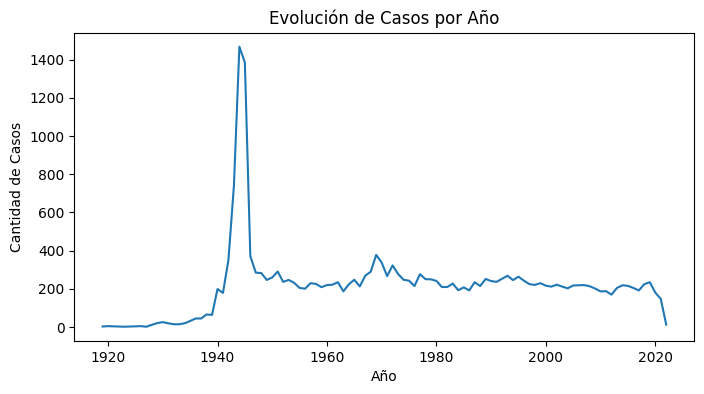

In [ ]:
conteo_por_año = df['Year'].value_counts().reset_index()
conteo_por_año.columns = ['Año', 'Cantidad']

plt.figure(figsize=(8, 4))
sns.lineplot(data=conteo_por_año, x='Año', y='Cantidad')

plt.xlabel('Año')
plt.ylabel('Cantidad de Casos')
plt.title('Evolución de Casos por Año')

Se puede ver un aumento drástico en el período 1940-45, lo cual es muy factible que sea por el período de la 2da guerra mundial (1 sept 1939 - 2 sept 1945).\
Luego se observa una tendencia que se mantienen entre 200 y 300 casos hasta fines del 2010 (con un leve incremento a fines de los '60, a priori, guerra de Vietnam, pero se dio entre '65-'75) y una marcada caída a partir del 2020.\
Para ello visualizamos el período real del dataset:

In [ ]:
fecha_min = df['Incident_Date'].min()
fecha_max = df['Incident_Date'].max()

print(f'El período del dataset se ubica entre {fecha_min} y {fecha_max}')

El período del dataset se ubica entre 1919-08-02 y 2022-02-15


En éste caso, la caída en la línea al final del gráfico está sujeta al período del dataset, ya que no completa registros del último año incluído, llegando sólo a febrero del 2022, sino que además tampoco completa registros de la década. No obstante, si trazamos un sector entre el tope de 2020 y 2021, la línea SI tiene un descenso considerable y es un factor de relevancia.

---

02. *¿Como varió la cantidad de fallecidos al respecto?*

([⬑ volver a las preguntas](#scrollTo=24UXaxiVCA2Z))

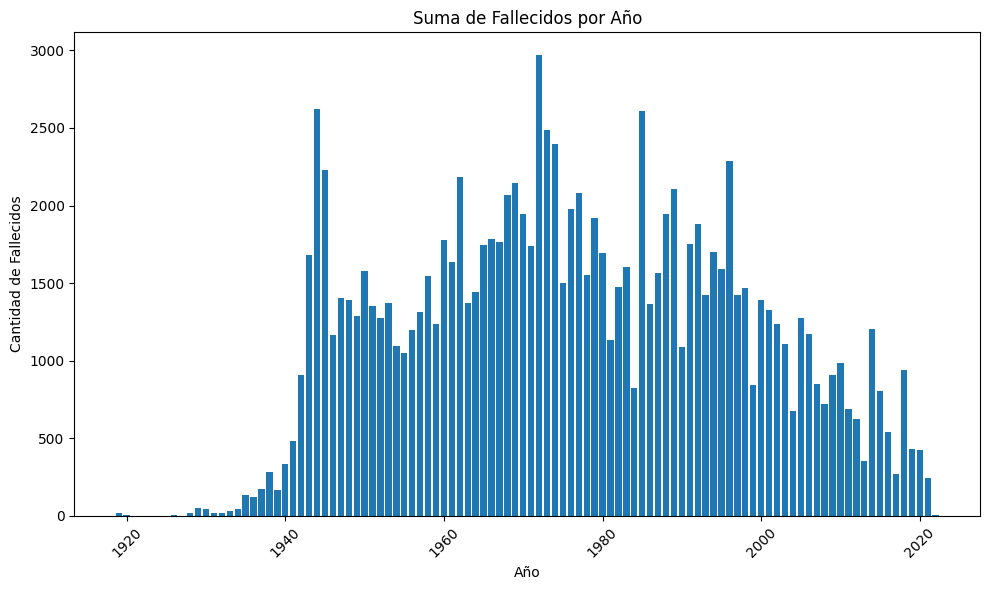

In [ ]:
fatalitiesXyear = df.groupby('Year')['Fatalities'].sum()

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(fatalitiesXyear.index, fatalitiesXyear.values)

ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de Fallecidos')
ax.set_title('Suma de Fallecidos por Año')

plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
total_registros = len(df)
total_fallecidos = df['Fatalities'].sum()
total_modelos = df['Aircaft_Model'].nunique()
promedio = total_fallecidos / total_registros

print(f'La cantidad de accidentes e incidentes registrados son: {total_registros}')
print(f'La cantidad de fallecidos totales registrados son: {total_fallecidos}')
print(f'La cantidad de modelos de aeronaves implicados son: {total_modelos}')
print(f'El promedio de fallecidos por caso es: {promedio:.2f}')  # Asignamos ':.2f' para reducir 2 decimales

La cantidad de accidentes e incidentes registrados son: 22464
La cantidad de fallecidos totales registrados son: 116067
La cantidad de modelos de aeronaves implicados son: 3384
El promedio de fallecidos por caso es: 5.17


La cantidad de fallecidos por año muestra una varianza irregular, pero con un pico en los '70 y una disminución a partir de los '80.\
Cabe recordar que, considerando el promedio de fallecidos, hay casos aislados que muy probablemente se deban a vuelos únicos con mayor capacidad de personas a bordo, los cuales hacen la diferencia respecto a la mayoría del resto de los casos y un gráfico de éste tipo es demasiado generalizado como para poder marcar una línea clara.\
De todas formas, si hacemos una comparativa con el primer gráfico del segmento donde la mayoría de los casos se registran entre 1940-45, ésto refuerza la hipótesis de que se trata de la 2da guerra mundial, ya que aeronaves militares (que cuentan como 1 registro c/u) suponen menor cantidad de gente a bordo, llegando a ser 1 en la mayoría.

---

03. *¿Hay algún período en el año donde sean más factibles los sucesos?*

([⬑ volver a las preguntas](#scrollTo=24UXaxiVCA2Z))

Visualizamos gráficos que sumen los casos por mes, podr día de la semana y por estación del año.

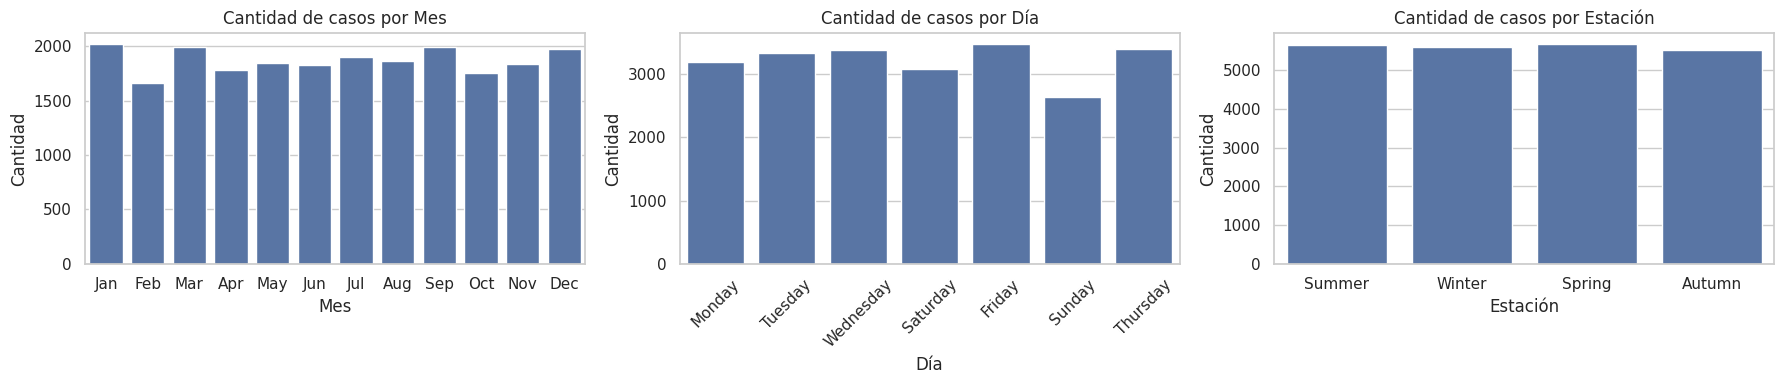

In [ ]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

sns.countplot(x='Month_name', data=df, ax=axes[0])
axes[0].set_xlabel('Mes')
axes[0].set_ylabel('Cantidad')
axes[0].set_title('Cantidad de casos por Mes')

sns.countplot(x='Day_name', data=df, ax=axes[1])
axes[1].set_xlabel('Día')
axes[1].set_ylabel('Cantidad')
axes[1].set_title('Cantidad de casos por Día')
axes[1].tick_params(axis='x', rotation=45)

sns.countplot(x='Season', data=df, ax=axes[2])
axes[2].set_xlabel('Estación')
axes[2].set_ylabel('Cantidad')
axes[2].set_title('Cantidad de casos por Estación')

plt.tight_layout()

Los meses que más casos registran son Enero, Marzo, Septiembre y Diciembre, aunque no presenta una línea que signifique algún patrón a considerar.\
En cuanto a los días de semana hay una línea bastante marcada de crecimiento durante los días semanales (lunes a viernes) y una caída considerable en sábados y domingos. Es un dato interesante ya que a priori se podría haber considerado que el fin de semana sería donde más casos se registren.\
Las estaciones son las que menos desbalance representan.

Text(0.5, 1.0, 'Cantidad de casos por Día')

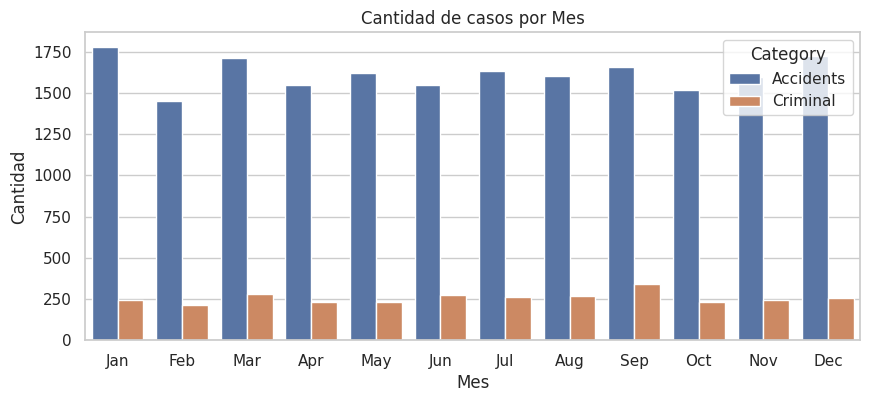

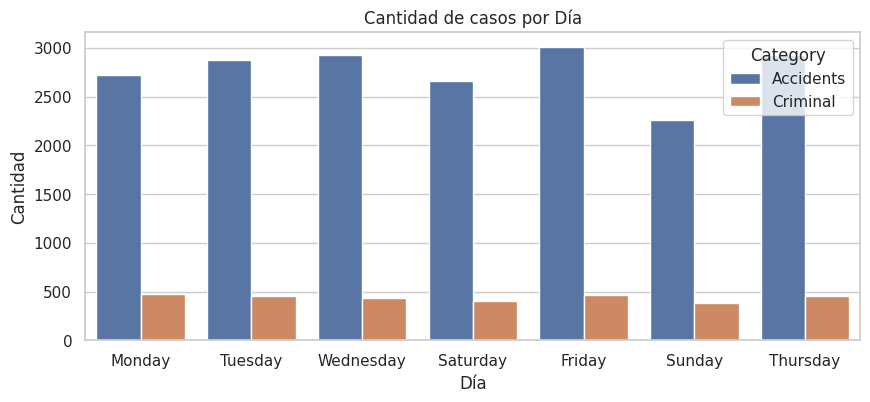

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Month_name', hue='Category', data=df)

plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Cantidad de casos por Mes')

plt.figure(figsize=(10, 4))
sns.countplot(x='Day_name', hue='Category', data=df)

plt.xlabel('Día')
plt.ylabel('Cantidad')
plt.title('Cantidad de casos por Día')

Podemos notar que las líneas no marcan mucha diferencia respecto a los primeros gráficos, al menos en la variable 'accidents' que es la que más casos registra.\
En cuanto a 'criminals', tampoco hay una línea o patrón a considerar, está bastante disperso y no deja mucho para analizar.\
También hay que considerar que la dispersión se deba a que son registros globales y no se avocan a una sola zona o región.

---

04. *¿Hay tendencias en los tipos de vuelos, sean domésticos o internacionales? ¿Lo hubo durante los años registrados?*

([⬑ volver a las preguntas](#scrollTo=24UXaxiVCA2Z))

Visualizamos mediante una matriz simple y luego utilizamos un gráfico de barras duplicado que categoriza el tipo de vuelo.

In [ ]:
category_counts = df[['Category', 'Flight_Type']].value_counts()
category_percentages = category_counts / len(df) * 100

category_percentages.round(2) # Asignamos roud(2) para reducir a 2 decimales

Category   Flight_Type  
Accidents  Domestic         43.51
           International    42.78
Criminal   Domestic          7.10
           International     6.62
dtype: float64

Notamos que la variable 'Accidents' de la variable 'Category' suma más del 86% de los casos, no obstante la suma total de las variables 'Domestic' e 'International' son casi iguales en valor, siendo del 50,6% y 49,4% respectivamente.

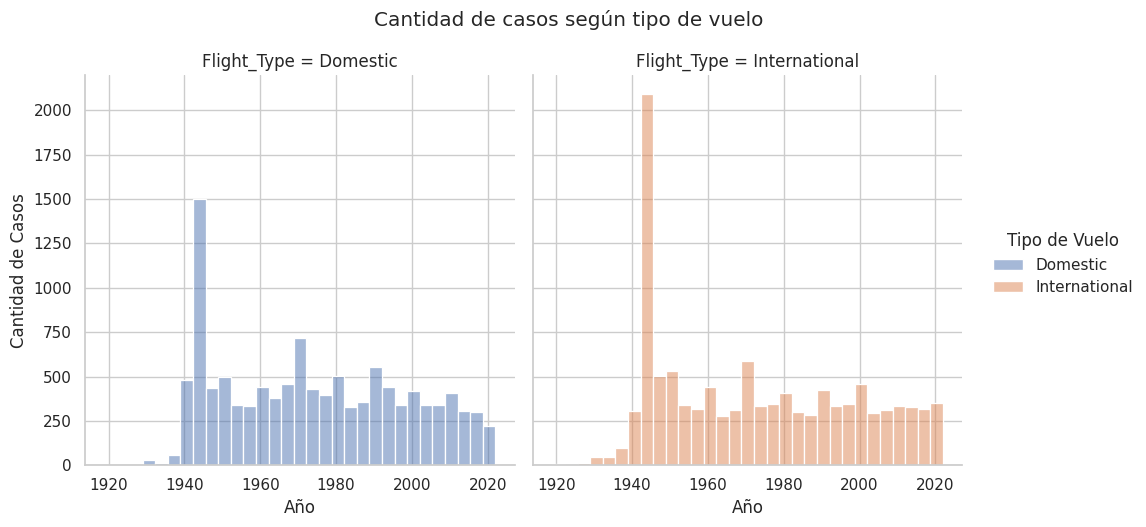

In [ ]:
g = sns.displot(data=df, x="Year", hue="Flight_Type", col="Flight_Type")

g.set_axis_labels("Año", "Cantidad de Casos")
g.fig.suptitle("Cantidad de casos según tipo de vuelo", y=1.05)
g._legend.set_title("Tipo de Vuelo")

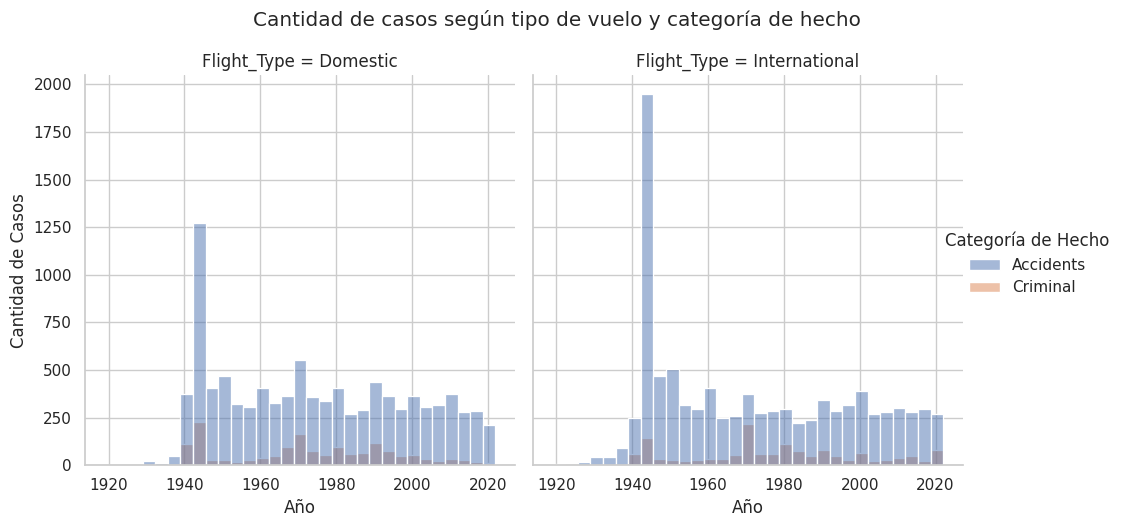

In [ ]:
g = sns.displot(data=df, x="Year", hue="Category", col="Flight_Type")

g.set_axis_labels("Año", "Cantidad de Casos")
g.fig.suptitle("Cantidad de casos según tipo de vuelo y categoría de hecho", y=1.05)
g._legend.set_title("Categoría de Hecho")

In [ ]:
category_counts = df[['Category', 'Flight_Type']].value_counts()
category_percentages = category_counts / len(df) * 100

category_percentages.round(2)

Category   Flight_Type  
Accidents  Domestic         43.51
           International    42.78
Criminal   Domestic          7.10
           International     6.62
dtype: float64

Notamos que la variable 'Accidents' de la variable 'Category' suma más del 86% de los casos, no obstante la suma total de las variables 'Domestic' e 'International' son casi iguales en valor, siendo del 50,6% y 49,4% respectivamente.


En éstos gráficos podemos ver que los accidentes componen más del 86% del total de los casos, no obstante la suma total de las variables 'Domestic' e 'International' son casi iguales en valor, siendo del 50,6% y 49,4% respectivamente.\
En cuanto a los hechos criminales con la clara minoría llegando apenas al 13%.\
En todos los casos, no se detecta una línea de comportamiento, salvo las varianzas aclaradas en el 1er gráfico.

---

05. *¿Cómo se constituyen los tipos de daños que sufren las aeronaves?*

([⬑ volver a las preguntas](#scrollTo=24UXaxiVCA2Z))

Para el siguiente gráfico es necesario especificar descripción de los Tipos de Daños en Aeronaves:

- **Substantial:** daño grave que podría significar un alto coste de reparación.
- **Destroyed:** aeronave destruída.
- **Damaged Beyond Repair:** daños irreparables.
- **Minor:** daños menores y/o reparables.
- **Missing:** aeronave perdida.

**se utiliza warnings.filterwarnings para ignorar temporalmente la advertencia alrededor de la disposición de la figura.*

<Figure size 1200x800 with 0 Axes>

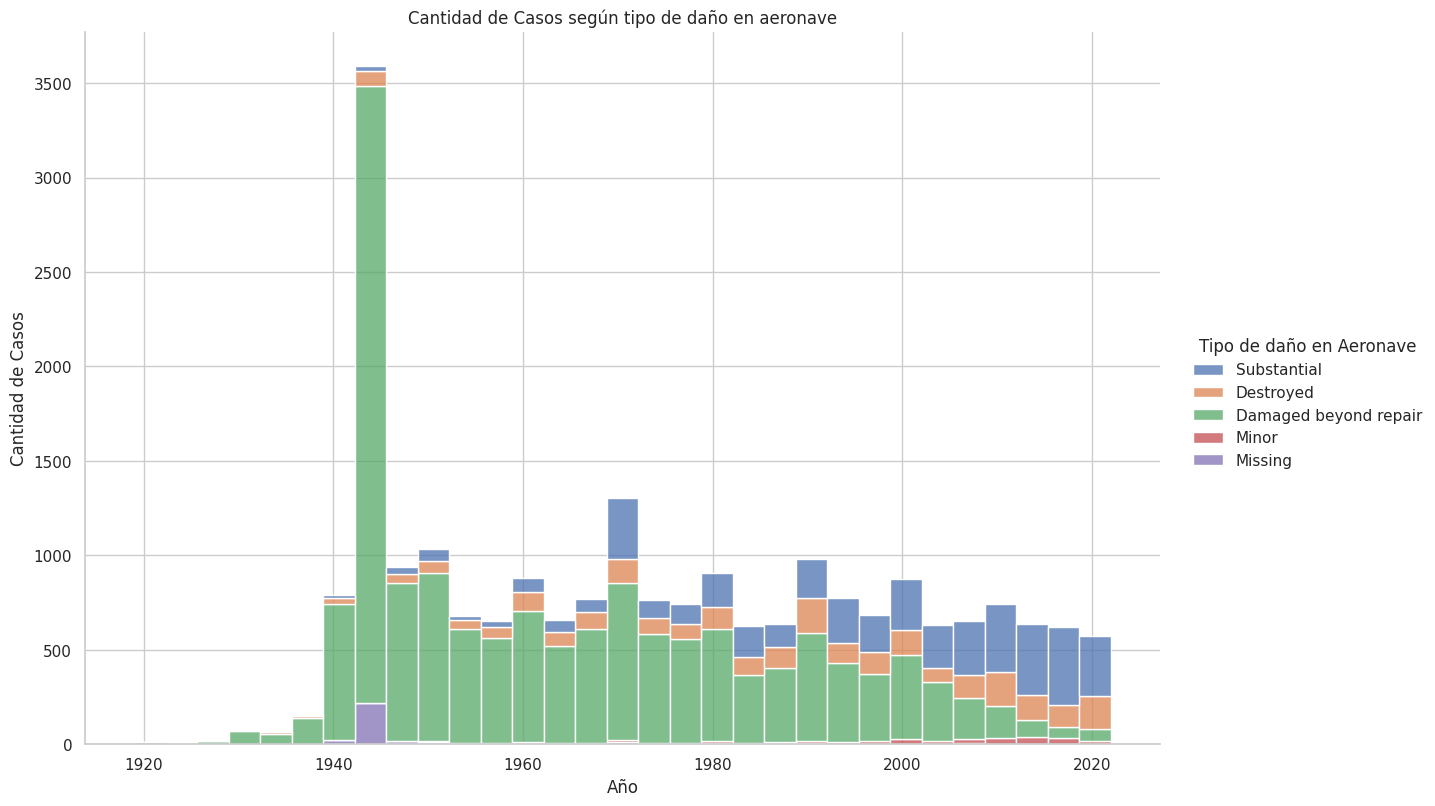

In [ ]:
plt.figure(figsize=(12, 8))

sns.set(style="whitegrid")

g = sns.displot(data=df, x="Year", hue="Aircaft_Damage_Type",
                multiple="stack", height=8, aspect=1.5, legend=True)

g.set(xlabel="Año", ylabel="Cantidad de Casos",
      title="Cantidad de Casos según tipo de daño en aeronave")

g._legend.set_title("Tipo de daño en Aeronave")
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
damage_counts = df['Aircaft_Damage_Type'].value_counts()
damage_counts = damage_counts / len(df) * 100

damage_counts

Damaged beyond repair    66.657764
Substantial              19.057158
Destroyed                11.409366
Missing                   1.615919
Minor                     1.259793
Name: Aircaft_Damage_Type, dtype: float64

Tiene sentido, tratándose de aeronaves, que los daños más severos (irreparable, sustancial y destruída) sean los que componen más del 97% de los casos registrados ya que la probabilidad de un accidente aéreo sin daños es casi inconcebible.\
La categoría 'Missing' encaja con el período de la 2da guerra mundial. Ya que no se observa antes o después en el tiempo.\
Aunque se puede ver que a partir de los '80 el porcentaje de daños sustanciales fue creciendo, mientras sucedía lo opuesto con los daños irreparables.\
Considerando también un crecimiento (aunque algo variado) de casos de aeronaves destruídas, podemos notar que, al margen de la baja de cantidad de casos en general, se mejoraron las medidas para que los daños no sean tan severos.


A continuación filtraremos los 3 casos de daños más severos para compararlos con las variables 'Category' y 'Survival_Prob'.


Text(0.5, 1.0, 'Probabilidad de Supervivencia según Tipo de Accidente y Daño')

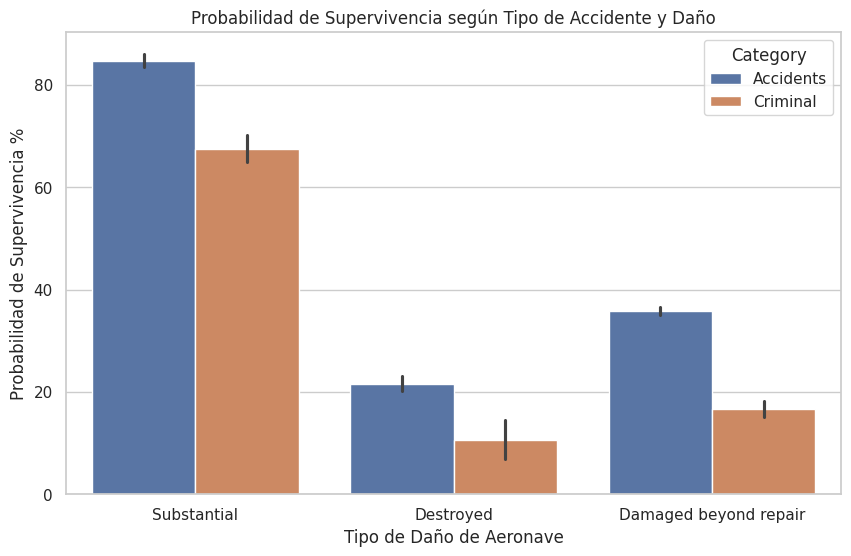

In [ ]:
most_damaged = df[df['Aircaft_Damage_Type'].isin(['Substantial', 'Destroyed',
                                                  'Damaged beyond repair'])]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Aircaft_Damage_Type', y='Survival_Prob', hue='Category',
            data=most_damaged)

plt.xlabel('Tipo de Daño de Aeronave')
plt.ylabel('Probabilidad de Supervivencia %')
plt.title('Probabilidad de Supervivencia según Tipo de Accidente y Daño')

La probabilidad de supervivencia es mayor en tipos de daños sustanciales, que si a ello sumamos que en gráficos previos pudimos ver que las últimas décadas la suma de fallecidos bajó y el tipo de daño sustancial aumentó proporcionalmente al descenso de daños irreparables, entonces hablamos de un progreso óptimo en cuando al estudio y desarrollo de aeronaves y sistemas de seguridad.\
También podemos notar que los hechos criminales son los que menor probabilidad de supervivencia registran ya que sólo en daños sustanciales supera el 60%, mientras que en el resto no llega siquiera al 20%.

---

06. *¿En qué fases de vuelos se dan la mayoría de los casos y cuáles son los tipos de aeronaves más afectadas?*

([⬑ volver a las preguntas](#scrollTo=24UXaxiVCA2Z))

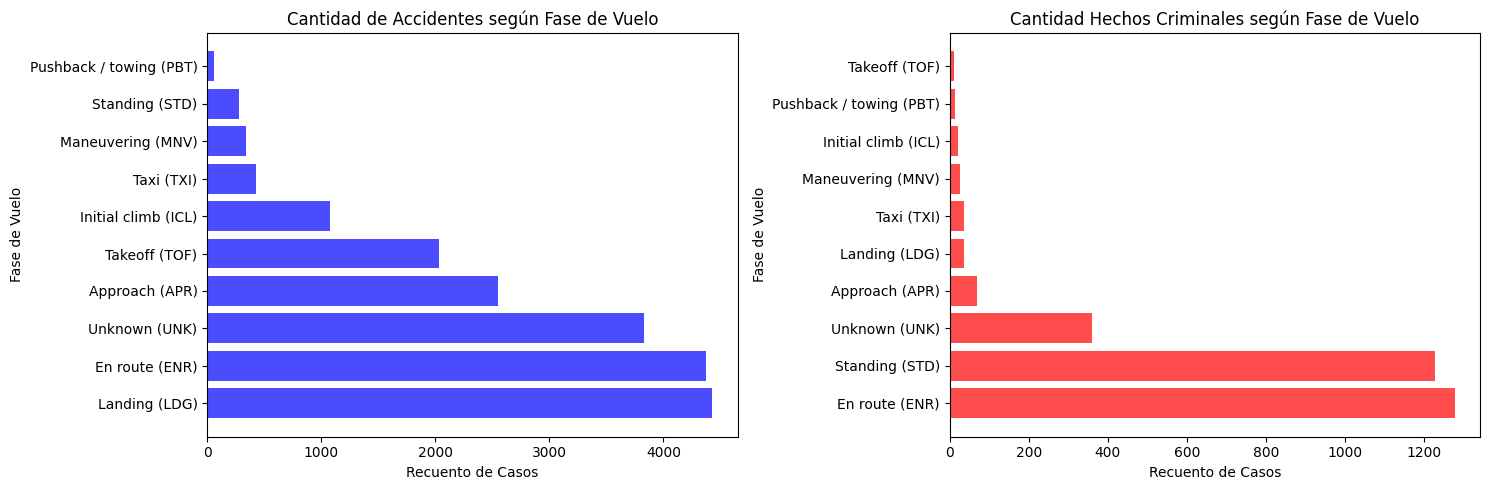

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))


count_phase_accidents = df[df['Category'] == 'Accidents']['Aircraft_Phase'].value_counts()
ax1.barh(count_phase_accidents.index, count_phase_accidents.values,
         color='b', alpha = 0.7)

ax1.set_xlabel('Recuento de Casos')
ax1.set_ylabel('Fase de Vuelo')
ax1.set_title('Cantidad de Accidentes según Fase de Vuelo')

count_phase_criminal = df[df['Category'] == 'Criminal']['Aircraft_Phase'].value_counts()
ax2.barh(count_phase_criminal.index, count_phase_criminal.values,
         color='r', alpha = 0.7)

ax2.set_xlabel('Recuento de Casos')
ax2.set_ylabel('Fase de Vuelo')
ax2.set_title('Cantidad Hechos Criminales según Fase de Vuelo')

plt.tight_layout()

En cuanto a los accidenes, la mayoría de los casos se dan en aterrizaje, en arribo o en camino, lo cual da un indicio de fallas técnicas, más aún considerando que el resto de casos que le siguen en cantidad, son despegue y ascenso.\
No obstante, los hechos criminales varían, muestran una distribución mucho más desbalanceada con más tendencia a suceder en camino o en suelo (standing) lo que da la pauta de otras intenciones, que pueden ser llegar a negociaciones o simplemente ir directamente al crimen en si.\
Para ello calcularemos la probabilidad de supervivencia en éstos hechos puntuales.

In [ ]:
criminal_data = df[df['Category'] == 'Criminal']

count_phase_criminal = criminal_data['Aircraft_Phase'].value_counts().reset_index()
count_phase_criminal.columns = ['Aircraft_Phase', 'Count']

grouped_data_criminal = criminal_data.groupby('Aircraft_Phase').agg({
                    'Fatalities': 'sum', 'Survival_Prob': 'mean'}).reset_index()

grouped_data_criminal['Survival_Prob'] = grouped_data_criminal['Survival_Prob'].round(2)

result = pd.merge(count_phase_criminal, grouped_data_criminal, on='Aircraft_Phase')

result

Aircraft_Phase  Count  Fatalities  Survival_Prob
0           En route (ENR)   1278        6904          59.31
1           Standing (STD)   1229         183           9.28
2            Unknown (UNK)    360         300          42.57
3           Approach (APR)     69         997          31.26
4            Landing (LDG)     37         102          49.84
5               Taxi (TXI)     36          24          51.36
6        Maneuvering (MNV)     26          93          25.73
7      Initial climb (ICL)     22         522          24.73
8  Pushback / towing (PBT)     13           0          30.77
9            Takeoff (TOF)     10          32          41.00

Con ésta última visualización podermos ver que los hechos criminales en tierra son los que menos probabilidades de supervivencia muestran y los casos que se dan en ruta, son los que mayor fatalidades suman, pero paradójicamente con mayor probabilidad de supervivencia. Ésto se da porque son casos con mayor cantidad de gente a bordo respecto al resto de las fases de vuelo.

A continuación seguimos con el desarrollo en la 2da variable categórica propuesta, los tipos de aeronaves.

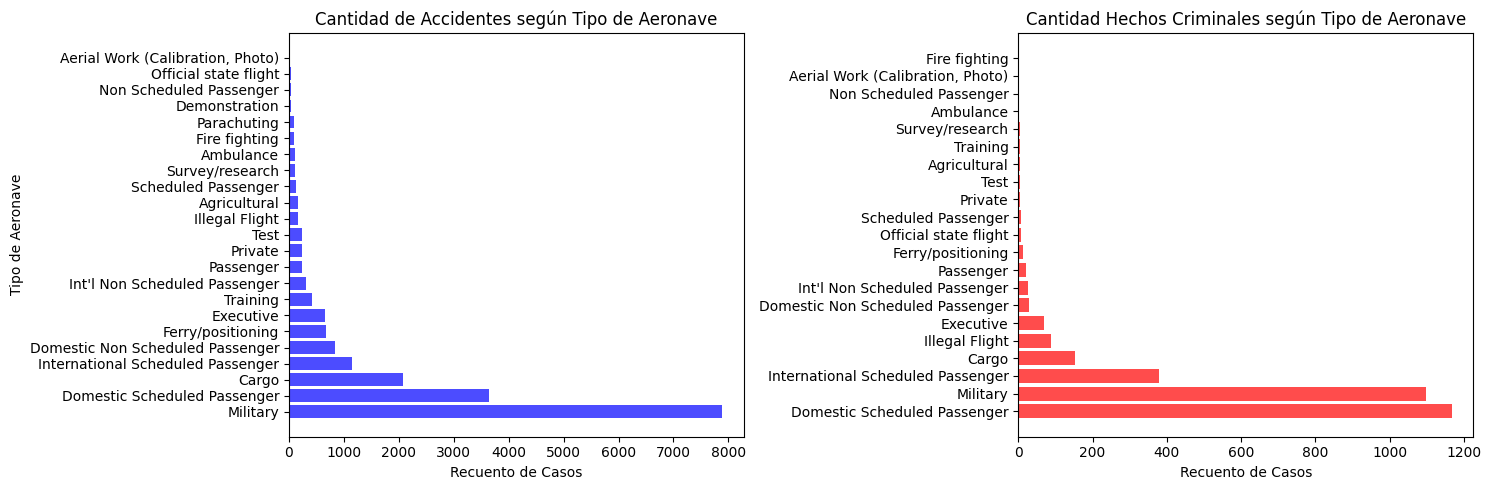

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

count_accidents = df[df['Category'] == 'Accidents']['Aircaft_Nature'].value_counts()
ax1.barh(count_accidents.index, count_accidents.values, color='b', alpha = 0.7)

ax1.set_xlabel('Recuento de Casos')
ax1.set_ylabel('Tipo de Aeronave')
ax1.set_title('Cantidad de Accidentes según Tipo de Aeronave')

count_criminal = df[df['Category'] == 'Criminal']['Aircaft_Nature'].value_counts()
ax2.barh(count_criminal.index, count_criminal.values, color='r', alpha = 0.7)

ax2.set_xlabel('Recuento de Casos')
ax2.set_title('Cantidad Hechos Criminales según Tipo de Aeronave')

plt.tight_layout()

Si bien hay una variación, más allá de la cantidad de los casos, en el tipo de aeronave más elegida al momento de un hecho criminal, los casos que omiten a las militares (por razones bastante lógicas) son las aeronaves de transporte de pasajeros. Lo cual indica la seriedad del crimen, hay una tendencia sobre la cantidad de personas a bordo afectadas.\
Intentaremos con otro gráfico que nos muestre otra perspectiva sobre los hechos criminales en relación al tipo de daño de la aeronave a través de las distintas décadas.

Text(0, 0.5, 'Tipo de Hecho Criminal')

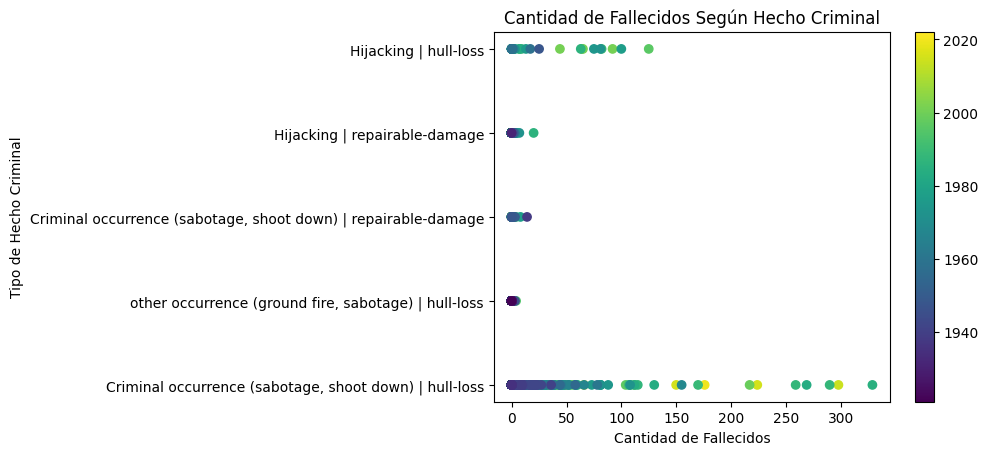

In [ ]:
criminal_filter = df[df['Category'] == 'Criminal']

fig, ax = plt.subplots()

mapeo_colores = ax.scatter(criminal_filter['Fatalities'],
                           criminal_filter['Incident_Category'],
                           c=criminal_filter['Year'])

fig.colorbar(mapeo_colores)

ax.set_title('Cantidad de Fallecidos Según Hecho Criminal')
ax.set_xlabel('Cantidad de Fallecidos')
ax.set_ylabel('Tipo de Hecho Criminal')

Con éste gráfico podemos notar claramente que la mayor cantidad de fallecidos se da por pérdida del casco, o sea, el daño más severo en las aeronaves.

Text(0.5, 1.0, 'Cantidad de Fallecidos Según Hecho Criminal')

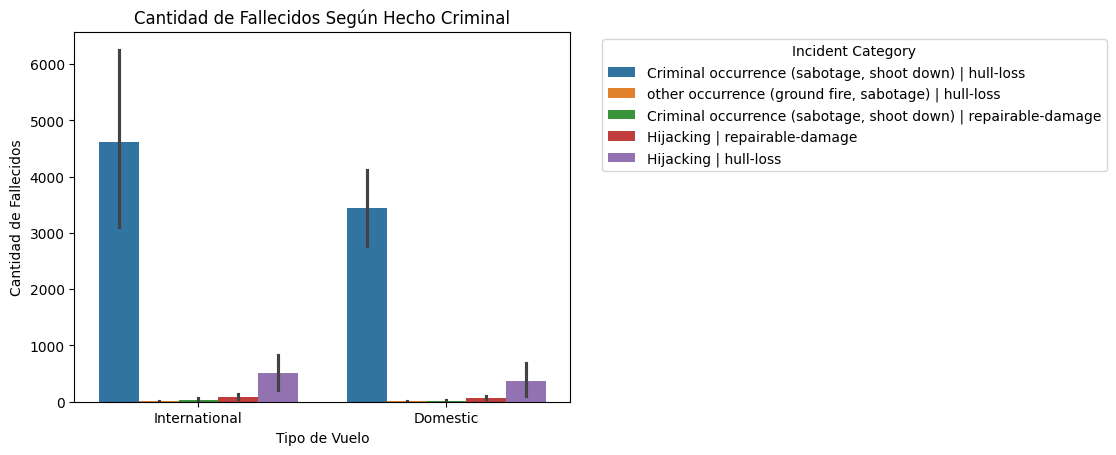

In [ ]:
sns.barplot(x="Flight_Type", y="Fatalities",
            hue= 'Incident_Category', estimator=sum,
            data=criminal_filter)

plt.xlabel('Tipo de Vuelo')
plt.ylabel('Cantidad de Fallecidos')
plt.legend(title='Incident Category',
           bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Cantidad de Fallecidos Según Hecho Criminal')

En éste último gráfico podemos ver que la mayoría de los casos de hecho criminal se da en vuelos internacionales, los cuales se consideran de tipo pasajeros, según gráficos anteriores.

---

07. *¿Tiene relación la antigüedad de la aeronave con los daños más severos y/o destrucciones, en cuanto a registros de accidentes?*

([⬑ volver a las preguntas](#scrollTo=24UXaxiVCA2Z))

Primero, contabilizamos la cantidad de casos según daño.

In [ ]:
df['Aircaft_Damage_Type'].value_counts()

Damaged beyond repair    14974
Substantial               4281
Destroyed                 2563
Missing                    363
Minor                      283
Name: Aircaft_Damage_Type, dtype: int64

Ahora utilizamos un gráfico sns.boxplot que nos permitirá ver si la antigüedad de las aeronaves incide o no sobre los casos de accidentes y los daños ocasionados. Se despliega 2 veces el gráfico con distintas visualizaciones:
- La primera es más generalizada con un filtrado de los 3 tipos de daños más graves, que a su vez son los que más se repiten (Substantial, Destoyed, Damaged Beyond Repair).
- La segunda considera además las categorías de accidentes, según variable 'Incident_Category', que no incluyan secuestros o hechos criminales.

Text(0.5, 1.0, 'Boxplot de Registros por Edad y Daño')

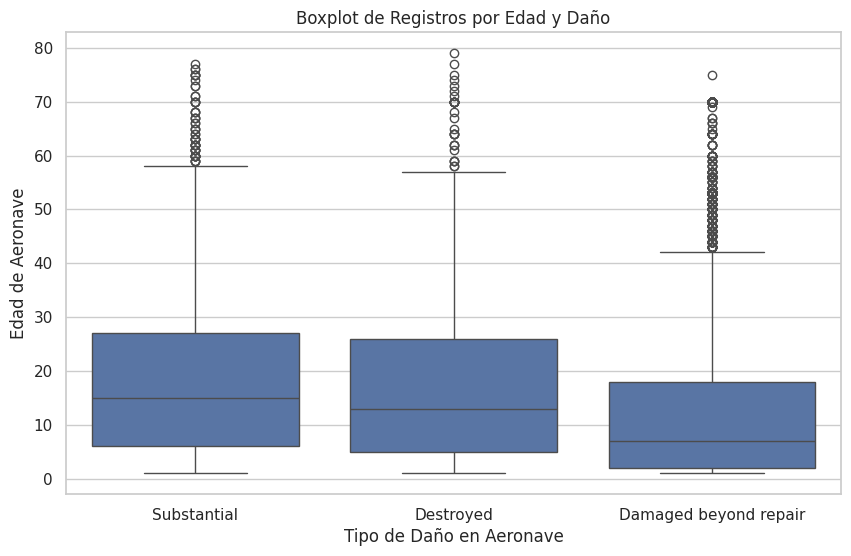

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='Aircaft_Damage_Type', y='Aircraft_Age',
            data=most_damaged, orient='v')

plt.xlabel('Tipo de Daño en Aeronave')
plt.ylabel('Edad de Aeronave')
plt.title('Boxplot de Registros por Edad y Daño')

En éste gráfico se puede ver que la mayoría de los casos se concentran en aeronaves que no llegan a los 30 años de antigüedad, no obstante aquellas que están en menor promedio (5 a 18 años) son las que se ubican en daños irreparables, pero a su vez es el tipo de daño que más outliers presenta, entre los 42 y 75 años de antigüedad.\
Con una breve búsqueda de los modelos más antiguos en la web, se pueden corroborar los outliers como tales, pero de casos reales de antigüedad.

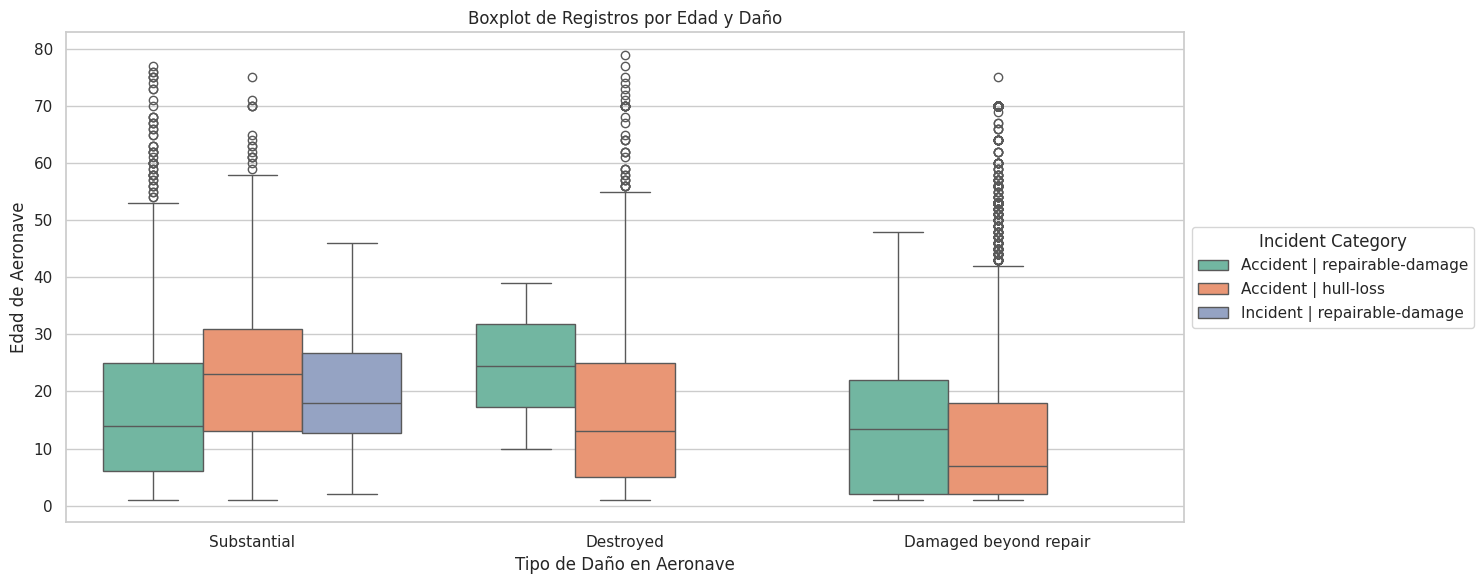

In [ ]:
most_damaged2 = df[
    (df['Aircaft_Damage_Type'].isin(['Substantial', 'Destroyed',
                                     'Damaged beyond repair'])) &
    (df['Incident_Category'].isin(['Accident | repairable-damage',
                                   'Accident | hull-loss',
                                    'Incident | repairable-damage']))]

plt.figure(figsize=(15, 6))

sns.boxplot(x='Aircaft_Damage_Type', y='Aircraft_Age',
            hue='Incident_Category', data=most_damaged2, palette='Set2')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title='Incident Category')

plt.xlabel('Tipo de Daño en Aeronave')
plt.ylabel('Edad de Aeronave')
plt.title('Boxplot de Registros por Edad y Daño')

plt.tight_layout()

En éste 2do gráfico podemos notar que los únicos casos de daños reparables concentran sus datos hasta los 31 años, con una línea media en gráfico que llega los 15 años.\
De todas maneras la mayoría de los datos se concentran por debajo de los 30 años, lo cual supone la vida útil promedio de las aeronaves, lo más probable es que no haya una correlación fuerte entre los accidentes y las edades de las aeronaves.

---

08. *¿Cuáles son los modelos de aeronaves de mayor incidencia y cuántos valores únicos posee el dataset según variable 'Aircaft_Model'?*

([⬑ volver a las preguntas](#scrollTo=24UXaxiVCA2Z))

(-0.5, 799.5, 399.5, -0.5)

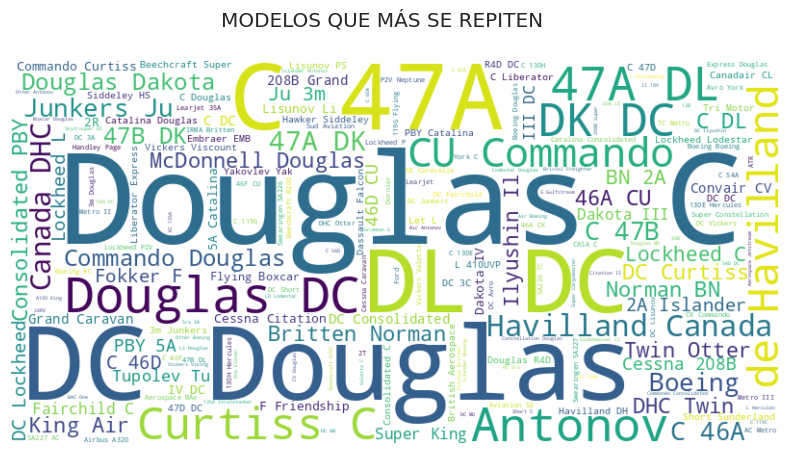

In [ ]:
# Resumen visual de los modelos que más veces se repiten

tex_cat = ' '.join(df['Aircaft_Model'])

wordcloud = WordCloud(width=800, height=400,
                      background_color='white').generate(tex_cat)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.suptitle('MODELOS QUE MÁS SE REPITEN')
plt.axis('off')

Dada la cantidad de valores únicos contabilizados con la función 'nunique()', se utiliza un top 20 de mayor cantidad de repeticiones.

In [ ]:
top20_acm = df['Aircaft_Model'].value_counts().head(20)

print('La cantidad de modelos de aeronaves implicadas es de', df['Aircaft_Model'].nunique())
print('')
print('REALIZAMOS UN LISTADO TOP 20:')
print('')
print(top20_acm)

La cantidad de modelos de aeronaves implicadas es de 3384

REALIZAMOS UN LISTADO TOP 20:

Douglas C-47-DL (DC-3)                      455
Antonov An-2R                               356
Junkers Ju-52/3m                            336
de Havilland Canada DHC-6 Twin Otter 300    269
Douglas Dakota III (DC-3)                   255
Cessna 208B Grand Caravan                   232
Consolidated PBY-5A Catalina                212
Douglas C-47A-90-DL (DC-3)                  202
Douglas C-47 (DC-3)                         199
Douglas Dakota IV (DC-3)                    198
Douglas C-47A-25-DK (DC-3)                  196
Antonov An-2                                174
Douglas C-47A-80-DL (DC-3)                  172
Lisunov Li-2                                158
Beechcraft 200 Super King Air               151
Consolidated PBY-5 Catalina                 150
Antonov An-26                               123
Douglas DC-3                                123
Boeing 727                                  12

Text(0.5, 1.0, 'Top 20 de Aeronaves Según Modelo')

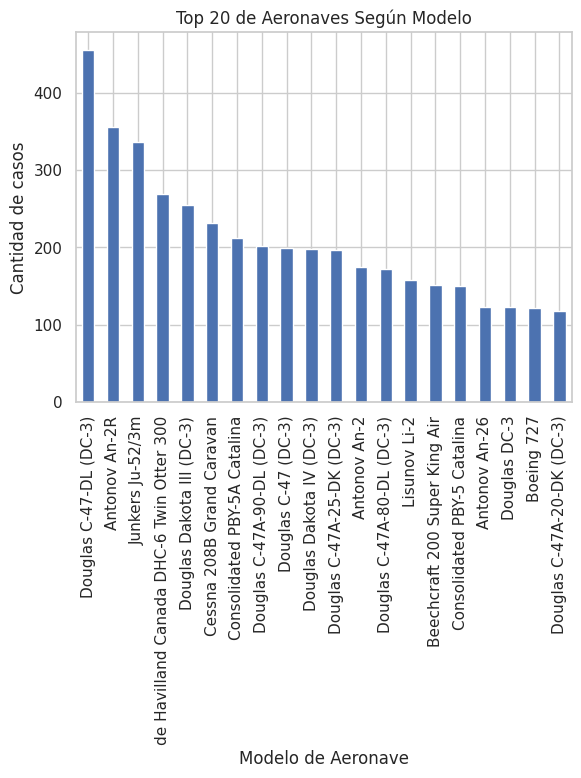

In [ ]:
top20_acm.plot.bar()

plt.xlabel('Modelo de Aeronave')
plt.ylabel('Cantidad de casos')
plt.title('Top 20 de Aeronaves Según Modelo')

Sobre éste top 20 obtenido intentaremos obtener el modelo de aeronave que menor promedio tenga de fallecidos según personas a bordo.

- se utilizan funciones *.sum()* para las variables 'Onboard_Total' y 'Fatalities'.
- se consideran sólo los modelos de aeronaves según el top 20 obtenido previamente.

In [ ]:
data = {
    'Aircaft_Model': top20_acm.index,
    'Onboard_Total_Sum': [df[df['Aircaft_Model'] == model]['Onboard_Total'].sum() for model in top20_acm.index],
    'Fatalities_Sum': [df[df['Aircaft_Model'] == model]['Fatalities'].sum() for model in top20_acm.index]
}

df_top20 = pd.DataFrame(data)
df_top20

Aircaft_Model  Onboard_Total_Sum  \
0                     Douglas C-47-DL (DC-3)               2275   
1                              Antonov An-2R                677   
2                           Junkers Ju-52/3m               1528   
3   de Havilland Canada DHC-6 Twin Otter 300               2852   
4                  Douglas Dakota III (DC-3)                803   
5                  Cessna 208B Grand Caravan               1353   
6               Consolidated PBY-5A Catalina                915   
7                 Douglas C-47A-90-DL (DC-3)                927   
8                        Douglas C-47 (DC-3)               1800   
9                   Douglas Dakota IV (DC-3)                740   
10                Douglas C-47A-25-DK (DC-3)                868   
11                              Antonov An-2                674   
12                Douglas C-47A-80-DL (DC-3)                675   
13                              Lisunov Li-2               1203   
14             Beechcraft 200 Super King Air                545   
15               Consolidated PBY-5 Catalina                464   
16                             Antonov An-26               1868   
17                              Douglas DC-3               1020   
18                                Boeing 727               8165   
19                Douglas C-47A-20-DK (DC-3)                694   

    Fatalities_Sum  
0             1249  
1              276  
2              599  
3             1006  
4              418  
5              292  
6              269  
7              588  
8              797  
9              366  
10             473  
11             272  
12             457  
13             710  
14             276  
15             131  
16             862  
17             375  
18               8  
19             365

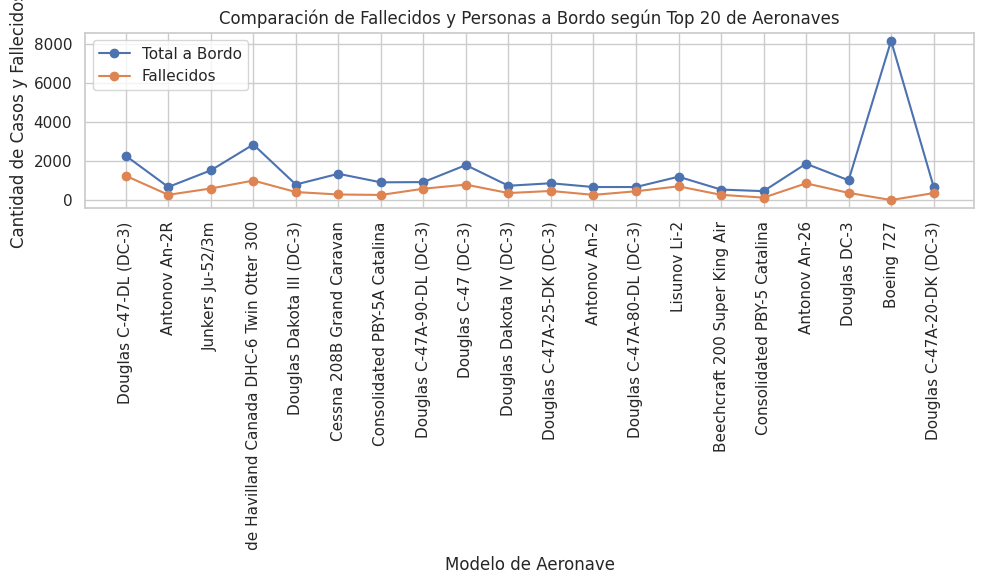

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(df_top20['Aircaft_Model'], df_top20['Onboard_Total_Sum'],
         marker='o', label='Total a Bordo')
plt.plot(df_top20['Aircaft_Model'], df_top20['Fatalities_Sum'],
         marker='o', label='Fallecidos')

plt.xlabel('Modelo de Aeronave')
plt.ylabel('Cantidad de Casos y Fallecidos')
plt.title('Comparación de Fallecidos y Personas a Bordo según Top 20 de Aeronaves')
plt.xticks(rotation=90)

plt.legend()
plt.tight_layout()

Creamos una lista para visualizar la aeronave con mayor cantidad de fallecidos:

In [ ]:
df_top20[['Aircaft_Model', 'Onboard_Total_Sum', 'Fatalities_Sum']].sort_values(by='Fatalities_Sum', ascending=False)

Aircaft_Model  Onboard_Total_Sum  \
0                     Douglas C-47-DL (DC-3)               2275   
3   de Havilland Canada DHC-6 Twin Otter 300               2852   
16                             Antonov An-26               1868   
8                        Douglas C-47 (DC-3)               1800   
13                              Lisunov Li-2               1203   
2                           Junkers Ju-52/3m               1528   
7                 Douglas C-47A-90-DL (DC-3)                927   
10                Douglas C-47A-25-DK (DC-3)                868   
12                Douglas C-47A-80-DL (DC-3)                675   
4                  Douglas Dakota III (DC-3)                803   
17                              Douglas DC-3               1020   
9                   Douglas Dakota IV (DC-3)                740   
19                Douglas C-47A-20-DK (DC-3)                694   
5                  Cessna 208B Grand Caravan               1353   
1                              Antonov An-2R                677   
14             Beechcraft 200 Super King Air                545   
11                              Antonov An-2                674   
6               Consolidated PBY-5A Catalina                915   
15               Consolidated PBY-5 Catalina                464   
18                                Boeing 727               8165   

    Fatalities_Sum  
0             1249  
3             1006  
16             862  
8              797  
13             710  
2              599  
7              588  
10             473  
12             457  
4              418  
17             375  
9              366  
19             365  
5              292  
1              276  
14             276  
11             272  
6              269  
15             131  
18               8

Veamos éstos resultados en promedios:

In [ ]:
df_top20['Average'] = df_top20['Fatalities_Sum'] / df_top20['Onboard_Total_Sum']
df_top20[['Aircaft_Model', 'Onboard_Total_Sum',
          'Fatalities_Sum', 'Average']].sort_values(by='Average', ascending=False)

Aircaft_Model  Onboard_Total_Sum  \
12                Douglas C-47A-80-DL (DC-3)                675   
7                 Douglas C-47A-90-DL (DC-3)                927   
13                              Lisunov Li-2               1203   
0                     Douglas C-47-DL (DC-3)               2275   
10                Douglas C-47A-25-DK (DC-3)                868   
19                Douglas C-47A-20-DK (DC-3)                694   
4                  Douglas Dakota III (DC-3)                803   
14             Beechcraft 200 Super King Air                545   
9                   Douglas Dakota IV (DC-3)                740   
16                             Antonov An-26               1868   
8                        Douglas C-47 (DC-3)               1800   
1                              Antonov An-2R                677   
11                              Antonov An-2                674   
2                           Junkers Ju-52/3m               1528   
17                              Douglas DC-3               1020   
3   de Havilland Canada DHC-6 Twin Otter 300               2852   
6               Consolidated PBY-5A Catalina                915   
15               Consolidated PBY-5 Catalina                464   
5                  Cessna 208B Grand Caravan               1353   
18                                Boeing 727               8165   

    Fatalities_Sum   Average  
12             457  0.677037  
7              588  0.634304  
13             710  0.590191  
0             1249  0.549011  
10             473  0.544931  
19             365  0.525937  
4              418  0.520548  
14             276  0.506422  
9              366  0.494595  
16             862  0.461456  
8              797  0.442778  
1              276  0.407681  
11             272  0.403561  
2              599  0.392016  
17             375  0.367647  
3             1006  0.352735  
6              269  0.293989  
15             131  0.282328  
5              292  0.215817  
18               8  0.000980

Podemos ver que los modelos Douglas son los más implicados en la suma de los casos y fatalidades.\
También podemos ver que Havilland Canada es el 2do con más fallecidos, pero dada la cantidad de pasajeros a bordo, se ubica 13vo en promedios.\
El caso Boeing 727 es el es el que más personas a bordo sumó en los registros, pero de un promedio de fallecidos tan bajo que no llega ni al 0,01%.

---


09. *En base a los modelos de aeronave de mayor incidencia, ¿cuáles son los tipos de accidentes/incidentes y los tipos de vuelos?*

([⬑ volver a las preguntas](#scrollTo=24UXaxiVCA2Z))

Se puede ver claramente que si bien el Douglas C-47-DL (DC-3) es el modelo de aeronave que más casos registra y mayor cantidad de fallecidos suma, el Boeing 727 es el que más personas a bordo suma y el que menor cantidad de fallecidos posee, ya sea en suma como en promedio. Seguiremos analizando éstos casos en particular por intermedio de la 5ta pregunta planteada:

- ¿Cuáles son los tipos de accidentes o incidentes?
- ¿Cuáles son los tipos de vuelos?

In [ ]:
filtro_B727 = df[df['Aircaft_Model'] == 'Boeing 727']
filtro_B727 = filtro_B727.sort_values(by='Onboard_Total', ascending=False)
filtro_B727[['Aircaft_Model', 'Onboard_Total']].head(10)

Aircaft_Model  Onboard_Total
7010     Boeing 727            157
8034     Boeing 727            152
11270    Boeing 727            138
9204     Boeing 727            136
8097     Boeing 727            136
9050     Boeing 727            132
8298     Boeing 727            132
11994    Boeing 727            131
4824     Boeing 727            131
8352     Boeing 727            130

In [ ]:
filtro_DC3 = df[df['Aircaft_Model'] == 'Douglas C-47-DL (DC-3)']
filtro_DC3 = filtro_DC3.sort_values(by='Onboard_Total', ascending=False)
filtro_DC3[['Aircaft_Model', 'Onboard_Total']].head(10)

Aircaft_Model  Onboard_Total
9763   Douglas C-47-DL (DC-3)             40
13125  Douglas C-47-DL (DC-3)             36
12045  Douglas C-47-DL (DC-3)             35
13302  Douglas C-47-DL (DC-3)             35
12967  Douglas C-47-DL (DC-3)             34
11068  Douglas C-47-DL (DC-3)             34
17205  Douglas C-47-DL (DC-3)             34
14090  Douglas C-47-DL (DC-3)             33
16832  Douglas C-47-DL (DC-3)             32
14989  Douglas C-47-DL (DC-3)             31

Procedemos a graficar las diferencias entre tipos de accidentes o incidentes y tipos de vuelos entre ambas aeronaves:

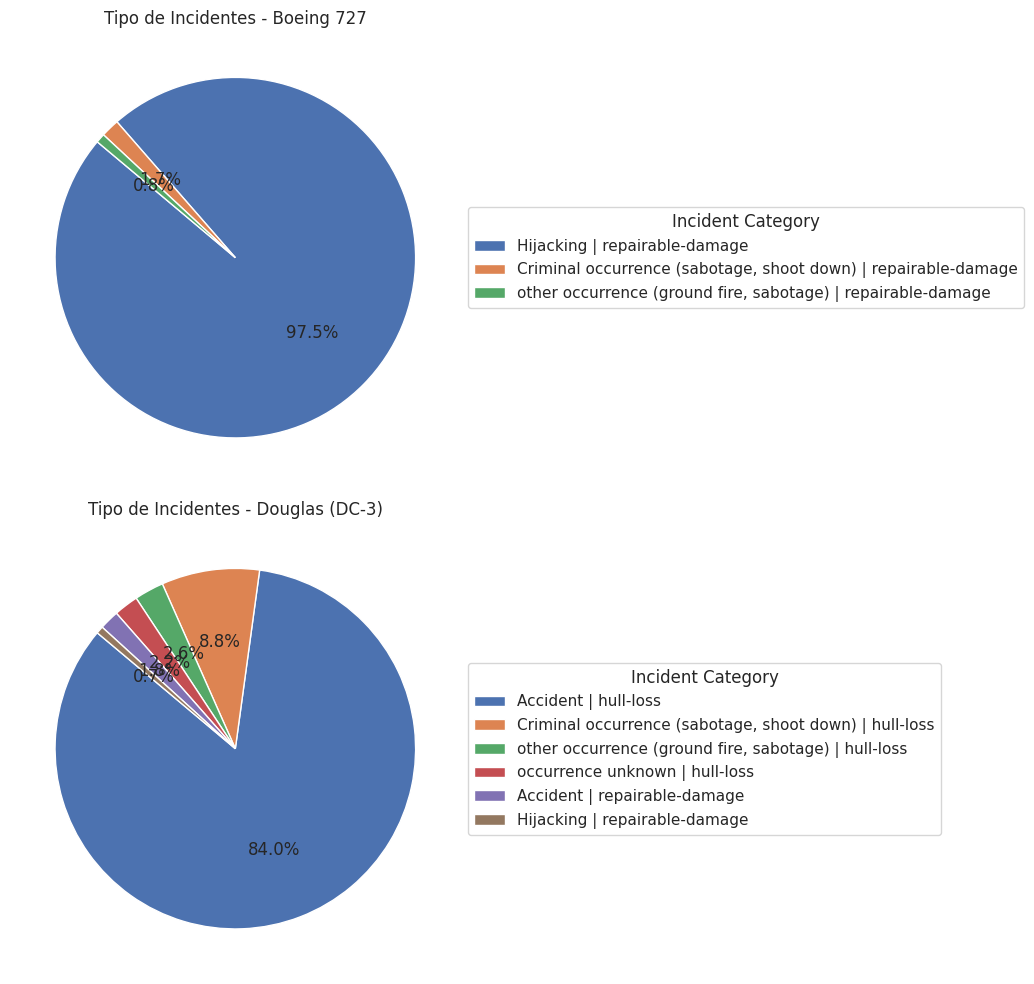

In [ ]:
data1 = filtro_B727['Incident_Category'].value_counts()
labels1 = data1.index
data2 = filtro_DC3['Incident_Category'].value_counts()
labels2 = data2.index

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.pie(data1, labels=None, autopct='%1.1f%%', startangle=140)
plt.legend(labels1, title='Incident Category', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Tipo de Incidentes - Boeing 727')

plt.subplot(2, 1, 2)
plt.pie(data2, labels=None, autopct='%1.1f%%', startangle=140)
plt.legend(labels2, title='Incident Category', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Tipo de Incidentes - Douglas (DC-3)')

plt.tight_layout()

El Boeing 727 presenta daños reparables en la mayoría de los casos y sus registros son del 97,5% secuestros.\
El Douglas (DC-3) presenta pérdida de casco en el 97,6% y son casos accidentales en el 84%.\
Lo que significa que el Boeing 727 figura en los registros porque hay una preferencia elevada hacia los secuestros, sin daños severos.

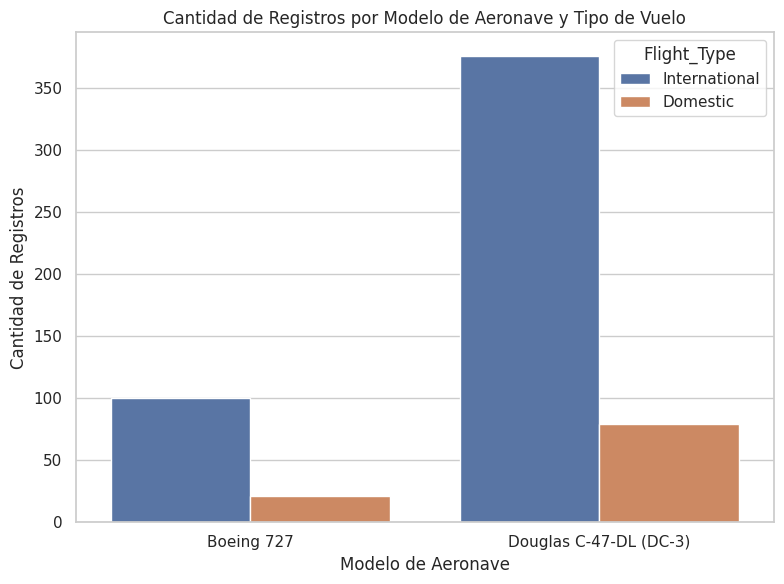

In [ ]:
filtros_concat = pd.concat([filtro_B727, filtro_DC3])

plt.figure(figsize=(8, 6))
sns.countplot(x='Aircaft_Model', hue='Flight_Type', data=filtros_concat)

plt.xlabel('Modelo de Aeronave')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros por Modelo de Aeronave y Tipo de Vuelo')

plt.tight_layout()

Por último podemos ver que el Boeing 727 registra más casos en ámbito internacional, pero muchos menos en vuelos domésticos y ésto se debe a que es una aeronave para transporte de pasajeros con capacidad que superan las 100 butacas, mientras que el Douglas C-47-DL (DC-3) es un avión militar con capacidades que no llegan a 20-30 personas a bordo, desarrollado y utilizado principalmente durante la 2da guerra mundial.\
Lo cual explica el considerable desbalance en cantidad de datos respecto al Boeing y al tipo de vuelo internacional.

10. *¿Cuáles son los países más afectados y en cuál hemisferio?*

([⬑ volver a las preguntas](#scrollTo=24UXaxiVCA2Z))

(-0.5, 799.5, 399.5, -0.5)

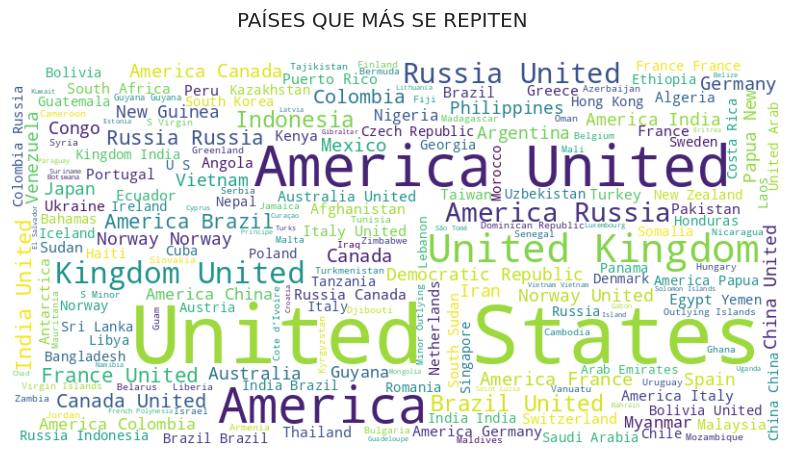

In [ ]:
# Resumen visual de los modelos que más veces se repiten

tex_cat2 = ' '.join(df['Country'])

wordcloud = WordCloud(width=800, height=400,
                      background_color='white').generate(tex_cat2)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.suptitle('PAÍSES QUE MÁS SE REPITEN')
plt.axis('off')

Al igual que con los modelos de aeronaves, dada la cantidad de valores únicos contabilizados con la función 'nunique()', utilizaremos un top 20 de mayor cantidad de repeticiones.

In [ ]:
top20_country = df['Country'].value_counts().head(20)

print('La cantidad de países implicados es de', df['Country'].nunique())
print('')
print('REALIZAMOS UN LISTADO TOP 20:')
print('')
print(top20_country)

La cantidad de países implicados es de 220

REALIZAMOS UN LISTADO TOP 20:

United States of America            7143
Russia                              1882
United Kingdom                      1352
Brazil                               831
Canada                               761
France                               659
India                                646
Norway                               512
Colombia                             420
Indonesia                            363
China                                345
Germany                              303
Australia                            248
Mexico                               227
Italy                                221
Vietnam                              208
Philippines                          194
Argentina                            190
Japan                                180
Democratic Republic of the Congo     167
Name: Country, dtype: int64


Text(0.5, 1.0, 'Distribución de Casos por País')

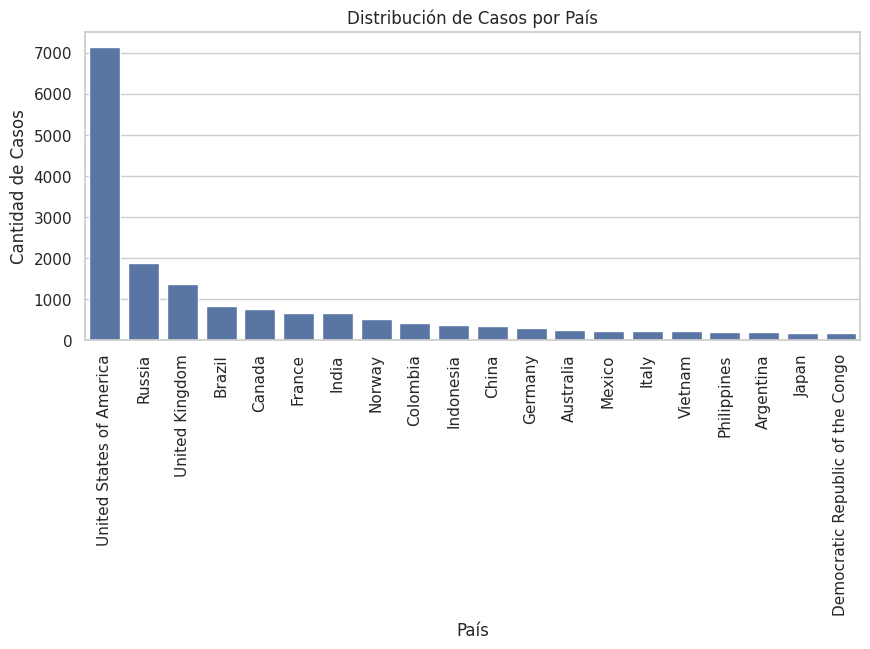

In [ ]:
plt.figure(figsize=(10, 4))

sns.countplot(x='Country', data=df[df['Country'].isin(top20_country.index)],
              order=top20_country.index)

plt.xticks(rotation=90)
plt.xlabel('País')
plt.ylabel('Cantidad de Casos')
plt.title('Distribución de Casos por País')

Al visualizar éste gráfico notamos una gran diferencia de Estados Unidos respecto al resto del mundo. Incluso por sobre otras potencias como Rusia y Reino Unido.\
Si a ésto le sumamos que el top 3 están geográficamente ubicados por encima de la línea ecuatorial, entonces responde claramente sobre los hemisferios.\
Procedemos a graficar.

Text(0.5, 1.0, 'Distribución de casos según Hemisferio')

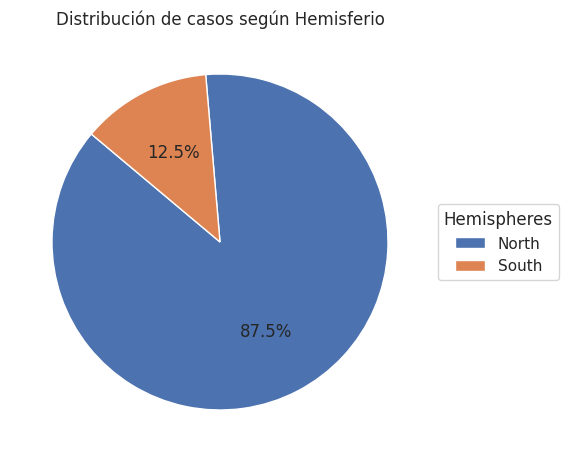

In [ ]:
data3 = df['Hemisphere'].value_counts()
labels3 = data3.index

plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.pie(data3, labels=None, autopct='%1.1f%%', startangle=140)
plt.legend(labels3, title='Hemispheres', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Distribución de casos según Hemisferio')

El hemisferio norte no sólo prevalece en éste dataset, sino también lo hará seguramente en muchas otras cuestiones que se precisen analizar ya que es la posición geográfica de las principales potencias y sucesos históricos.

In [ ]:
df['Category'].value_counts()

Accidents    19384
Criminal      3080
Name: Category, dtype: int64

## **[INSIGHTS OBTENIDOS](#scrollTo=FNLamiM5YI3E)**

- Hay una superioridad marcada del 86,3% de casos accidentales por sobre el 13,7% de casos criminales. Influyen sucesos históricos previamente mencionados y predominan las bajas.

- Entre las décadas del '40 y '50 hubo un pico de registros accidentales máximos, pero esto se debe a la segunda guerra mundial (1939-45), considerando que la mayoría de los accidentes fueron en aeronaves tipo militares.

- Los hechos criminales son en gran mayoría del tipo de vuelo doméstico con tendencia a suceder en vuelo o en suelo, de preferencia aeronaves de transporte de pasajeros, lo que indica como objetivo el secuestro con mayor cantidad de rehenes, sin llegar a daños severos, quizás con el fin de llegar a negociaciones.

- Los modelos Douglas (DC-3) son las aeronave con mayor cantidad de casos y fatalidades, esto se debe a que son de transporte militar y fueron desarrolladas y utilizadas principalmente durante la segunda guerra mundial.

- No hay correlación consistente entre la antigüedad de las aeronaves y los tipos de daños más severos, aunque los gráficos presentan muchos outliers, son casos reales pero aislados de la mayor concentración de datos, que se ubican por debajo de la vida útil promedio (25-30 años).

- Los datos muestran que la mayor probabilidad de supervivencia depende casi exclusivamente del tipo de daño que sufra la aeronave, siendo el daño sustancial, considerado como reparable (pese a su costo) el único que presenta una probabilidad por encima del 80%.

- Según los datos analizados, la aeronave que mayor probabilidad de supervivencia presenta y con daños menos severos es Boeing 727. Presenta promedio de fallecidos por debajo del 0,01%.

- Estados unidos tiene una superioridad marcada de casos registrados, dado que es el país más ligado a la historia de la aviación, sobretodo militar. Los países que le siguen, bastante por debajo, aún así son potencias como Rusia y Reino Unido, todos ubicados geográficamente por encima del ecuador, donde excepcionalmente aparece Brasil como el único país del hemisferio sur que supera los 500 casos (llegando a 831).

\

** Como consideración a futuro y para obtener más claridad en los informes, se trabajará con el dataset dividido, filtrando y quitando todos los registros de accidentes militares sucedidos durante la segunda guerra mundial (sep. 1939 a sep. 1945).

## **[FEATURE SELECTION](#scrollTo=FNLamiM5YI3E)**

Iniciamos el proceso de selección de características en el cual convertiremos variables categóricas a numéricas, escalaremos datos, comprobaremos el balance y corroboraremos su importancia mediante PCA.\
Comenzamos quitando los registros de aeronaves de uso militar y cuyo incidente se diera durante la 2da guerra mundial (01/09/1939 - 02/09/1945). La idea es mejorar el balance de los registros.\
Dichos datos no se borran, sino que quedan asignados en un 2do dataframe llamado 'df_ww2'.

In [4]:
df = pd.read_csv('Aircraft_Incident_Dataset_new.csv', index_col=0)

# Corroboramos que el dataset guardado sea el correcto:
resumen_nulos(df)

'No hay columnas con valores nulos en el DataFrame.'

In [5]:
condicion_ww2 = (df['Incident_Date'].between('1939-09-01', '1945-09-02')) & (df['Aircaft_Nature'] == 'Military')
df_ww2 = df[condicion_ww2]

df = df[~condicion_ww2]

In [6]:
# Corroboramos la división

print(df.shape)
print(df_ww2.shape)

(18712, 29)
(3752, 29)


Luego convertimos los valores de la variable 'Survival_Prob' para transformarla en binario, lo cual mejorará el funcionamiento del modelo.

In [7]:
df['Survival_Prob'] = (df['Onboard_Total'] - df['Fatalities']) / df['Onboard_Total']
df['Survival_Prob'] = df['Survival_Prob'].replace([np.nan, np.inf, -np.inf], 0).round().astype(int)

df['Survival_Prob'].value_counts()

0    10093
1     8619
Name: Survival_Prob, dtype: int64

Text(0, 0.5, 'Conteo')

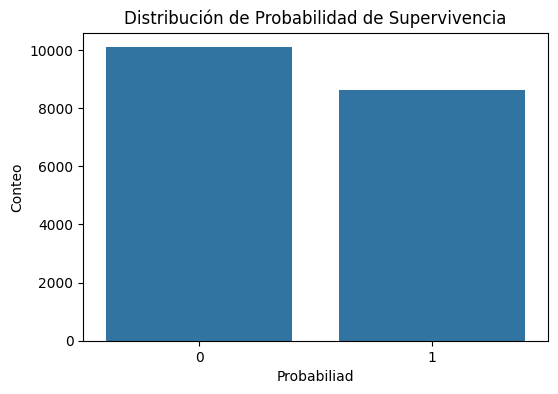

In [19]:
# Corroboramos la distribución mediante gráfico

count_surv = df['Survival_Prob'].value_counts()

plt.figure(figsize = (6, 4))
sns.barplot(x = count_surv.index,
            y = count_surv.values)

plt.title('Distribución de Probabilidad de Supervivencia')
plt.xlabel('Probabiliad')
plt.ylabel('Conteo')

Comenzamos eligiendo todas las variables que puedan influir en el objetivo a predecir, separándolas en 2 grupos para poder convertir las categóricas en numéricas mediante Label Encoder y luego volviendo a concatenarlas con las que ya eran tipo int en un dataset final para entrenar y testear.

In [8]:
var_cat = df[['Aircaft_Model', 'Aircaft_Nature', 'Incident_Category', 'Incident_Cause(es)',
              'Aircaft_Damage_Type', 'Aircaft_Engines', 'Aircraft_Phase', 'Flight_Type',
              'Category', 'Damage_Repair', 'Aircraft_Utility']]
var_cat.head(10)

Aircaft_Model  \
Aircaft_Registration                                        
ZS-NRJ                British Aerospace 4121 Jetstream 41   
HR-AYY                British Aerospace 3101 Jetstream 31   
EP-CAP                                     Boeing 737-4H6   
RA-64032                              Tupolev Tu-204-100C   
NaN                         Beechcraft 200 Super King Air   
N760JB                                    Airbus A320-232   
C-GEAS                       Beechcraft B300 King Air 350   
5H-TAZ                          Cessna 208B Grand Caravan   
SP-402                                      Antonov An-26   
RA-33599                                    Antonov An-2R   

                                        Aircaft_Nature  \
Aircaft_Registration                                     
ZS-NRJ                Domestic Non Scheduled Passenger   
HR-AYY                    Domestic Scheduled Passenger   
EP-CAP                    Domestic Scheduled Passenger   
RA-64032                                         Cargo   
NaN                                     Illegal Flight   
N760JB                    Domestic Scheduled Passenger   
C-GEAS                                        Military   
5H-TAZ                    Domestic Scheduled Passenger   
SP-402                                        Military   
RA-33599                                         Cargo   

                                                      Incident_Category  \
Aircaft_Registration                                                      
ZS-NRJ                                     Accident | repairable-damage   
HR-AYY                                     Accident | repairable-damage   
EP-CAP                                     Accident | repairable-damage   
RA-64032                                           Accident | hull-loss   
NaN                   Criminal occurrence (sabotage, shoot down) | h...   
N760JB                                     Accident | repairable-damage   
C-GEAS                                     Accident | repairable-damage   
5H-TAZ                                     Accident | repairable-damage   
SP-402                                     Accident | repairable-damage   
RA-33599                                           Accident | hull-loss   

                                                     Incident_Cause(es)  \
Aircaft_Registration                                                      
ZS-NRJ                Airplane - Engines, Airplane - Engines - Prop/...   
HR-AYY                Airplane - Undercarriage, Airplane - Undercarr...   
EP-CAP                Airplane - Undercarriage, Airplane - Undercarr...   
RA-64032              Cargo - Fire/smoke, Result - Damaged on the gr...   
NaN                                      Result - Damaged on the ground   
N760JB                Landing/takeoff - Tailstrike, Result - Runway ...   
C-GEAS                                        Result - Runway excursion   
5H-TAZ                                                 Info-Unavailable   
SP-402                                                 Info-Unavailable   
RA-33599                                               Info-Unavailable   

                        Aircaft_Damage_Type                   Aircaft_Engines  \
Aircaft_Registration                                                            
ZS-NRJ                          Substantial        2 Garrett TPE331-14GR-805H   
HR-AYY                          Substantial       2 Garrett TPE331-10UGR-516H   
EP-CAP                          Substantial                  2 CFMI CFM56-3C1   
RA-64032                          Destroyed                 2 Soloviev PS-90A   
NaN                   Damaged beyond repair    2 Pratt Whitney Canada PT6A-41   
N760JB                          Substantial                    2 IAE V2527-A5   
C-GEAS                          Substantial   2 Pratt Whitney Canada PT6A-60A   
5H-TAZ                          Substantial  1 Pratt Whitney Canada PT6A-114A   
SP

In [9]:
# Agrupamos las variables naturalmente numéricas

var_num = df[['Onboard_Crew', 'Crew_Fatalities', 'Onboard_Passengers', 'Pass_Fatalities', 'Aircraft_Age']]
var_num.head(10)

Onboard_Crew  Crew_Fatalities  Onboard_Passengers  \
Aircaft_Registration                                                      
ZS-NRJ                           3                0                   4   
HR-AYY                           0                0                   0   
EP-CAP                           0                0                   0   
RA-64032                         8                0                   0   
NaN                              0                0                   0   
N760JB                           0                0                   0   
C-GEAS                           0                0                   0   
5H-TAZ                           0                0                   0   
SP-402                           5                0                   7   
RA-33599                         2                2                   0   

                      Pass_Fatalities  Aircraft_Age  
Aircaft_Registration                                 
ZS-NRJ                              0            27  
HR-AYY                              0            37  
EP-CAP                              0            30  
RA-64032                            0            20  
NaN                                 0            27  
N760JB                              0            14  
C-GEAS                              0            32  
5H-TAZ                              0            16  
SP-402                              0             5  
RA-33599                            0            34

Convertimos el conjunto de variables categóricas en numéricas.\
Utilizaremos el método Label Encoder.

In [10]:
label_encoder = LabelEncoder()
var_cat = var_cat.apply(lambda col: label_encoder.fit_transform(col))

var_cat.head(10)

Aircaft_Model  Aircaft_Nature  Incident_Category  \
Aircaft_Registration                                                     
ZS-NRJ                         1088               5                  1   
HR-AYY                         1072               6                  1   
EP-CAP                          685               6                  1   
RA-64032                       3042               3                  0   
NaN                             269              10                  2   
N760JB                           74               6                  1   
C-GEAS                          296              13                  1   
5H-TAZ                         1255               6                  1   
SP-402                          150              13                  1   
RA-33599                        162               3                  0   

                      Incident_Cause(es)  Aircaft_Damage_Type  \
Aircaft_Registration                                            
ZS-NRJ                               231                    4   
HR-AYY                               526                    4   
EP-CAP                               526                    4   
RA-64032                             578                    1   
NaN                                 1005                    0   
N760JB                               934                    4   
C-GEAS                              1077                    4   
5H-TAZ                               872                    4   
SP-402                               872                    4   
RA-33599                             872                    1   

                      Aircaft_Engines  Aircraft_Phase  Flight_Type  Category  \
Aircaft_Registration                                                           
ZS-NRJ                            192               3            0         0   
HR-AYY                            171               3            0         0   
EP-CAP                             71               3            0         0   
RA-64032                          627               6            1         0   
NaN                               352               6            1         1   
N760JB                            301               7            1         0   
C-GEAS                            359               3            1         0   
5H-TAZ                             19               9            0         0   
SP-402                            311               3            0         0   
RA-33599                          311               2            0         0   

                      Damage_Repair  Aircraft_Utility  
Aircaft_Registration                                   
ZS-NRJ                            1                 3  
HR-AYY                            1                 3  
EP-CAP                            1                 3  
RA-64032                          0                 0  
NaN                               0                 2  
N760JB                            1                 3  
C-GEAS                            1                 1  
5H-TAZ                            1                 3  
SP-402                            1                 1  
RA-33599                          0                 0

Ahora concatenamos ambas varaibles para volver al formato de dataframe original.

In [11]:
var_fulldf = pd.concat([var_cat, var_num], axis = 1)

var_fulldf.head(10)

Aircaft_Model  Aircaft_Nature  Incident_Category  \
Aircaft_Registration                                                     
ZS-NRJ                         1088               5                  1   
HR-AYY                         1072               6                  1   
EP-CAP                          685               6                  1   
RA-64032                       3042               3                  0   
NaN                             269              10                  2   
N760JB                           74               6                  1   
C-GEAS                          296              13                  1   
5H-TAZ                         1255               6                  1   
SP-402                          150              13                  1   
RA-33599                        162               3                  0   

                      Incident_Cause(es)  Aircaft_Damage_Type  \
Aircaft_Registration                                            
ZS-NRJ                               231                    4   
HR-AYY                               526                    4   
EP-CAP                               526                    4   
RA-64032                             578                    1   
NaN                                 1005                    0   
N760JB                               934                    4   
C-GEAS                              1077                    4   
5H-TAZ                               872                    4   
SP-402                               872                    4   
RA-33599                             872                    1   

                      Aircaft_Engines  Aircraft_Phase  Flight_Type  Category  \
Aircaft_Registration                                                           
ZS-NRJ                            192               3            0         0   
HR-AYY                            171               3            0         0   
EP-CAP                             71               3            0         0   
RA-64032                          627               6            1         0   
NaN                               352               6            1         1   
N760JB                            301               7            1         0   
C-GEAS                            359               3            1         0   
5H-TAZ                             19               9            0         0   
SP-402                            311               3            0         0   
RA-33599                          311               2            0         0   

                      Damage_Repair  Aircraft_Utility  Onboard_Crew  \
Aircaft_Registration                                                  
ZS-NRJ                            1                 3             3   
HR-AYY                            1                 3             0   
EP-CAP                            1                 3             0   
RA-64032                          0                 0             8   
NaN                               0                 2             0   
N760JB                            1                 3             0   
C-GEAS                            1                 1             0   
5H-TAZ                            1                 3             0   
SP-402                            1                 1             5   
RA-33599                          0                 0             2   

                      Crew_Fatalities  Onboard_Passengers  Pass_Fatalities  \
Aircaft_Registration                                                         
ZS-NRJ                              0                   4                0   
HR-AYY                              0                   0                0   
EP-CAP                              0                   0                0   
RA-64032                            0                   0                0   
NaN                                 0                   0             

Text(0.5, 0.98, 'Histogramas - Balance de las variables')

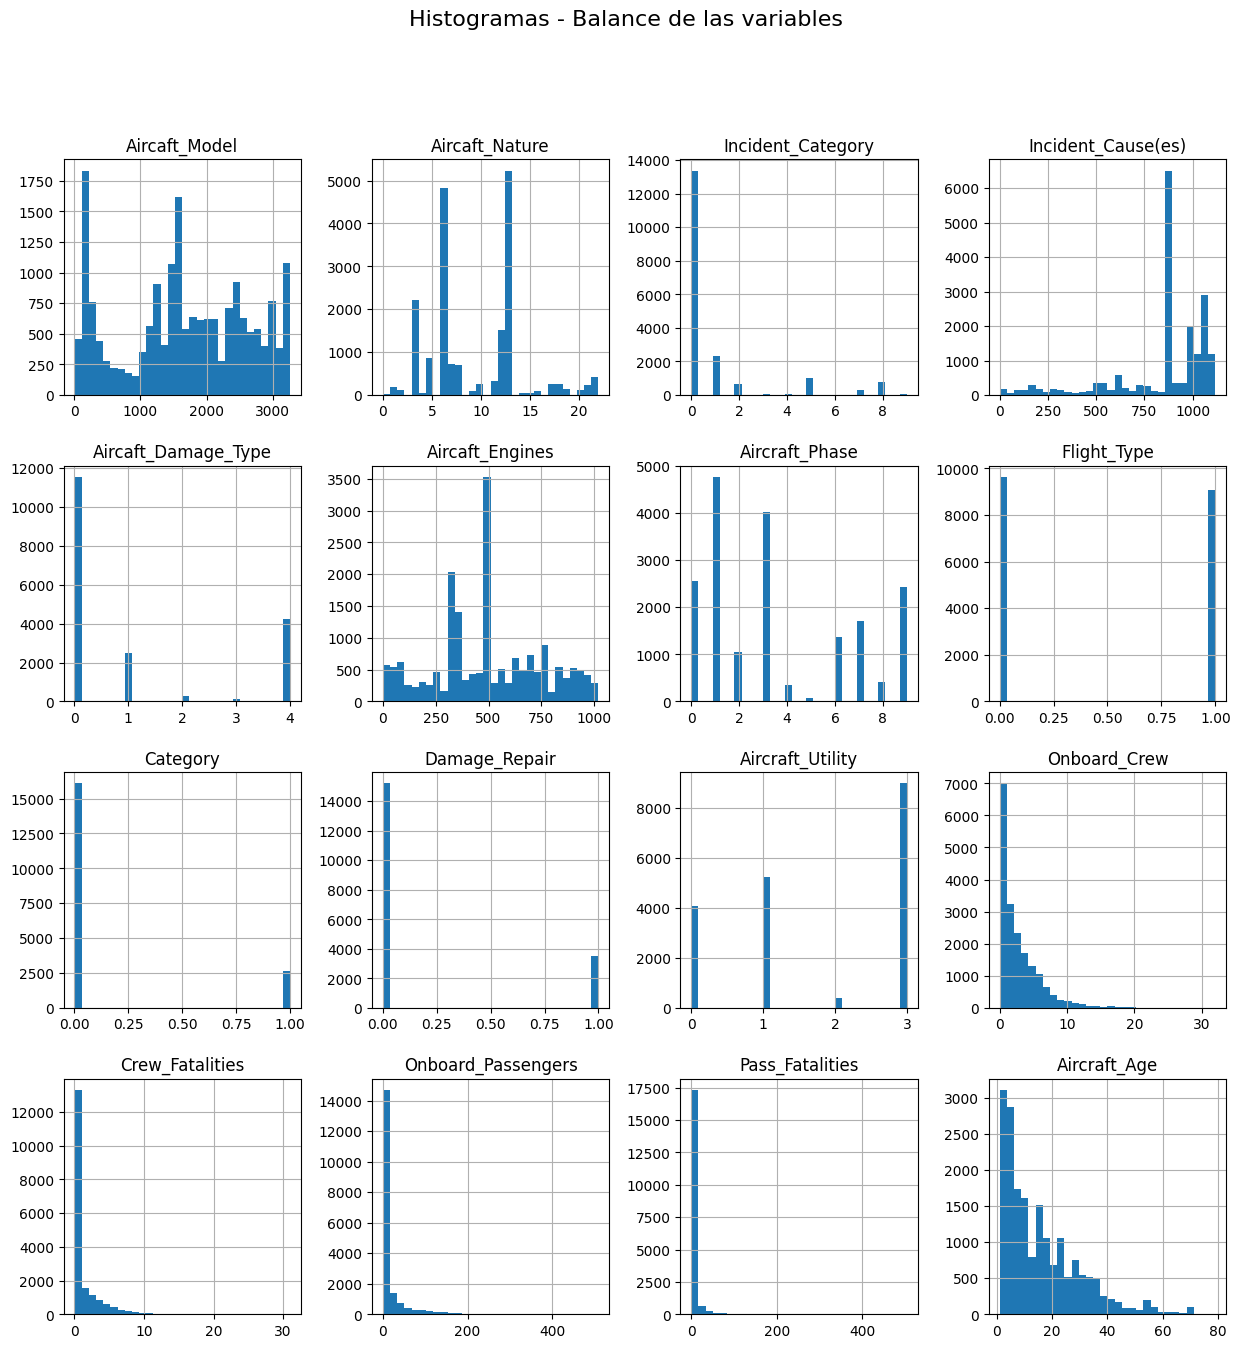

In [24]:
# Comprobamos el balance de las variables

var_fulldf.hist(bins = 30, figsize=(15, 15))

plt.suptitle('Histogramas - Balance de las variables', fontsize=16)

Notamos que hay variables con sesgo hacia la derecha, por lo cual aplicaremos Standard Scaler para generar una mejor distribución de las mismas con el fin de optimizar el funcionamiento de los algoritmos, sus métricas resultantes y lograr mejor estabilidad.\
Importamos 'numpy.ma.core.ptp' para calcular el rango (de pico a pico) de los elementos a lo largo de los ejes de las varaibles elegidas.

In [12]:
pt = PowerTransformer(method ='yeo-johnson')
col_to_scale = ['Incident_Category', 'Onboard_Crew', 'Crew_Fatalities',
                'Onboard_Passengers', 'Pass_Fatalities', 'Aircraft_Age']
var_fulldf[col_to_scale] = pt.fit_transform(var_fulldf[col_to_scale])

var_fulldf.head(10)

Aircaft_Model  Aircaft_Nature  Incident_Category  \
Aircaft_Registration                                                     
ZS-NRJ                         1088               5           1.296859   
HR-AYY                         1072               6           1.296859   
EP-CAP                          685               6           1.296859   
RA-64032                       3042               3          -0.626179   
NaN                             269              10           1.625172   
N760JB                           74               6           1.296859   
C-GEAS                          296              13           1.296859   
5H-TAZ                         1255               6           1.296859   
SP-402                          150              13           1.296859   
RA-33599                        162               3          -0.626179   

                      Incident_Cause(es)  Aircaft_Damage_Type  \
Aircaft_Registration                                            
ZS-NRJ                               231                    4   
HR-AYY                               526                    4   
EP-CAP                               526                    4   
RA-64032                             578                    1   
NaN                                 1005                    0   
N760JB                               934                    4   
C-GEAS                              1077                    4   
5H-TAZ                               872                    4   
SP-402                               872                    4   
RA-33599                             872                    1   

                      Aircaft_Engines  Aircraft_Phase  Flight_Type  Category  \
Aircaft_Registration                                                           
ZS-NRJ                            192               3            0         0   
HR-AYY                            171               3            0         0   
EP-CAP                             71               3            0         0   
RA-64032                          627               6            1         0   
NaN                               352               6            1         1   
N760JB                            301               7            1         0   
C-GEAS                            359               3            1         0   
5H-TAZ                             19               9            0         0   
SP-402                            311               3            0         0   
RA-33599                          311               2            0         0   

                      Damage_Repair  Aircraft_Utility  Onboard_Crew  \
Aircaft_Registration                                                  
ZS-NRJ                            1                 3      0.418927   
HR-AYY                            1                 3     -1.275864   
EP-CAP                            1                 3     -1.275864   
RA-64032                          0                 0      1.409590   
NaN                               0                 2     -1.275864   
N760JB                            1                 3     -1.275864   
C-GEAS                            1                 1     -1.275864   
5H-TAZ                            1                 3     -1.275864   
SP-402                            1                 1      0.914325   
RA-33599                          0                 0      0.067355   

                      Crew_Fatalities  Onboard_Passengers  Pass_Fatalities  \
Aircaft_Registration                                                         
ZS-NRJ                      -0.718658            0.626959        -0.531393   
HR-AYY                      -0.718658           -0.849111        -0.531393   
EP-CAP                      -0.718658           -0.849111        -0.531393   
RA-64032                    -0.718658           -0.849111        -0.531393   
NaN                         -0.718658           -0.849111        -0.53

Text(0.5, 0.98, 'Histogramas - Balance de las variables')

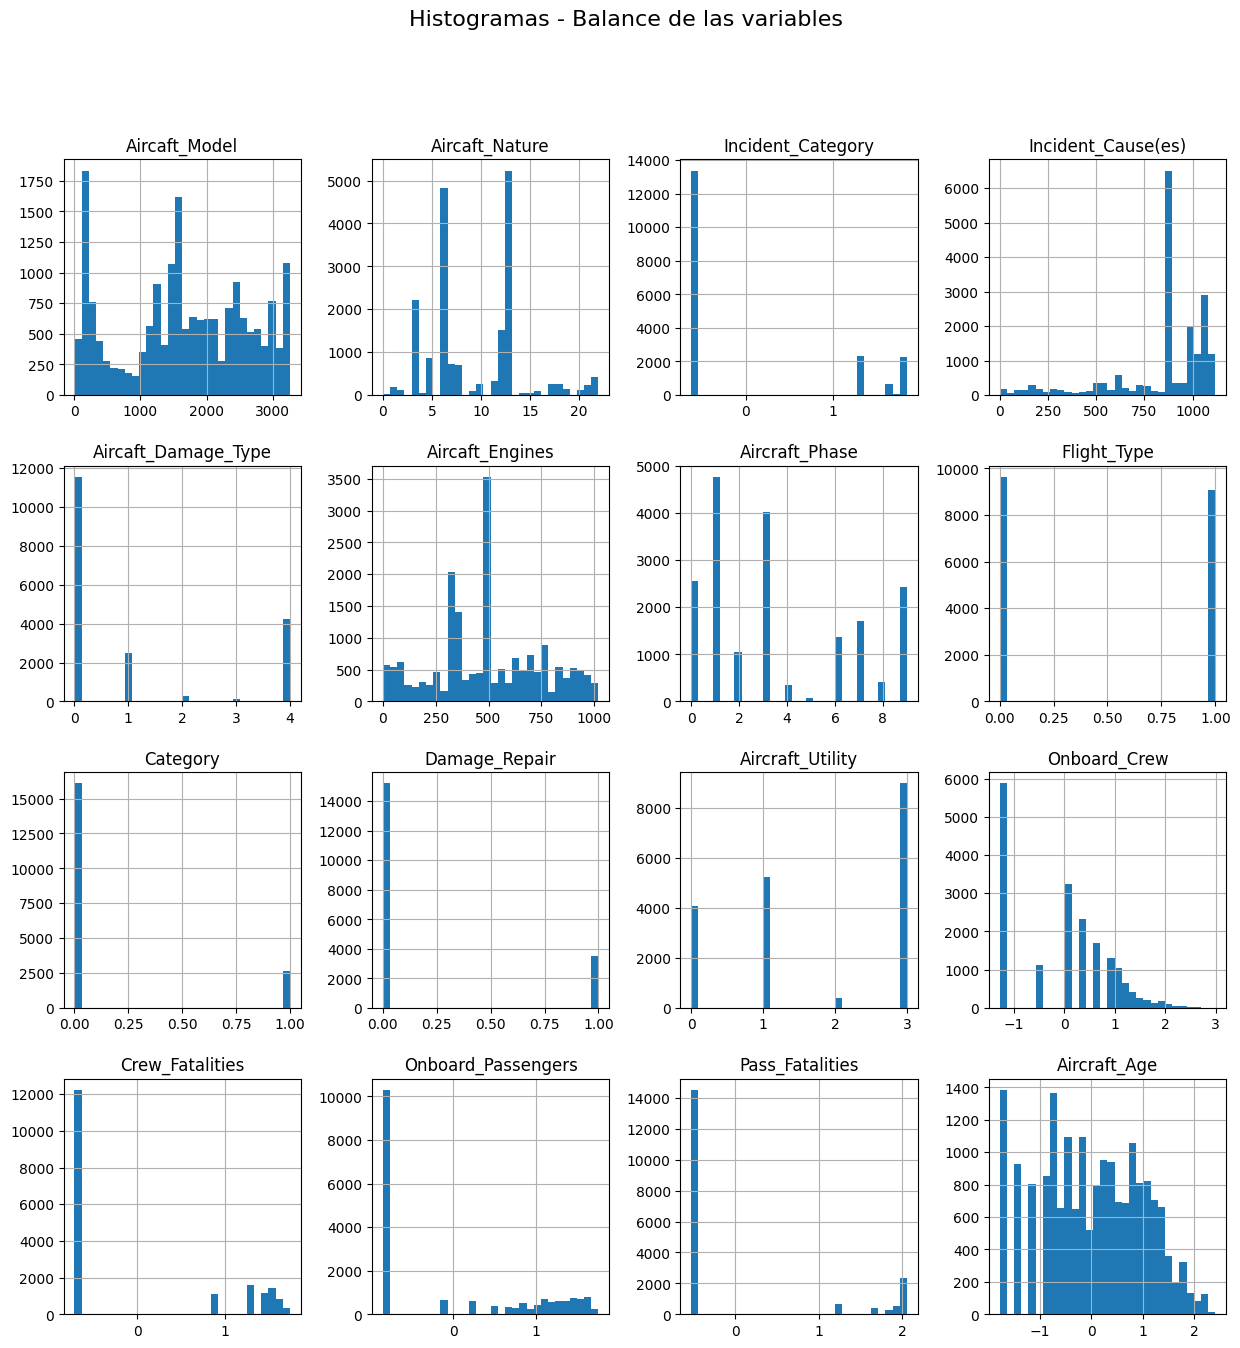

In [26]:
# Comprobamos nuevamente los balances, notamos una mejoría

var_fulldf.hist(bins = 30, figsize=(15,15))

plt.suptitle('Histogramas - Balance de las variables', fontsize=16)

A partir del Análisis de Componentes Principales (PCA) podremos observar que componentes del dataset explican la mayor parte de la varianza en el mismo, a partir de lo cual estudiaremos si es conveniente reducir la dimensionalidad del mismo.

In [13]:
# Creamos el Pipeline

pca_pipe = make_pipeline(PCA())
pca_pipe.fit(var_fulldf)

modelo_pca = pca_pipe.named_steps['pca']

In [14]:
# Observamos los compomentes

modelo_pca.components_

array([[-9.98852659e-01, -1.24334699e-04,  6.88948803e-05,
        -9.43353646e-04,  1.72024275e-04, -4.78788864e-02,
         1.43937507e-04, -3.80439082e-06,  9.61346682e-06,
         3.79593669e-05, -5.63417206e-05, -1.60278527e-05,
        -7.41671815e-05, -1.09766616e-05, -6.08709330e-05,
         4.85369991e-05],
       [-4.60329536e-02,  1.04286563e-03, -4.53459403e-04,
        -2.56706659e-01, -1.19973913e-03,  9.65390229e-01,
        -4.92462157e-04,  1.54798059e-04, -7.89959603e-05,
        -2.35946165e-04, -5.42671096e-04,  7.94711648e-04,
         5.17450609e-04,  3.71101448e-05,  2.99428948e-04,
        -1.35183536e-04],
       [ 1.32015760e-02, -6.00836989e-04, -4.09275410e-04,
        -9.66488375e-01,  2.96925998e-04, -2.56368802e-01,
        -3.80954378e-04,  5.14627467e-05, -3.15099045e-04,
         7.87569442e-06, -1.01291469e-04,  1.29695174e-04,
         8.76694046e-05,  1.94198506e-04,  1.10704410e-04,
         1.67613665e-04],
       [-5.02302799e-05,  9.83489964e

In [15]:
# Transformamos el Array en un Dataframe

pd.DataFrame(
    data    = modelo_pca.components_,
    columns = var_fulldf.columns,
)

Aircaft_Model  Aircaft_Nature  Incident_Category  Incident_Cause(es)  \
0       -0.998853       -0.000124           0.000069           -0.000943   
1       -0.046033        0.001043          -0.000453           -0.256707   
2        0.013202       -0.000601          -0.000409           -0.966488   
3       -0.000050        0.983490          -0.011063           -0.000399   
4        0.000150       -0.165086           0.068439           -0.000568   
5        0.000105        0.064766           0.365502           -0.000331   
6       -0.000075        0.022213          -0.084078            0.000100   
7        0.000085        0.009238          -0.145653            0.000478   
8       -0.000002        0.024036          -0.072901            0.000068   
9       -0.000017        0.008182           0.474780           -0.000293   
10       0.000026       -0.000693           0.696684           -0.000258   
11       0.000027        0.004385           0.090005            0.000040   
12      -0.000002       -0.007283          -0.005491           -0.000096   
13       0.000003       -0.000533          -0.019664           -0.000009   
14      -0.000001       -0.000952           0.135933            0.000138   
15      -0.000005       -0.000817           0.300372            0.000075   

    Aircaft_Damage_Type  Aircaft_Engines  Aircraft_Phase  Flight_Type  \
0              0.000172        -0.047879        0.000144    -0.000004   
1             -0.001200         0.965390       -0.000492     0.000155   
2              0.000297        -0.256369       -0.000381     0.000051   
3             -0.052128        -0.001142        0.154710    -0.010970   
4             -0.006788         0.000757        0.947723    -0.005097   
5              0.812221         0.001346       -0.030907     0.042659   
6             -0.104551        -0.000265        0.226925     0.013012   
7              0.351167        -0.000382        0.156250    -0.015486   
8             -0.147599         0.000139       -0.010676     0.004769   
9              0.028358         0.000159        0.010689    -0.024369   
10            -0.396533        -0.000548       -0.014613    -0.007065   
11            -0.040072         0.000087       -0.019712    -0.039882   
12             0.032575         0.000212       -0.006642    -0.996636   
13            -0.006148        -0.000219       -0.000386    -0.044745   
14            -0.129858         0.000044       -0.006502    -0.007829   
15             0.062349         0.000006       -0.010232    -0.004612   

    Category  Damage_Repair  Aircraft_Utility  Onboard_Crew  Crew_Fatalities  \
0   0.000010       0.000038         -0.000056     -0.000016        -0.000074   
1  -0.000079      -0.000236         -0.000543      0.000795         0.000517   
2  -0.000315       0.000008         -0.000101      0.000130         0.000088   
3  -0.003196      -0.009374         -0.036744     -0.030077        -0.016453   
4   0.011742       0.005188         -0.038485     -0.137683        -0.141831   
5   0.061469       0.172728          0.282030      0.033689        -0.226499   
6  -0.022426      -0.020610          0.579508      0.287369         0.220838   
7  -0.082578       0.021135         -0.558829      0.492548         0.397917   
8  -0.004078      -0.048636          0.247786     -0.057102        -0.110889   
9   0.174706       0.041896          0.000051     -0.412913         0.471052   
10  0.225639       0.075769         -0.117507      0.450087        -0.030326   
11  0.009528       0.008586         -0.416388     -0.229676        -0.557862   
12  0.004730       0.004065          0.041254     -0.006778         0.017084   
13  0.026744      -0.018030          0.136608      0.473577        -0.417673   
14 -0.750591       0.629914          0.019201     -0.017099         0.011366   
15 -0.585735      -0.749740          0.013840      0.010864        -0.004061   

    Onboard_Passengers  Pass_Fatalities  Aircraft_Age  
0            -0.000011        -0.000061      0.00004

In [16]:
# Revisamos la cantidad de componentes

print('Cantidad de componentes PCA:', modelo_pca.n_components_)

Cantidad de componentes PCA: 16


Creamos gráficos para visualizar la varianza explicada por cada componente.

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[8.82306663e-01 5.92226218e-02 5.84298657e-02 2.23919672e-05
 9.16988740e-06 3.22050721e-06 2.08942356e-06 1.13238595e-06
 8.82955700e-07 6.75013094e-07 5.08650544e-07 3.53652550e-07
 2.26661273e-07 1.20873788e-07 5.68925226e-08 2.04871411e-08]


Text(0, 0.5, 'Por. varianza explicada')

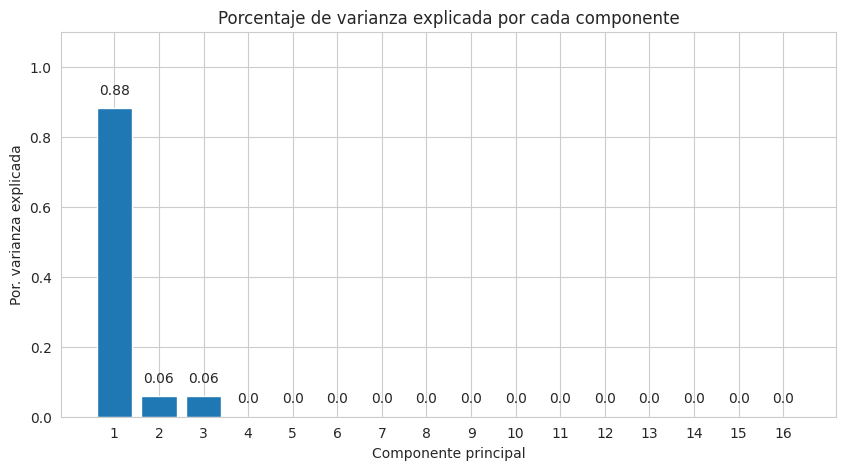

In [17]:
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

sns.set_style("whitegrid")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(var_fulldf.columns)) + 1,
                modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada')

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.88230666 0.94152928 0.99995915 0.99998154 0.99999071 0.99999393
 0.99999602 0.99999715 0.99999804 0.99999871 0.99999922 0.99999958
 0.9999998  0.99999992 0.99999998 1.        ]


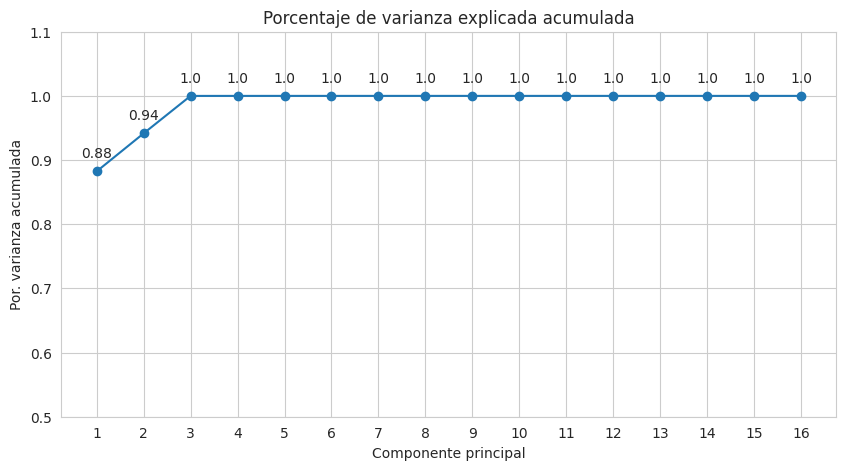

In [18]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()

print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.plot(
    np.arange(len(var_fulldf.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(var_fulldf.columns)) + 1,
                prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0.5, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Después del análisis PCA podemos observar que con los primeros 3 componentes podemos explicar mas del 90% de la varianza, aun así no se considera suficiente para realizar una reducción de la dimensionalidad del mismo y decidimos probar performando con los datos X originales.\
Procedemos a la reconstrucción de los valores.

In [19]:
recostruccion = pca_pipe.inverse_transform(var_fulldf)
recostruccion = pd.DataFrame(recostruccion,
                             columns = var_fulldf.columns,
                             index = var_fulldf.index)

print('------------------')
print('Valores originales')
print('------------------')
display(recostruccion.head(10))

print('---------------------')
print('Valores reconstruidos')
print('---------------------')
display(var_fulldf.head(10))

------------------
Valores originales
------------------


Aircaft_Model  Aircaft_Nature  Incident_Category  \
Aircaft_Registration                                                     
ZS-NRJ                   574.615632      248.272791          70.529199   
HR-AYY                   590.534176      537.038301          59.583079   
EP-CAP                   977.079700      530.609995          22.926802   
RA-64032               -1377.048350      618.043763         222.663594   
NaN                     1392.427186     1020.709615         118.348189   
N760JB                  1587.382023      946.944950         101.689899   
C-GEAS                  1365.313627     1091.231913         120.550695   
5H-TAZ                   407.710422      867.592677          -0.593342   
SP-402                  1511.151381      886.526871         104.988438   
RA-33599                1499.599668      886.962820         104.256563   

                      Incident_Cause(es)  Aircaft_Damage_Type  \
Aircaft_Registration                                            
ZS-NRJ                        845.117594           143.765166   
HR-AYY                        844.765280           111.428234   
EP-CAP                        845.163463            30.123124   
RA-64032                      845.367401           480.496913   
NaN                           843.931335           233.588546   
N760JB                        845.501784           195.438435   
C-GEAS                        843.419368           236.393851   
5H-TAZ                        844.505553           -30.723868   
SP-402                        843.654191           207.497494   
RA-33599                      848.070630           208.239190   

                      Aircaft_Engines  Aircraft_Phase  Flight_Type   Category  \
Aircaft_Registration                                                            
ZS-NRJ                     444.668111       37.913041     6.782536  11.890047   
HR-AYY                     446.034484       84.228700     2.782488   9.370092   
EP-CAP                     464.428963       87.266402    -1.480709   3.374252   
RA-64032                   349.862776       76.447519    21.637172  36.680863   
NaN                        487.951487      149.666363     5.334595  18.586279   
N760JB                     493.525144      144.264493     3.897880  16.545936   
C-GEAS                     489.570668      163.735621     4.761224  18.731263   
5H-TAZ                     436.671149      143.854353    -7.415413  -0.626220   
SP-402                     496.730710      133.302419     4.822702  17.724630   
RA-33599                   486.994388      130.227167     2.986722  16.082911   

                      Damage_Repair  Aircraft_Utility  Onboard_Crew  \
Aircaft_Registration                                                  
ZS-NRJ                    30.377525         48.477818      0.981282   
HR-AYY                    23.701011         32.225529     -8.903242   
EP-CAP                     6.611691          4.040661    -12.268823   
RA-64032                 102.311531        159.330487      5.066246   
NaN                       50.510213         67.409036    -15.389276   
N760JB                    43.090080         55.697444    -15.149331   
C-GEAS                    50.984931         64.714764    -19.533521   
5H-TAZ                    -5.164335        -19.903610    -22.720075   
SP-402                    46.036346         58.574568    -15.179170   
RA-33599                  44.441648         58.458557    -15.716058   

                      Crew_Fatalities  Onboard_Passengers  Pass_Fatalities  \
Aircaft_Registration                                                         
ZS-NRJ                     -47.408857           15.551352       -30.204043   
HR-AYY                     -45.943842            1.002559       -38.003818   
EP-CAP                     -23.264211          -11.451745       -25.390357   
RA-64032                  -150.619771           58.697209       -93.762464   
NaN                        -93.681509            6.250616 

---------------------
Valores reconstruidos
---------------------


Aircaft_Model  Aircaft_Nature  Incident_Category  \
Aircaft_Registration                                                     
ZS-NRJ                         1088               5           1.296859   
HR-AYY                         1072               6           1.296859   
EP-CAP                          685               6           1.296859   
RA-64032                       3042               3          -0.626179   
NaN                             269              10           1.625172   
N760JB                           74               6           1.296859   
C-GEAS                          296              13           1.296859   
5H-TAZ                         1255               6           1.296859   
SP-402                          150              13           1.296859   
RA-33599                        162               3          -0.626179   

                      Incident_Cause(es)  Aircaft_Damage_Type  \
Aircaft_Registration                                            
ZS-NRJ                               231                    4   
HR-AYY                               526                    4   
EP-CAP                               526                    4   
RA-64032                             578                    1   
NaN                                 1005                    0   
N760JB                               934                    4   
C-GEAS                              1077                    4   
5H-TAZ                               872                    4   
SP-402                               872                    4   
RA-33599                             872                    1   

                      Aircaft_Engines  Aircraft_Phase  Flight_Type  Category  \
Aircaft_Registration                                                           
ZS-NRJ                            192               3            0         0   
HR-AYY                            171               3            0         0   
EP-CAP                             71               3            0         0   
RA-64032                          627               6            1         0   
NaN                               352               6            1         1   
N760JB                            301               7            1         0   
C-GEAS                            359               3            1         0   
5H-TAZ                             19               9            0         0   
SP-402                            311               3            0         0   
RA-33599                          311               2            0         0   

                      Damage_Repair  Aircraft_Utility  Onboard_Crew  \
Aircaft_Registration                                                  
ZS-NRJ                            1                 3      0.418927   
HR-AYY                            1                 3     -1.275864   
EP-CAP                            1                 3     -1.275864   
RA-64032                          0                 0      1.409590   
NaN                               0                 2     -1.275864   
N760JB                            1                 3     -1.275864   
C-GEAS                            1                 1     -1.275864   
5H-TAZ                            1                 3     -1.275864   
SP-402                            1                 1      0.914325   
RA-33599                          0                 0      0.067355   

                      Crew_Fatalities  Onboard_Passengers  Pass_Fatalities  \
Aircaft_Registration                                                         
ZS-NRJ                      -0.718658            0.626959        -0.531393   
HR-AYY                      -0.718658           -0.849111        -0.531393   
EP-CAP                      -0.718658           -0.849111        -0.531393   
RA-64032                    -0.718658           -0.849111        -0.531393   
NaN                         -0.718658           -0.849111        -0.53

Definimos las variables y escalamos los datos por segunda vez con Robust Scaler para eliminar Outliers.

In [24]:
X = var_fulldf
y = df['Survival_Prob']

In [26]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)


X = pd.DataFrame(X_scaled, columns=X.columns)

Exploramos las variables resultantes.

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18712 entries, 0 to 18711
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Aircaft_Model        18712 non-null  float64
 1   Aircaft_Nature       18712 non-null  float64
 2   Incident_Category    18712 non-null  float64
 3   Incident_Cause(es)   18712 non-null  float64
 4   Aircaft_Damage_Type  18712 non-null  float64
 5   Aircaft_Engines      18712 non-null  float64
 6   Aircraft_Phase       18712 non-null  float64
 7   Flight_Type          18712 non-null  float64
 8   Category             18712 non-null  float64
 9   Damage_Repair        18712 non-null  float64
 10  Aircraft_Utility     18712 non-null  float64
 11  Onboard_Crew         18712 non-null  float64
 12  Crew_Fatalities      18712 non-null  float64
 13  Onboard_Passengers   18712 non-null  float64
 14  Pass_Fatalities      18712 non-null  float64
 15  Aircraft_Age         18712 non-null 

In [28]:
X.head(10)

Aircaft_Model  Aircaft_Nature  Incident_Category  Incident_Cause(es)  \
0      -0.374156       -0.428571           1.000000           -4.108974   
1      -0.385242       -0.285714           1.000000           -2.217949   
2      -0.653386       -0.285714           1.000000           -2.217949   
3       0.979733       -0.714286           0.000000           -1.884615   
4      -0.941625        0.285714           1.170726            0.852564   
5      -1.076737       -0.285714           1.000000            0.397436   
6      -0.922917        0.714286           1.000000            1.314103   
7      -0.258444       -0.285714           1.000000            0.000000   
8      -1.024078        0.714286           1.000000            0.000000   
9      -1.015763       -0.714286           0.000000            0.000000   

   Aircaft_Damage_Type  Aircaft_Engines  Aircraft_Phase  Flight_Type  \
0                  2.0        -0.796196             0.0          0.0   
1                  2.0        -0.853261             0.0          0.0   
2                  2.0        -1.125000             0.0          0.0   
3                  0.5         0.385870             0.6          1.0   
4                  0.0        -0.361413             0.6          1.0   
5                  2.0        -0.500000             0.8          1.0   
6                  2.0        -0.342391             0.0          1.0   
7                  2.0        -1.266304             1.2          0.0   
8                  2.0        -0.472826             0.0          0.0   
9                  0.5        -0.472826            -0.2          0.0   

   Category  Damage_Repair  Aircraft_Utility  Onboard_Crew  Crew_Fatalities  \
0       0.0            1.0               0.5      0.178695              0.0   
1       0.0            1.0               0.5     -0.682722              0.0   
2       0.0            1.0               0.5     -0.682722              0.0   
3       0.0            0.0              -1.0      0.682223              0.0   
4       1.0            0.0               0.0     -0.682722              0.0   
5       0.0            1.0               0.5     -0.682722              0.0   
6       0.0            1.0              -0.5     -0.682722              0.0   
7       0.0            1.0               0.5     -0.682722              0.0   
8       0.0            1.0              -0.5      0.430493              0.0   
9       0.0            0.0              -1.0      0.000000              1.0   

   Onboard_Passengers  Pass_Fatalities  Aircraft_Age  
0            0.760187              0.0      0.591638  
1            0.000000              0.0      0.846248  
2            0.000000              0.0      0.675236  
3            0.000000              0.0      0.361979  
4            0.000000              0.0      0.591638  
5            0.000000              0.0      0.105364  
6            0.000000              0.0      0.727209  
7            0.000000              0.0      0.199347  
8            0.891865              0.0     -0.532624  
9            0.000000              0.0      0.776558

In [30]:
y.head(10)

Aircaft_Registration
ZS-NRJ      1
HR-AYY      1
EP-CAP      1
RA-64032    1
NaN         0
N760JB      0
C-GEAS      1
5H-TAZ      0
SP-402      1
RA-33599    0
Name: Survival_Prob, dtype: int64

Guardamos los datos preprocesados 'X' e 'y' en un archivo 'pickle' (pkl) para luego importarlos en sesiones futuras y evitar volver a ejecutar los procesos de modelado.\
Utilizamos la biblioteca 'joblib' para salvar la información e importamos 'files' de google.colab para descargar en la PC.

In [31]:
# Guardamos los datos (Google Colab)
joblib.dump(X, 'X.pkl')
joblib.dump(y, 'y.pkl')

# Descargamos los archivos
files.download('X.pkl')
files.download('y.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **[MACHINE LEARNING](#scrollTo=FNLamiM5YI3E)**

Iniciamos la fase de aprendizaje automático, modelados de algoritmos, evaluación y validación de los mismos, donde se buscará probar distintos modelos y encontrar el que mejor parámetros devuelva.\
Implementaremos en los códigos de los modelos, el comando **%%time** para medir los tiempos de ejecución.\
Comenzamos separamos el entrenamiento y testeo de todas las variables elegidas y asignadas en Feature Selection.\
Dejamos incrustrado el código para cargar los datos X, y en caso de ser necesario para sesiones posteriores (para ello se deberán llevar los archivos previamente descargados a la sección 'Archivos' de Google Colab).

In [3]:
X = joblib.load('X.pkl')
y = joblib.load('y.pkl')

También se podrían cargar directamente desde su ubicación en la PC con el siguiente comando:

uploaded = files.upload()

data_X = 'X.pkl'
X = joblib.load(data_X)

data_y = 'X.pkl'
X = joblib.load(data_y)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.75,\
                                                    random_state = 42, shuffle=True)

### Prueba simple de modelos

Iniciamos el segmento con una ronda de pruebas simples de modelos de clasificación, obtendremos predicciones y métricas.\
Los modelos elegidos son:

- LogisticRegression
- SVC
- RandomForestClassifier

#### LogisticRegression

In [103]:
# Ejecutamos el modelo LOGISTIC REGRESION

%%time

mod_lrc = LogisticRegression()

mod_lrc.fit(X_train, y_train)

CPU times: user 84 ms, sys: 43.5 ms, total: 127 ms
Wall time: 136 ms


LogisticRegression()

In [104]:
# Obtenemos predicciones

y_pred_lrc = mod_lrc.predict(X_test)

In [105]:
# Creamos matriz de confusion

confusion_matrix(y_test, y_pred_lrc)

array([[2433,  114],
       [ 427, 1704]])

In [107]:
# Obtenemos el reporte de métricas de clasificación

test_accuracy = accuracy_score(y_test, y_pred_lrc)
test_precision = precision_score(y_test, y_pred_lrc)
rest_recall = recall_score(y_test, y_pred_lrc)
test_f1s = f1_score(y_test, y_pred_lrc)
print('% de aciertos obtenidos:',test_accuracy)
print('% de precisión obtenidos:',test_precision)
print('% de sensibilidad obtenidos:',rest_recall)
print('% de puntuación F1 obtenidos:',test_f1s)

print(metrics.classification_report(y_test, y_pred_lrc))

% de aciertos obtenidos: 0.8843522873022659
% de precisión obtenidos: 0.9372937293729373
% de sensibilidad obtenidos: 0.7996245893946504
% de puntuación F1 obtenidos: 0.8630032919726514
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2547
           1       0.94      0.80      0.86      2131

    accuracy                           0.88      4678
   macro avg       0.89      0.88      0.88      4678
weighted avg       0.89      0.88      0.88      4678



In [112]:
prec_pos = metrics.precision_score(y_test, y_pred_lrc, pos_label=1)
prec_neg = metrics.precision_score(y_test, y_pred_lrc, pos_label=0)

rec_sen = metrics.recall_score(y_test, y_pred_lrc, pos_label=1)
rec_esp = metrics.recall_score(y_test, y_pred_lrc, pos_label=0)

f1_pos = metrics.f1_score(y_test, y_pred_lrc, pos_label=1)
f1_neg = metrics.f1_score(y_test, y_pred_lrc, pos_label=0)

print(f'Precisión positiva: {prec_pos:.2f} / Precición negativa: {prec_neg:.2f}')
print(f'Recall sensibilidad: {rec_sen:.2f} / Recall especificidad: {rec_esp:.2f}')
print(f'F1 positivo: {f1_pos:.2f} / F1 negativo: {f1_neg:.2f}')

Precisión positiva: 0.94 / Precición negativa: 0.85
Recall sensibilidad: 0.80 / Recall especificidad: 0.96
F1 positivo: 0.86 / F1 negativo: 0.90


#### SVC

In [77]:
# Ejecutamos el modelo SVC

%%time

mod_svc = SVC(C=0.1, kernel='rbf', random_state=42)

mod_svc.fit(X_train, y_train)

CPU times: user 7.81 s, sys: 241 ms, total: 8.05 s
Wall time: 17.3 s


SVC(C=0.1, random_state=42)

In [78]:
# Obtenemos predicciones

y_pred_svc = mod_svc.predict(X_test)

In [79]:
# Creamos matriz de confusion

confusion_matrix(y_test, y_pred_svc)

array([[2479,   68],
       [ 469, 1662]])

<Axes: >

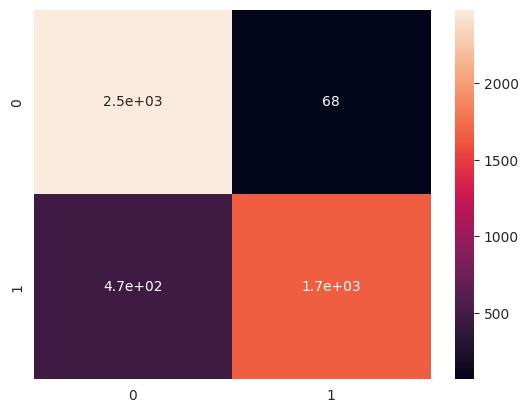

In [80]:
# Graficamos la matriz

cm_mod_svc = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm_mod_svc, annot=True)

In [81]:
# Obtenemos el reporte de métricas de clasificación

test_accuracy = accuracy_score(y_test, y_pred_svc)
test_precision = precision_score(y_test, y_pred_svc)
rest_recall = recall_score(y_test, y_pred_svc)
test_f1s = f1_score(y_test, y_pred_svc)
print('% de aciertos obtenidos:',test_accuracy)
print('% de precisión obtenidos:',test_precision)
print('% de sensibilidad obtenidos:',rest_recall)
print('% de puntuación F1 obtenidos:',test_f1s)

print(metrics.classification_report(y_test, y_pred_svc))

% de aciertos obtenidos: 0.8852073535699017
% de precisión obtenidos: 0.9606936416184971
% de sensibilidad obtenidos: 0.7799155326137963
% de puntuación F1 obtenidos: 0.8609168609168608
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2547
           1       0.96      0.78      0.86      2131

    accuracy                           0.89      4678
   macro avg       0.90      0.88      0.88      4678
weighted avg       0.90      0.89      0.88      4678



#### Randomforest

In [85]:
# Ejecutamos el modelo RANDOM FOREST

%%time

mod_rfc = RandomForestClassifier(max_depth=4, random_state=42)

mod_rfc.fit(X_train, y_train)

CPU times: user 1.24 s, sys: 4.63 ms, total: 1.24 s
Wall time: 1.36 s


RandomForestClassifier(max_depth=4, random_state=42)

In [86]:
# Obtenemos predicciones

y_pred_rfc = mod_rfc.predict(X_test)

In [88]:
# Creamos matriz de confusion

confusion_matrix(y_test, y_pred_rfc)

array([[2413,  134],
       [ 382, 1749]])

In [90]:
# Obtenemos el reporte de métricas de clasificación

test_accuracy = accuracy_score(y_test, y_pred_rfc)
test_precision = precision_score(y_test, y_pred_rfc)
rest_recall = recall_score(y_test, y_pred_rfc)
test_f1s = f1_score(y_test, y_pred_rfc)
print('% de aciertos obtenidos:',test_accuracy)
print('% de precisión obtenidos:',test_precision)
print('% de sensibilidad obtenidos:',rest_recall)
print('% de puntuación F1 obtenidos:',test_f1s)

print(metrics.classification_report(y_test, y_pred_rfc))

% de aciertos obtenidos: 0.8896964514749893
% de precisión obtenidos: 0.9288369622942113
% de sensibilidad obtenidos: 0.8207414359455655
% de puntuación F1 obtenidos: 0.8714499252615844
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2547
           1       0.93      0.82      0.87      2131

    accuracy                           0.89      4678
   macro avg       0.90      0.88      0.89      4678
weighted avg       0.89      0.89      0.89      4678



Text(0.5, 0.98, 'Random Forest Feature Importance')

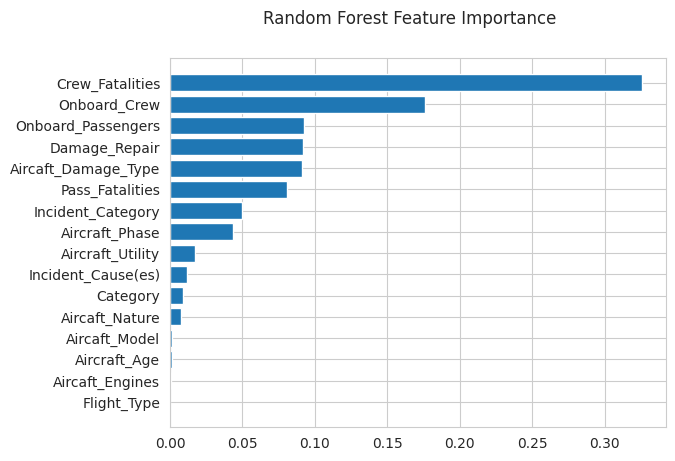

In [95]:
# vemos las columnas por orden de importancia

sorted_idx = mod_rfc.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx],
         mod_rfc.feature_importances_[sorted_idx])

plt.suptitle('Random Forest Feature Importance')

In [96]:
importance = len(mod_rfc.feature_importances_)
estimators = len(mod_rfc.estimators_)

print('Las columnas de mayor importancia son:', importance)
print('La cantidad de árboles que se utilizan son:', estimators)

Las columnas de mayor importancia son: 16
La cantidad de árboles que se utilizan son: 100


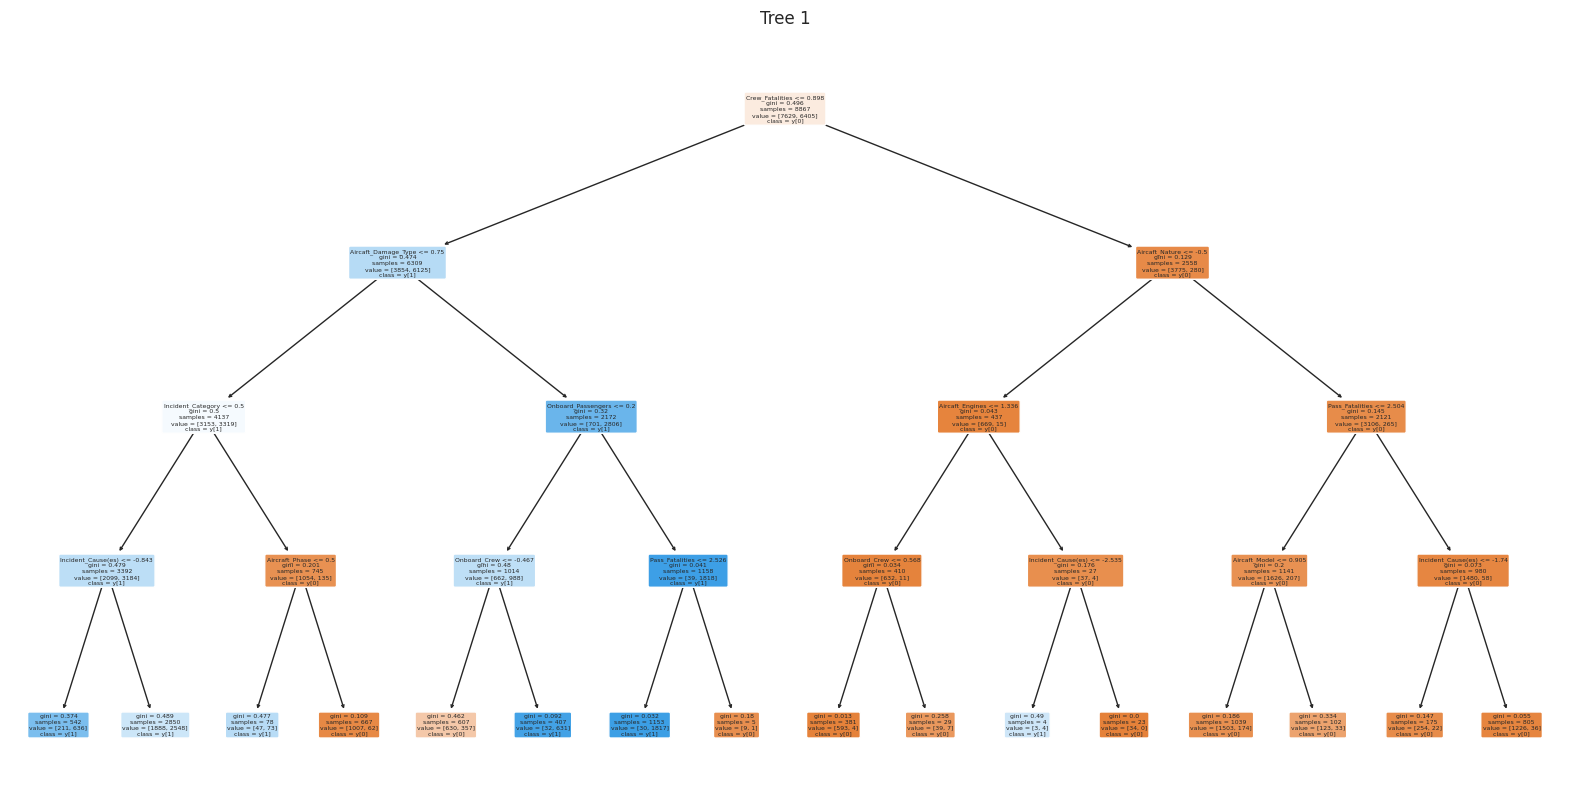

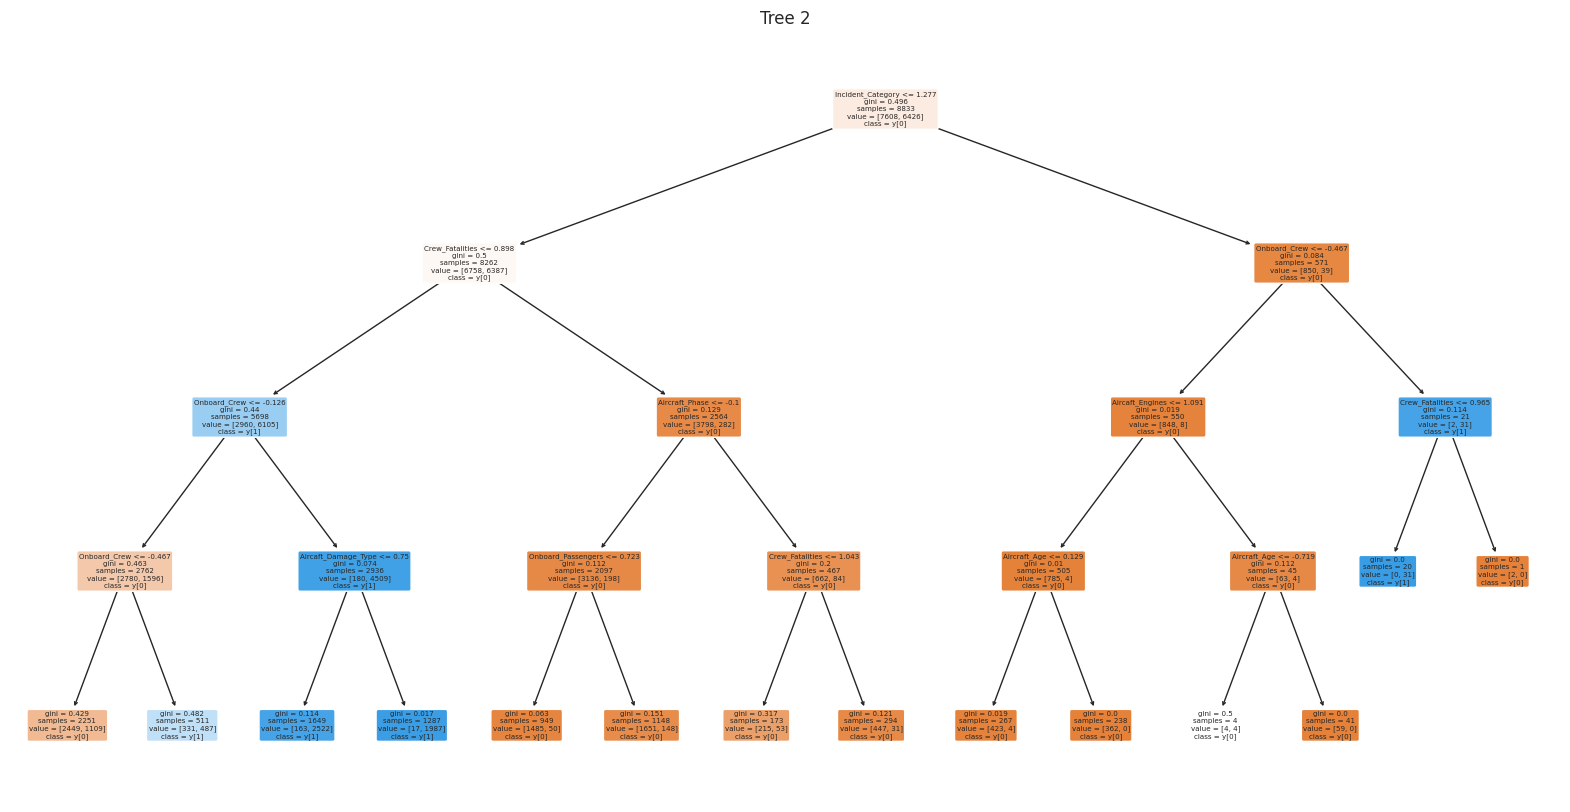

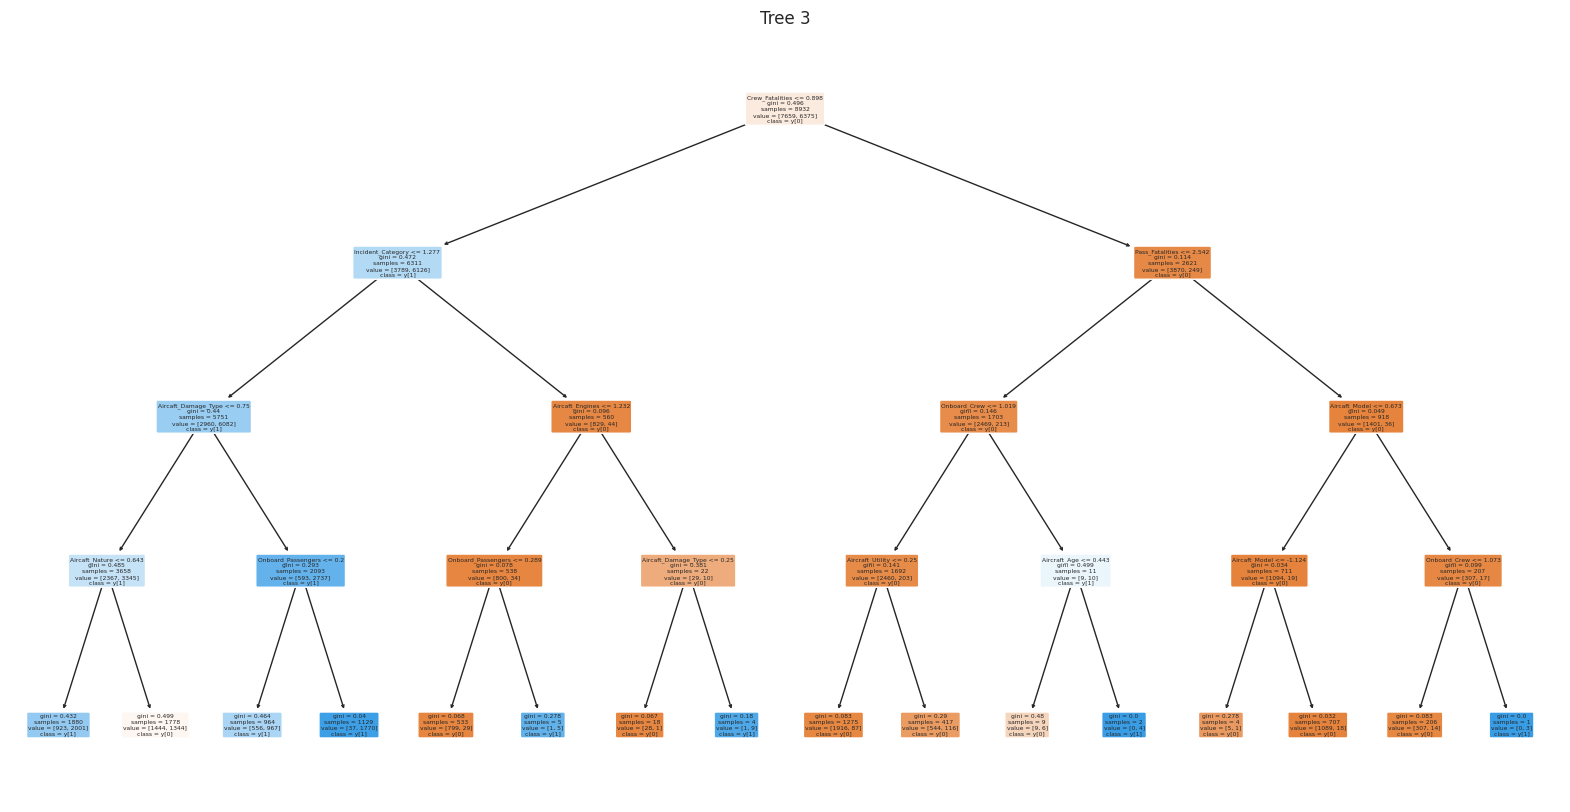

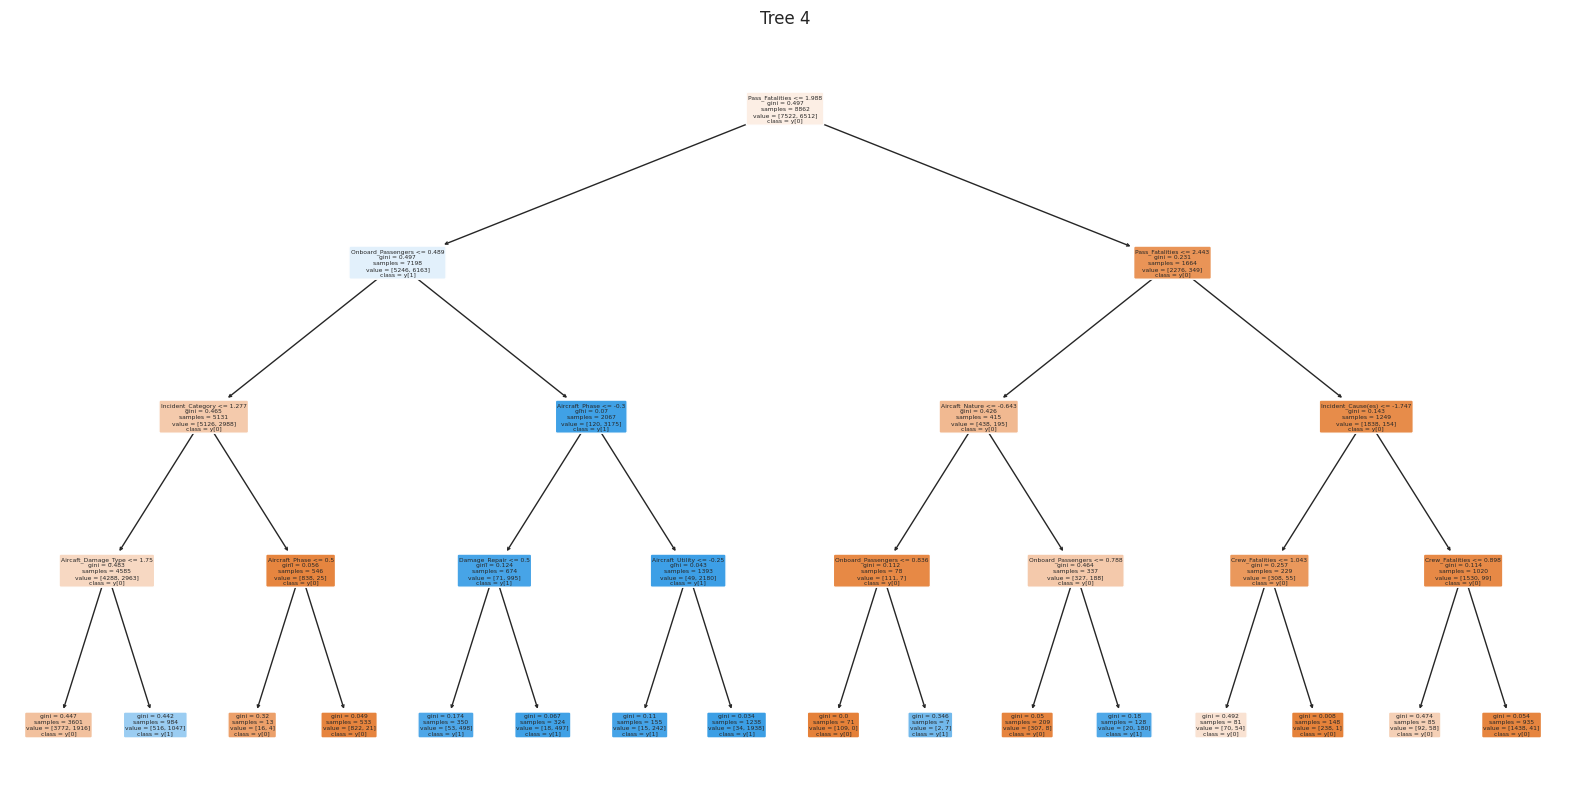

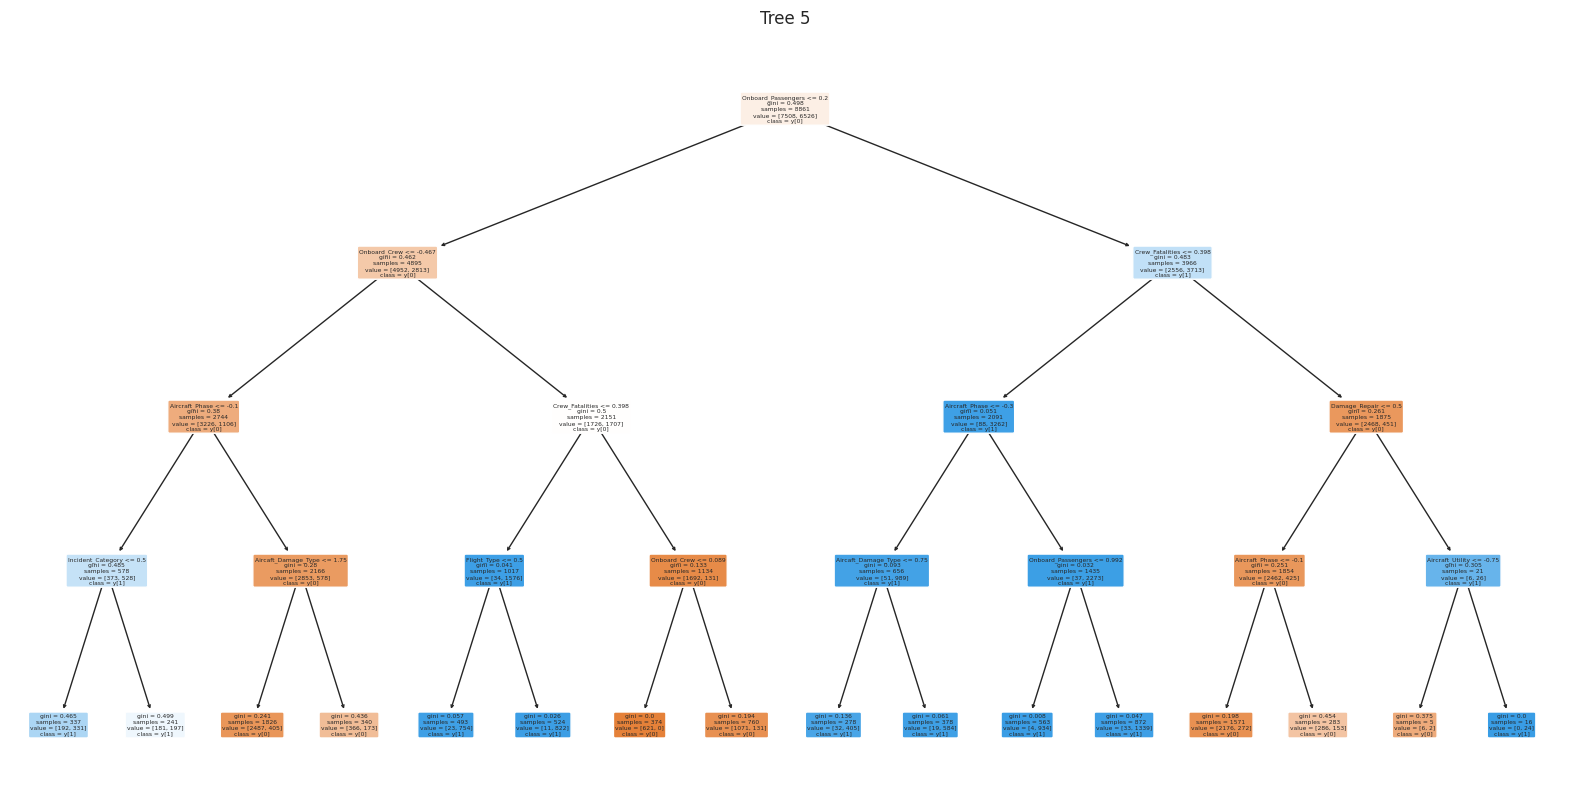

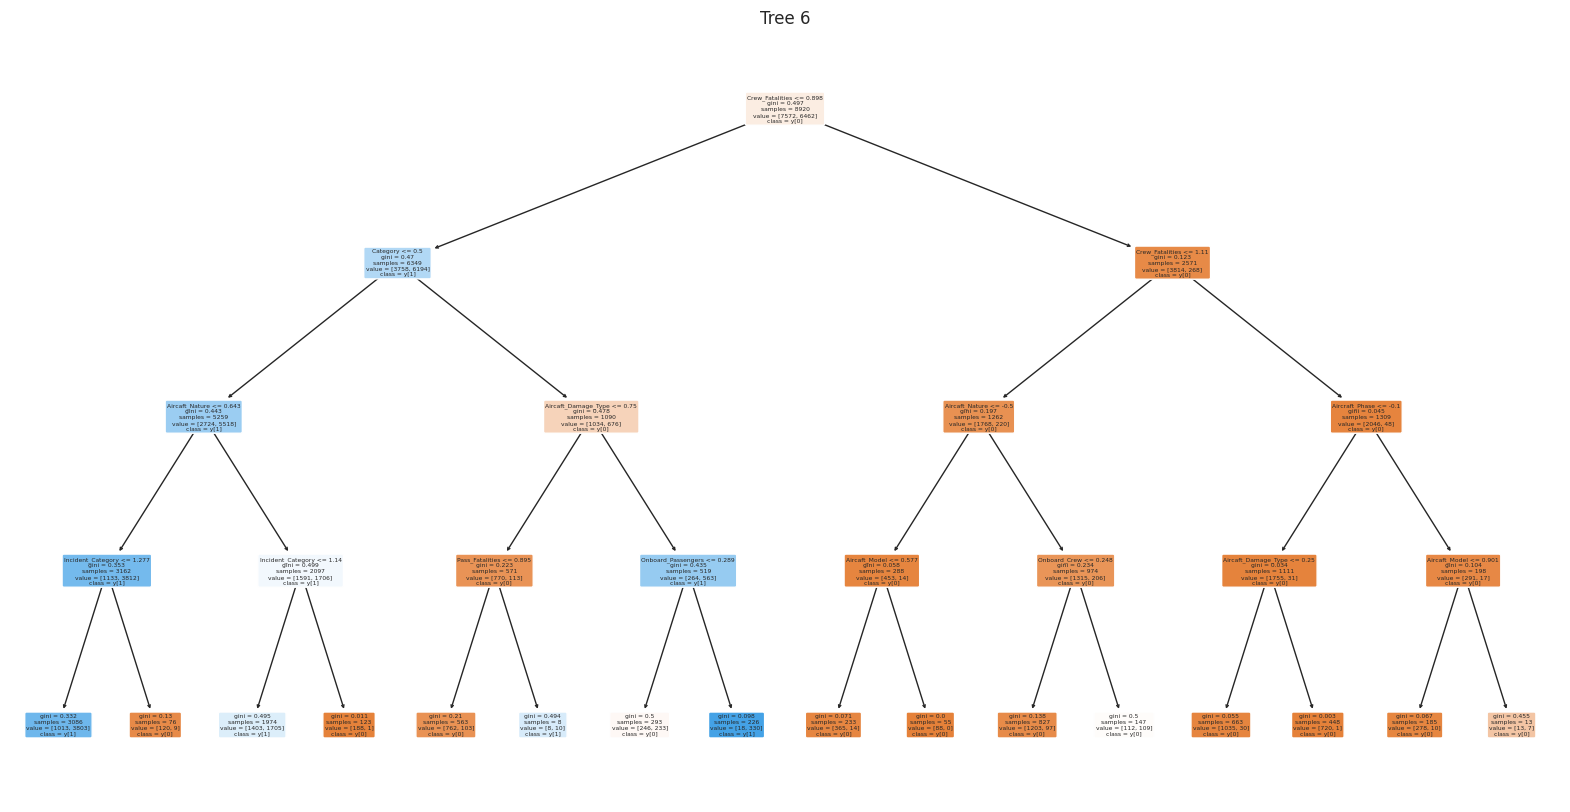

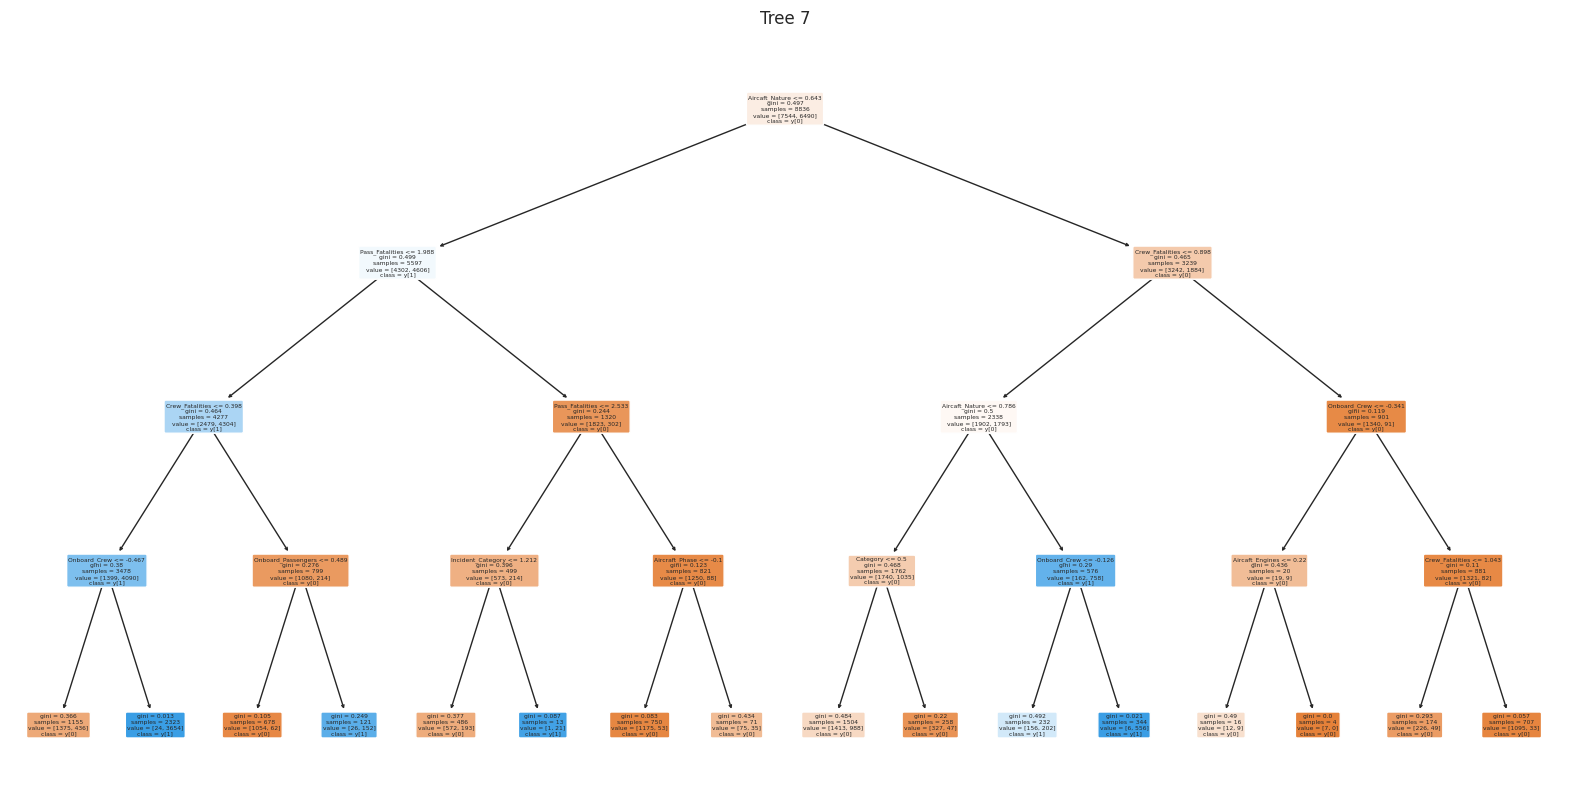

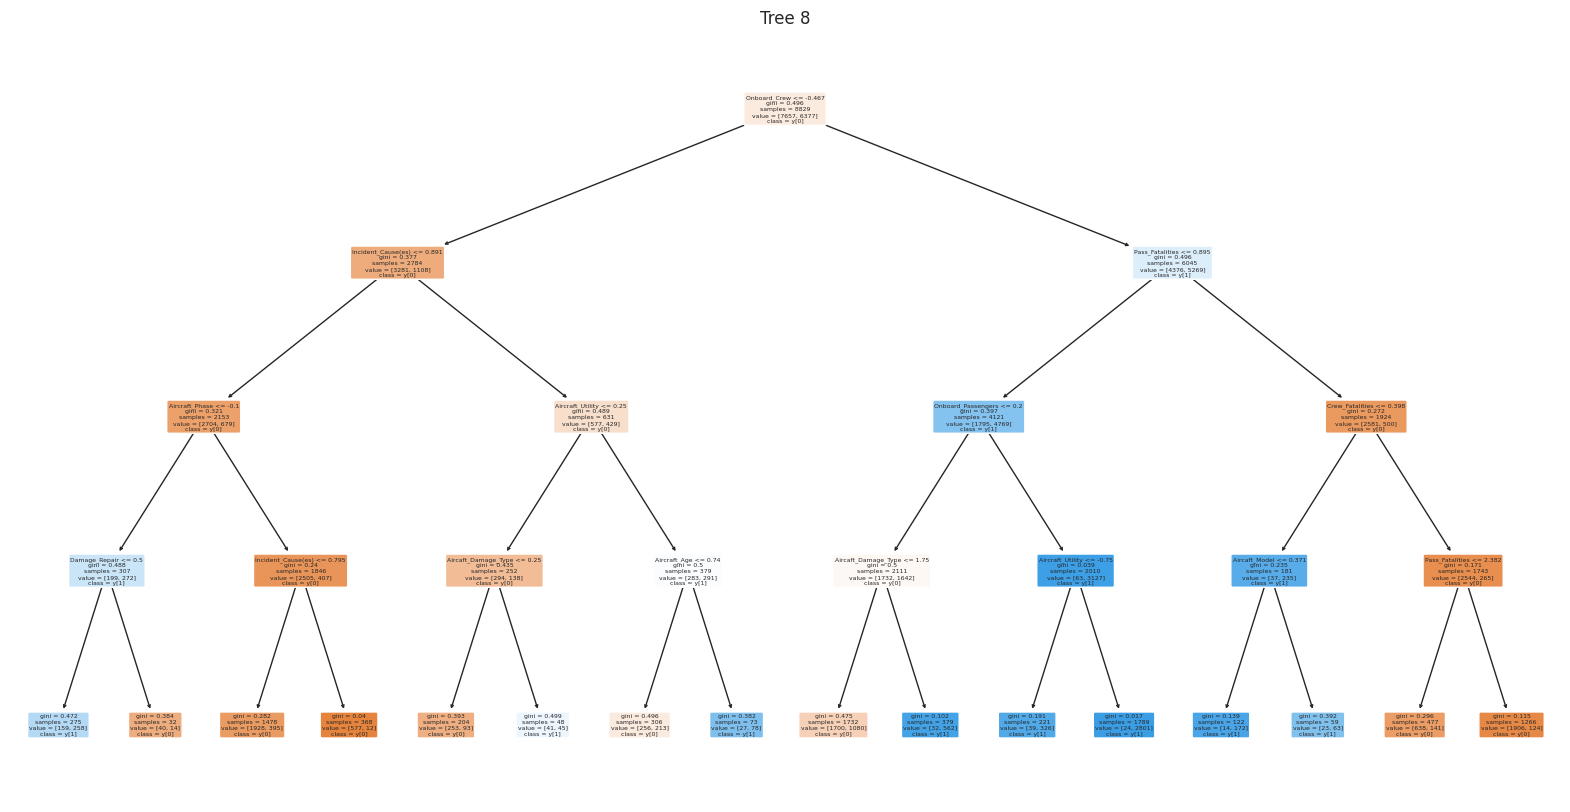

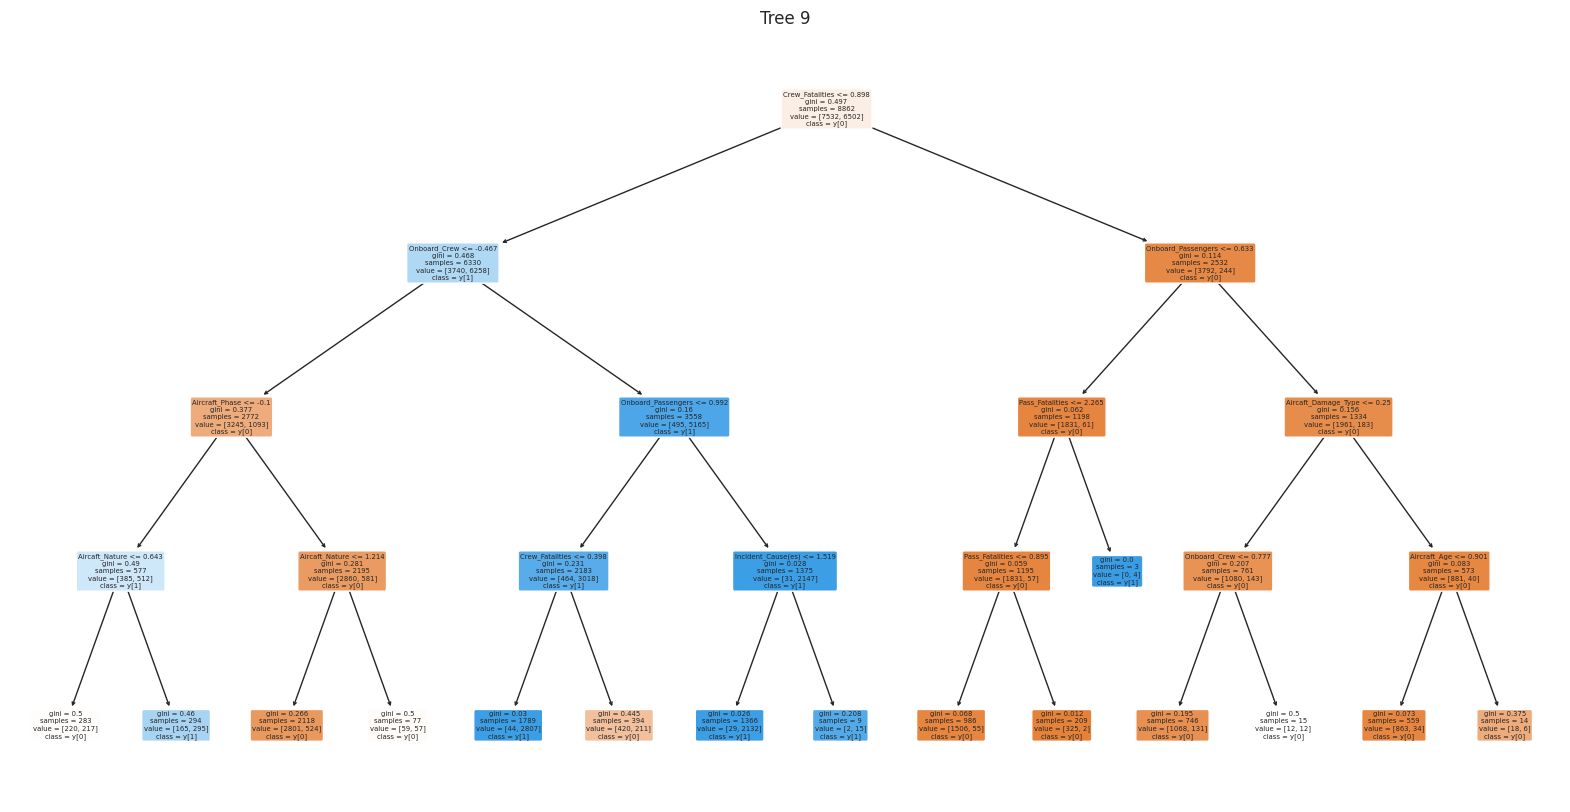

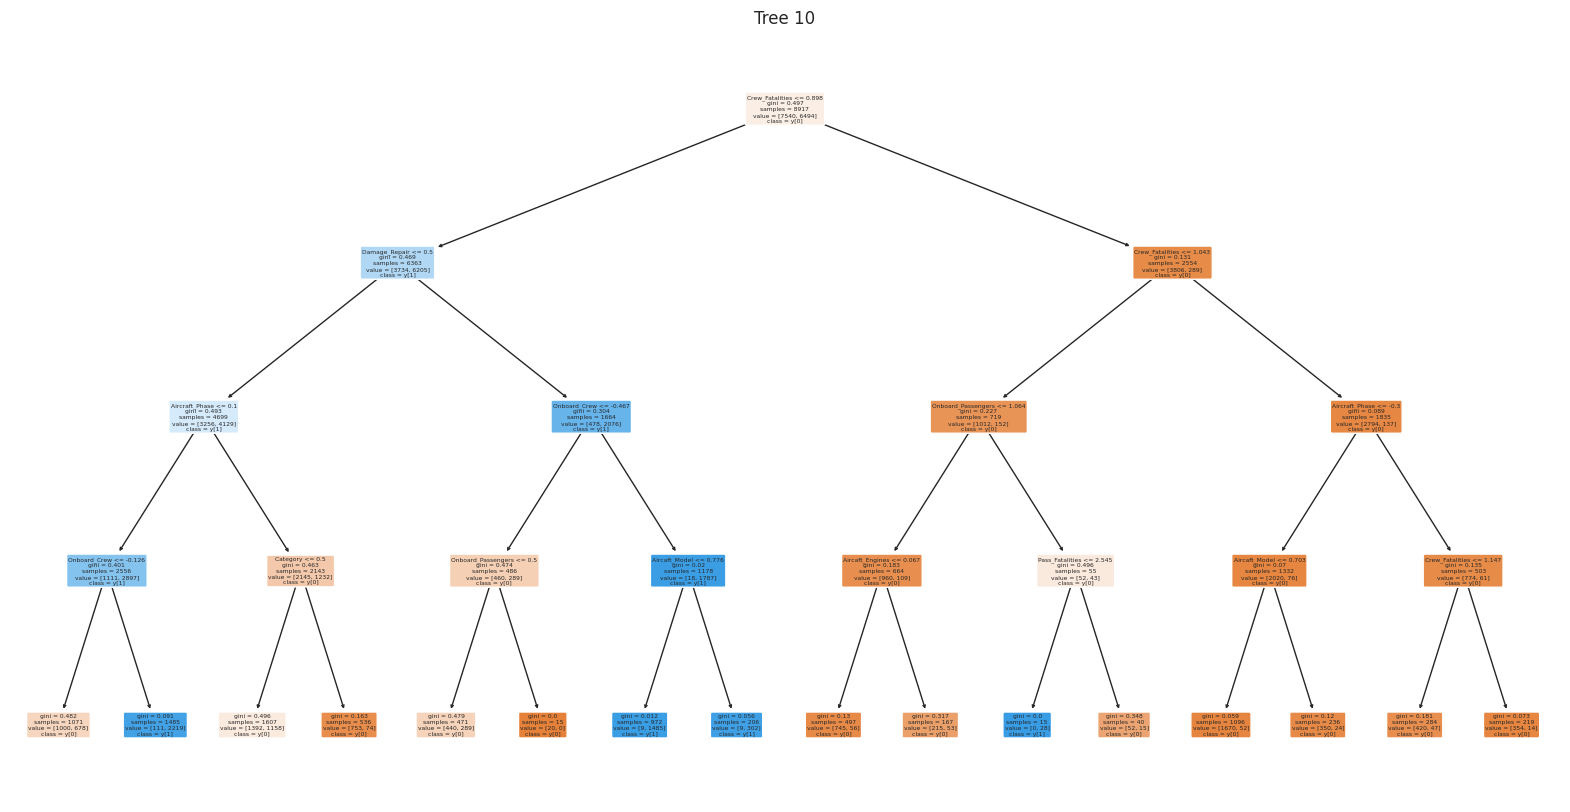

In [102]:
# Visualización de los primeros 10 árboles del random forest

num_trees_to_visualize = 10

for tree_index in range(min(num_trees_to_visualize, len(mod_rfc.estimators_))):
    plt.figure(figsize=(20, 10))
    plot_tree(mod_rfc.estimators_[tree_index], filled=True,
              feature_names = X_train.columns, class_names=True,
              rounded=True)

    plt.title(f"Tree {tree_index + 1}")

### Aumento y comparación de modelos

Compararemos 10 modelos clasificadores (los más populares según verificaciones en la web) y evaluaremos la precisión media de cada uno de ellos mediante un procedimiento de validación cruzada Kfold, estratificada con 10 pliegues.\
Los 10 modelos son:
- SVC
- Decision Tree
- AdaBoost
- Random Forest
- Extra Trees
- Gradient Boosting
- Multilayer Perceptron
- KNN
- Logistic Regression
- Linear Discriminant Analysis

In [33]:
# Creamos la instancia Kfold

kfold = StratifiedKFold(n_splits=10)

In [49]:
# Modelamos los 10 algoritmos y mediremos el tiempo de ejecución

%%time

# Anclamos random state en un sólo mismo resultado
random_state = 42

# Inicializamos la lista de clasificadores
classifiers = []

classifiers.append(SVC(random_state = random_state))
classifiers.append(DecisionTreeClassifier(random_state = random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state = random_state),
                                      random_state = random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state = random_state))
classifiers.append(ExtraTreesClassifier(random_state = random_state))
classifiers.append(GradientBoostingClassifier(random_state = random_state))
classifiers.append(MLPClassifier(random_state = random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

# Inicializamos de variables
cv_results = []

# Bucle para clasificadores
for classifier in classifiers :

    # Validación cruzada; establecemos en 4 núcleos de CPU
    cv_results.append(cross_val_score(classifier, X_train, y = y_train,
                                      scoring = 'accuracy', cv = kfold,
                                      n_jobs = 4))

# Cálculo de medias y desviaciones estándar
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

# Convertimos en dataframe
cv_res = pd.DataFrame({'CrossValMeans': cv_means, 'CrossValerrors': cv_std,
                       'Algorithm': ['SVC', 'DecisionTree', 'AdaBoost', 'RandomForest',
                                    'ExtraTrees', 'GradientBoosting',
                                    'MultipleLayerPerceptron', 'KNeighboors',
                                    'LogisticRegression', 'LinearDiscriminantAnalysis']})

# Mostramos el dataframe
cv_res

CPU times: user 3.49 s, sys: 719 ms, total: 4.21 s
Wall time: 4min 3s


CrossValMeans  CrossValerrors                   Algorithm
0       0.903948        0.007540                         SVC
1       0.909719        0.005618                DecisionTree
2       0.890124        0.008550                    AdaBoost
3       0.923472        0.008048                RandomForest
4       0.919055        0.009508                  ExtraTrees
5       0.920407        0.006842            GradientBoosting
6       0.917629        0.007545     MultipleLayerPerceptron
7       0.871670        0.005397                 KNeighboors
8       0.883142        0.006581          LogisticRegression
9       0.873237        0.005392  LinearDiscriminantAnalysis

Text(0.5, 1.0, 'Cross validation scores')

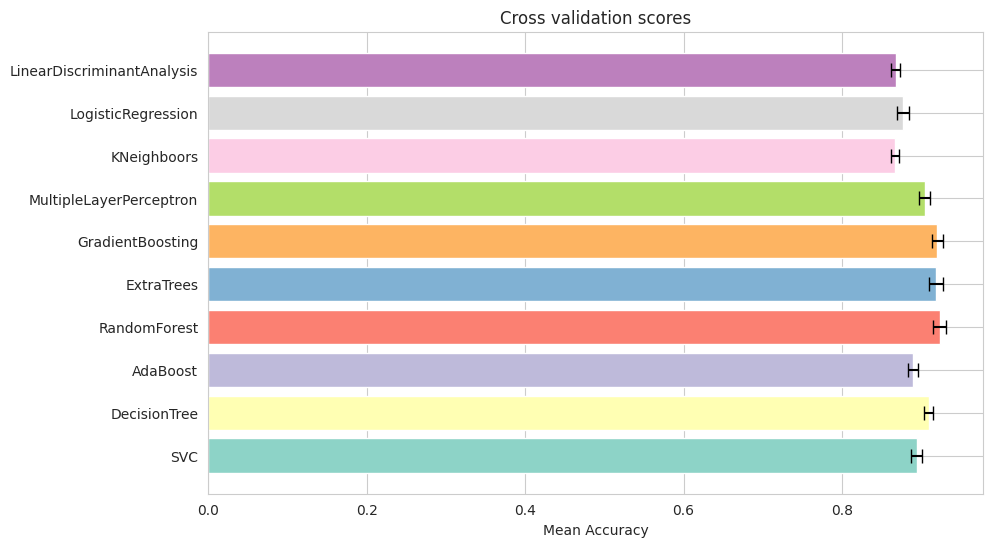

In [ ]:
# Graficamos

plt.figure(figsize = (10, 6))
bar_colors = sns.color_palette('Set3', n_colors = len(cv_res))

# Utilizamos la función bar de mpl para control de barras
bars = plt.barh(cv_res['Algorithm'], cv_res['CrossValMeans'],
                color = bar_colors)

# Agregamos las barras de error manualmente
for bar, err in zip(bars, cv_std):
    plt.errorbar(x = bar.get_width(), y = bar.get_y() + bar.get_height() / 2,
                 xerr = err, fmt = 'none', color = 'black', capsize = 5)

plt.xlabel('Mean Accuracy')
plt.title('Cross validation scores')

In [57]:
# Obtenemos métricas y errores en un dataframe

%%time

metrics_df = pd.DataFrame(columns=['Algorithm', 'Accuracy',
                                   'Precision', 'Recall',
                                   'F1_score', 'MAE',
                                   'MSE', 'RMSE',
                                   'LOG_RMSE'])

# Itera sobre los resultados de la validación cruzada
for i, classifier in enumerate(classifiers):

    # Obtenemos las predicciones utilizando validación cruzada
    y_pred = cross_val_predict(classifier, X_train, y_train, cv=kfold, n_jobs=4)

    # Calculamos las métricas
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred, average='weighted')
    recall = recall_score(y_train, y_pred, average='weighted')
    f1 = f1_score(y_train, y_pred, average='weighted')
    mae = mean_absolute_error(y_train, y_pred)
    mse = mean_squared_error(y_train, y_pred)
    rmse = np.sqrt(mse)
    log_rmse = np.log(rmse)

    # Agragamos las métricas al dataframe
    metrics_df = pd.concat([metrics_df,
                            pd.DataFrame({'Algorithm': [cv_res['Algorithm'][i]],
                                                      'Accuracy': [accuracy],
                                                      'Precision': [precision],
                                                      'Recall': [recall],
                                                      'F1_score': [f1],
                                                      'MAE': [mae],
                                                      'MSE': [mse],
                                                      'RMSE': [rmse],
                                                      'LOG_RMSE': [log_rmse]})],
                           ignore_index=True)


# Mostramos el dataframe con las métricas
metrics_df

CPU times: user 3.68 s, sys: 516 ms, total: 4.19 s
Wall time: 3min 38s


Algorithm  Accuracy  Precision    Recall  F1_score  \
0                         SVC  0.903948   0.910149  0.903948  0.903048   
1                DecisionTree  0.909719   0.909691  0.909719  0.909690   
2                    AdaBoost  0.890124   0.890118  0.890124  0.890027   
3                RandomForest  0.923472   0.924108  0.923472  0.923297   
4                  ExtraTrees  0.919054   0.919566  0.919054  0.918885   
5            GradientBoosting  0.920408   0.922441  0.920408  0.920059   
6     MultipleLayerPerceptron  0.917629   0.919087  0.917629  0.917328   
7                 KNeighboors  0.871669   0.873070  0.871669  0.871118   
8          LogisticRegression  0.883141   0.891087  0.883141  0.881762   
9  LinearDiscriminantAnalysis  0.873236   0.886465  0.873236  0.871042   

        MAE       MSE      RMSE  LOG_RMSE  
0  0.096052  0.096052  0.309923 -1.171430  
1  0.090281  0.090281  0.300468 -1.202416  
2  0.109876  0.109876  0.331476 -1.104201  
3  0.076528  0.076528  0.276638 -1.285046  
4  0.080946  0.080946  0.284511 -1.256985  
5  0.079592  0.079592  0.282121 -1.265418  
6  0.082371  0.082371  0.287004 -1.248259  
7  0.128331  0.128331  0.358233 -1.026570  
8  0.116859  0.116859  0.341847 -1.073393  
9  0.126764  0.126764  0.356039 -1.032716

Haciendo la comparativa entre 'CrossValMeans', 'CrossValerrors' y las métricas, pero también considerando que tampoco vamos elegir todos los modelos con scores más altos (modelos probados y con mayor sensibilidad al overfitting), se toma la decisión de performar con los siguientes 5:
- AdaBoost
- SVC
- RandomForest
- GradientBoosting
- ExtraTrees

## **[CROSS VALIDATION](#scrollTo=FNLamiM5YI3E)**

La definición de búsqueda de hiperparámetros fue seleccionada mediante muchas búsquedas de diversos modelos de proyectos en webs públicas como Kaggle, GitHub y Youtube.\
Métodos a utilizar:
- Instanciamos el modelo inicial
- Medimos tiempo de ejecución con '%%time'
- Definición del espacio de búsqueda de hiperparámetros en lista 'param_grid'
- Configuración de la búsqueda de hiperparámetros con GridSearchCV
- Ejecución de la búsqueda '.fit(X_train, y_train)'
- Obtención y despliegue de .best_estimator_, .best_score_ y .best_params_
- Guardamos el y descargamos cada modelo y sus resultados en un archivo 'pickle' (.pkl).\
Ésto agilizará su uso en sesiones posteriores.

#### AdaBoost

In [ ]:
%%time

# Árbol de decisión simple
DTC = DecisionTreeClassifier()

# Asignamos DTC a AdaBoost
AD_DTC = AdaBoostClassifier(DTC, random_state = 42)

# Definimos búsqueda de hiperparámetros (hp)
ada_param_grid = {'base_estimator__criterion': ['gini', 'entropy'],
              'base_estimator__splitter':  ['best', 'random'],
              'algorithm': ['SAMME', 'SAMME.R'],
              'n_estimators': [1, 2],
              "learning_rate": [0.0001, 0.001, 0.01,
                                0.1, 0.2, 0.3,1.5]}

# Utilizamos GridSearchCV para buscar la mejor combinación de hp
GS_ADA_DTC = GridSearchCV(AD_DTC, param_grid = ada_param_grid,
                        cv = kfold, scoring = 'accuracy',
                        n_jobs= 4, verbose = 1)

# Ajustamos el modelo a X, y
GS_ADA_DTC.fit(X_train, y_train)

Fitting 10 folds for each of 112 candidates, totalling 1120 fits
CPU times: user 4.55 s, sys: 614 ms, total: 5.16 s
Wall time: 1min 32s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:905: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  clone(base_estimator).set_params(**self.best_params_)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(),
                                          random_state=42),
             n_jobs=4,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'base_estimator__criterion': ['gini', 'entropy'],
                         'base_estimator__splitter': ['best', 'random'],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,
                                           1.5],
                         'n_estimators': [1, 2]},
             scoring='accuracy', verbose=1)

In [ ]:
# Obtenemos la mejor combinación de hiperparámetros

GS_ADA_DTC.best_estimator_

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy'),
                   learning_rate=0.1, n_estimators=2, random_state=42)

In [ ]:
# Mejor puntuación obtenida

GS_ADA_DTC.best_score_

0.9154902599842016

In [ ]:
# Dict - mejor combinación de hiperparámetros

GS_ADA_DTC.best_params_

{'algorithm': 'SAMME.R',
 'base_estimator__criterion': 'entropy',
 'base_estimator__splitter': 'best',
 'learning_rate': 0.1,
 'n_estimators': 2}

In [ ]:
# Guardamos y descargamos el modelo y sus resultados

joblib.dump(GS_ADA_DTC, 'GS_ADA_DTC.pkl')
files.download('GS_ADA_DTC.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### SVC

In [ ]:
%%time

# Definimos el modelo inicial SVC proporcionanando probabilidades
MOD_SVC = SVC(probability = True)

# Definimos búsqueda de hiperparámetros (hp)
svc_param_grid = {'kernel': ['rbf'],
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100, 200, 300, 1000]}

# Utilizamos GridSearchCV para buscar la mejor combinación de hp
GS_MOD_SVC = GridSearchCV(MOD_SVC, param_grid = svc_param_grid,
                          cv = kfold, scoring = 'accuracy',
                          n_jobs= 4, verbose = 1)

# Ajustamos el modelo a X, y
GS_MOD_SVC.fit(X_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits
CPU times: user 2min 40s, sys: 25.7 s, total: 3min 6s
Wall time: 3h 49min 46s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=SVC(probability=True), n_jobs=4,
             param_grid={'C': [1, 10, 50, 100, 200, 300, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf']},
             scoring='accuracy', verbose=1)

In [ ]:
# Obtenemos la mejor combinación de hiperparámetros

GS_MOD_SVC.best_estimator_

SVC(C=100, gamma=0.1, probability=True)

In [ ]:
# Mejor puntuación obtenida

GS_MOD_SVC.best_score_

0.9060863676330534

In [ ]:
# Dict - mejor combinación de hiperparámetros

GS_MOD_SVC.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
# Guardamos y descargamos el modelo y sus resultados

joblib.dump(GS_MOD_SVC, 'GS_MOD_SVC.pkl')
files.download('GS_MOD_SVC.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### RandomForest

In [ ]:
%%time

# Instanciamos el modelo
RFC = RandomForestClassifier()

# Definimos búsqueda de hiperparámetros (hp)
rf_param_grid = {'max_depth': [None],
              'max_features': [1, 3, 10],
              'min_samples_split': [2, 3, 10],
              'min_samples_leaf': [1, 3, 10],
              'bootstrap': [False],
              'n_estimators' :[100, 300],
              'criterion': ['gini']}

# Utilizamos GridSearchCV para buscar la mejor combinación de hp
GS_RFC = GridSearchCV(RFC, param_grid = rf_param_grid,
                      cv = kfold, scoring = 'accuracy',
                      n_jobs = 4, verbose = 1)

# Ajustamos el modelo a X, y
GS_RFC.fit(X_train, y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
CPU times: user 27.8 s, sys: 3.4 s, total: 31.2 s
Wall time: 31min 2s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': [None], 'max_features': [1, 3, 10],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 300]},
             scoring='accuracy', verbose=1)

In [ ]:
# Obtenemos la mejor combinación de hiperparámetros

GS_RFC.best_estimator_

RandomForestClassifier(bootstrap=False, max_features=10, min_samples_leaf=10,
                       min_samples_split=3, n_estimators=300)

In [ ]:
# Mejor puntuación obtenida

GS_RFC.best_score_

0.9298135558114176

In [ ]:
# Dict - mejor combinación de hiperparámetros

GS_RFC.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 3,
 'n_estimators': 300}

In [ ]:
# Guardamos y descargamos el modelo y sus resultados

joblib.dump(GS_RFC, 'GS_RFC.pkl')
files.download('GS_RFC.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### GradientBoosting

In [ ]:
%%time

# Instanciamos el modelo
GBC = GradientBoostingClassifier()

# Definimos búsqueda de hiperparámetros (hp)
gb_param_grid = {'loss' : ['deviance'],
              'n_estimators' : [100, 200, 300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100, 150],
              'max_features': [0.3, 0.1]
              }

GS_GBC = GridSearchCV(GBC, param_grid = gb_param_grid,
                      cv = kfold, scoring = 'accuracy',
                      n_jobs = 4, verbose = 1)

GS_GBC.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


CPU times: user 16.6 s, sys: 2.38 s, total: 19 s
Wall time: 18min 27s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(), n_jobs=4,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'loss': ['deviance'], 'max_depth': [4, 8],
                         'max_features': [0.3, 0.1],
                         'min_samples_leaf': [100, 150],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [ ]:
# Obtenemos la mejor combinación de hiperparámetros

GS_GBC.best_estimator_

GradientBoostingClassifier(loss='deviance', max_depth=8, max_features=0.3,
                           min_samples_leaf=150, n_estimators=300)

In [ ]:
# Mejor puntuación obtenida

GS_GBC.best_score_

0.9330203593033243

In [ ]:
# Dict - mejor combinación de hiperparámetros

GS_GBC.best_params_

{'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 8,
 'max_features': 0.3,
 'min_samples_leaf': 150,
 'n_estimators': 300}

In [ ]:
# Guardamos y descargamos el modelo y sus resultados

joblib.dump(GS_GBC, 'GS_GBC.pkl')
files.download('GS_GBC.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### ExtraTrees

In [ ]:
%%time

# Instanciamos el modelo
EXTC = ExtraTreesClassifier()

# Definimos búsqueda de hiperparámetros (hp)
ex_param_grid = {'max_depth': [None],
              'max_features': [1, 3, 10],
              'min_samples_split': [2, 3, 10],
              'min_samples_leaf': [1, 3, 10],
              'bootstrap': [False],
              'n_estimators' :[100, 300],
              'criterion': ['gini']}


GS_EXTC = GridSearchCV(EXTC, param_grid = ex_param_grid,
                       cv = kfold, scoring ='accuracy',
                       n_jobs = 4, verbose = 1)

GS_EXTC.fit(X_train, y_train)

CPU times: user 13.8 s, sys: 1.83 s, total: 15.6 s
Wall time: 14min 5s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=ExtraTreesClassifier(), n_jobs=4,
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': [None], 'max_features': [1, 3, 10],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 300]},
             scoring='accuracy', verbose=1)

In [ ]:
# Obtenemos la mejor combinación de hiperparámetros

GS_EXTC.best_estimator_

ExtraTreesClassifier(max_features=10, min_samples_split=10, n_estimators=300)

In [39]:
# Mejor puntuación obtenida

GS_EXTC.best_score_

0.931595553281227

In [ ]:
# Dict - mejor combinación de hiperparámetros

GS_EXTC.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 300}

In [ ]:
# Guardamos y descargamos el modelo y sus resultados

joblib.dump(GS_EXTC, 'GS_EXTC.pkl')
files.download('GS_EXTC.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Curva de aprendizaje

Para casos de trabajo en diferentes sesiones, dejamos el código para importar los modelos guardados.

In [37]:
GS_ADA_DTC = joblib.load('GS_ADA_DTC.pkl')
GS_MOD_SVC = joblib.load('GS_MOD_SVC.pkl')
GS_RFC = joblib.load('GS_RFC.pkl')
GS_GBC = joblib.load('GS_GBC.pkl')
GS_EXTC = joblib.load('GS_EXTC.pkl')

In [44]:
# Creamos objetos que simplifican los mejores estimadores

ADA_BEST = GS_ADA_DTC.best_estimator_
RFC_BEST = GS_RFC.best_estimator_
GBC_BEST = GS_GBC.best_estimator_
EXT_BEST = GS_EXTC.best_estimator_
SVC_BEST = GS_MOD_SVC.best_estimator_

CPU times: user 14.6 s, sys: 3.02 s, total: 17.7 s
Wall time: 23min 34s


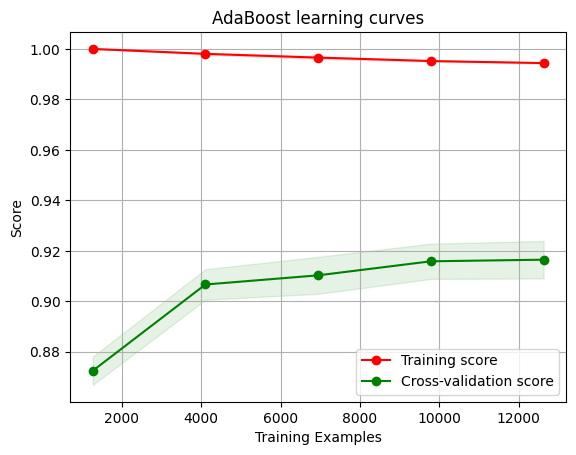

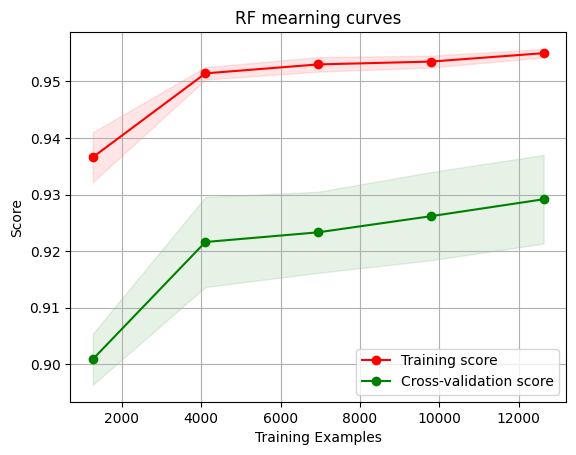

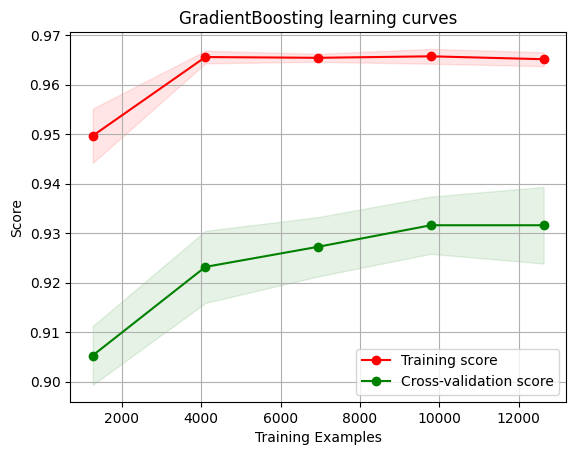

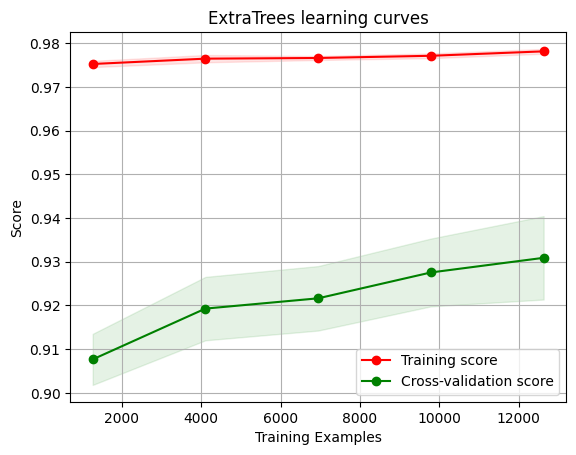

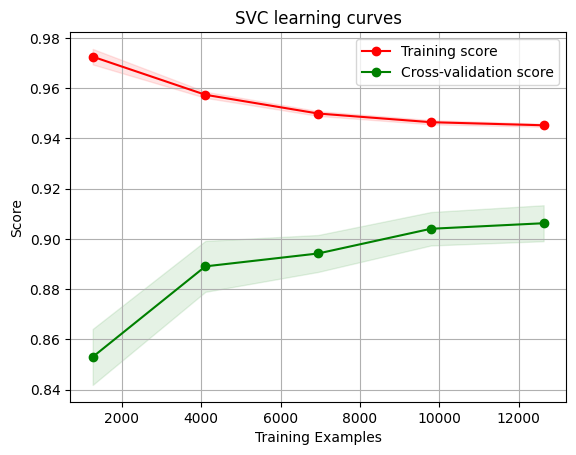

In [15]:
# Creamos una serie de gráficos plot para comparar las curvas de training y CV

%%time

g = plot_curva_aprendizaje(ADA_BEST, 'AdaBoost learning curves', X_train, y_train, cv = kfold)
g = plot_curva_aprendizaje(RFC_BEST, 'RF learning curves', X_train, y_train, cv = kfold)
g = plot_curva_aprendizaje(GBC_BEST,'GradientBoosting learning curves', X_train, y_train, cv = kfold)
g = plot_curva_aprendizaje(EXT_BEST, 'ExtraTrees learning curves', X_train, y_train, cv = kfold)
g = plot_curva_aprendizaje(SVC_BEST, 'SVC learning curves', X_train, y_train, cv = kfold)

Los clasificadores SVC y RandomForest parecen generalizar mejor la predicción ya que las curvas de entrenamiento y validación cruzada están en menor distancia entre si, sobretodo en comparación al resto de los modelos los cuales muestran más tendencia a sobreajustarse al entrenamiento, considerando las crecientes de las curvas de validación cruzada.

### Importancia de las características

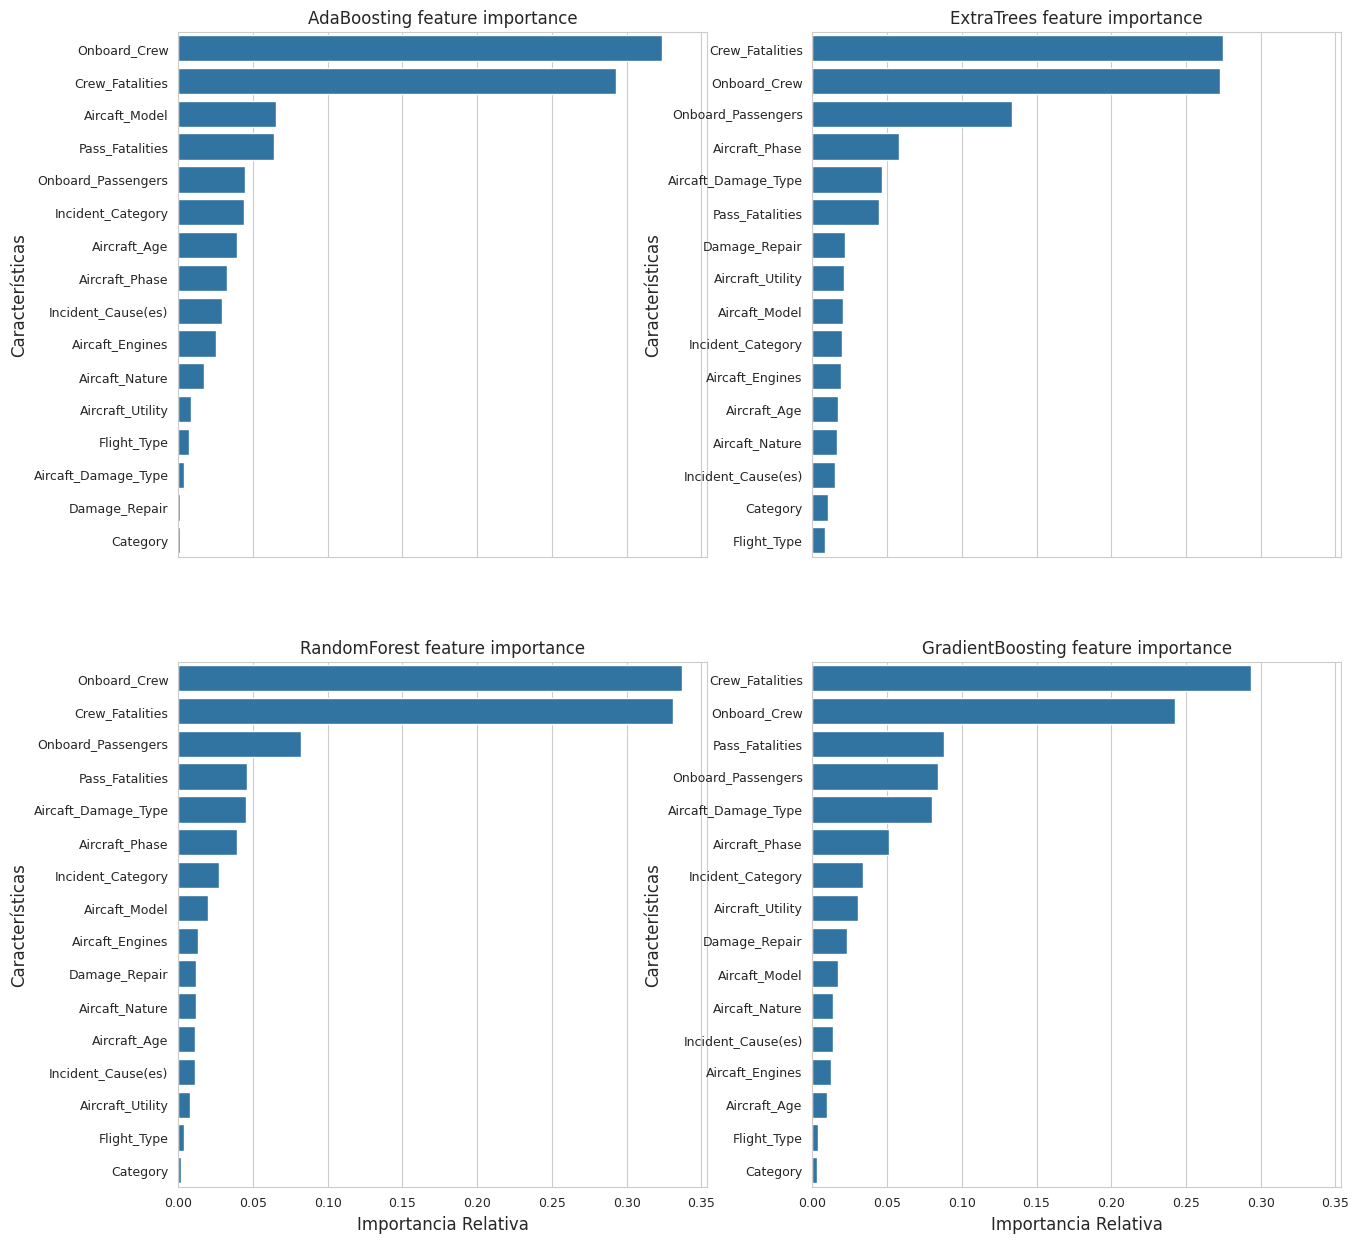

In [40]:
# Creamos una serie de gráficos de columnas horizontales para PCA

nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows,
                         ncols = ncols,
                         sharex = 'all',
                         figsize = (15, 15))

names_classifiers = [('AdaBoosting', ADA_BEST),
                      ('ExtraTrees', EXT_BEST),
                       ('RandomForest', RFC_BEST),
                        ('GradientBoosting', GBC_BEST),
                         ('SVC', SVC_BEST)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y = X_train.columns[indices][:40],
                        x = classifier.feature_importances_[indices][:40],
                        orient = 'h',
                        ax = axes[row][col])

        g.set_xlabel('Importancia Relativa', fontsize = 12)
        g.set_ylabel('Características', fontsize = 12)
        g.tick_params(labelsize = 9)
        g.set_title(name + ' feature importance')
        nclassifier += 1


Graficamos la importancia de las características para los 5 clasificadores, los cuales sólo se muestran los basados en árboles (Adaboost, ExtraTrees, RandomForest y GradientBoosting).\
Se puede observar que los 4 tienen performance similares en cuanto a las características principales según la importancia relativa. En éste caso, con las variables numéricas de fuerte correlación con el target y tiene sentido si consideramos que la variable 'Survival_Prob' fue creada en base a un cálculo entre pasajeros y fatalidades.\
Quitando dichas características podemos notar una leve diferencia en cuanto a las variables que fueran inicialmente categóricas:
- AdaBoosting performa sobre el modelo de aeronaves.
- ExtraTrees performa sobre la fase de vuelo y daño en aeronave.
- RandomForest performa sobre daño en aeronave.
- GradientBoosting performa sobre daño en aeronave y fase de vuelo.

### Correlación de predicciones

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


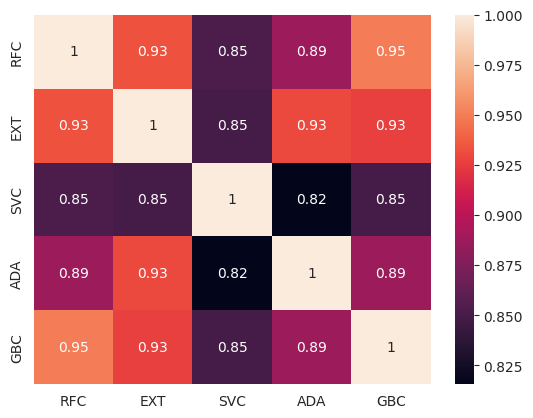

In [48]:
# Creamos un mapa de calor de matriz de correlación

test_Survival_RFC = pd.Series(RFC_BEST.predict(X), name = 'RFC')
test_Survival_EXT = pd.Series(EXT_BEST.predict(X), name = 'EXT')
test_Survival_SVC = pd.Series(SVC_BEST.predict(X), name = 'SVC')
test_Survival_ADA = pd.Series(ADA_BEST.predict(X), name = 'ADA')
test_Survival_GBC = pd.Series(GBC_BEST.predict(X), name = 'GBC')



ensemble_results = pd.concat([test_Survival_RFC,
                              test_Survival_EXT,
                              test_Survival_SVC,
                              test_Survival_ADA,
                              test_Survival_GBC],
                              axis = 1)


g= sns.heatmap(ensemble_results.corr(), annot = True)

Los 5 clasificadores arrojan predicciones similares o al menos de un alto valor, aunque existen algunas diferencias. Igualmente estas diferencias entre dichas predicciones son suficientes para considerar una votación conjunta.

## **[ENSAMBLE Y PREDICCIÓN](#scrollTo=FNLamiM5YI3E)**

Se elige un clasificador de votación 'VotingClassifier' para combinar las predicciones de los 5 clasificadores, con el argumento 'suave' (voting='soft') respecto al parámetro de votación para tener en cuenta la probabilidad de cada voto.\
Por último, generamos las predicciones y guardamos los resultados.

In [59]:
voting_c = VotingClassifier(estimators=[('RFC', RFC_BEST),
                                       ('EXT', EXT_BEST),
                                       ('SVC', SVC_BEST),
                                       ('ADA', ADA_BEST),
                                       ('GBC', GBC_BEST)],
                           voting='soft', n_jobs=4)

voting_c = voting_c.fit(X_train, y_train)

voting_c

VotingClassifier(estimators=[('RFC',
                              RandomForestClassifier(bootstrap=False,
                                                     max_features=10,
                                                     min_samples_leaf=10,
                                                     min_samples_split=3,
                                                     n_estimators=300)),
                             ('EXT',
                              ExtraTreesClassifier(max_features=10,
                                                   min_samples_split=10,
                                                   n_estimators=300)),
                             ('SVC', SVC(C=100, gamma=0.1, probability=True)),
                             ('ADA',
                              AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy'),
                                                 learning_rate=0.1,
                                                 n_estimators=2,
                                                 random_state=42)),
                             ('GBC',
                              GradientBoostingClassifier(loss='deviance',
                                                         max_depth=8,
                                                         max_features=0.3,
                                                         min_samples_leaf=150,
                                                         n_estimators=300))],
                 n_jobs=4, voting='soft')

In [63]:
# Predecimos y guardamos resultados

test_Survival = pd.Series(voting_c.predict(X),
                          name = 'Survival_Prob')

results_ensemble = pd.concat([pd.Series(X.index, name='Index'),
                              test_Survival], axis=1)

results_ensemble.to_csv('Ensemble_Voting_Results.csv', index=False)
files.download('Ensemble_Voting_Results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **[VERSIONES PREVIAS](#scrollTo=FNLamiM5YI3E)**

Link del repositorio que contiene el proyecto final y de cada desafío y pre entrega solicitada por la comisión:

- Desafío clase 05 (31/08/23) - [link](https://github.com/leodaviri/proyecto_final_DS_coderhouse/blob/main/Aircraft%20Incident_Iriarte%20Leonardo.ipynb)
- Desafío clase 08 (14/09/23) - [link](https://github.com/leodaviri/proyecto_final_DS_coderhouse/blob/main/Aircraft%20Incident_Iriarte%20Leonardo(v2).ipynb)
- Desafío clase 12 (26/09/23) - [link](https://github.com/leodaviri/proyecto_final_DS_coderhouse/blob/main/ProyectoDS_ParteI_Iriarte%20Leonardo.ipynb)
- Desafío clase 17 (12/10/23) - [link](https://github.com/leodaviri/proyecto_final_DS_coderhouse/blob/main/ProyectoDS_ParteII_Iriarte%20Leonardo.ipynb)
- Desafío clase 19 (19/10/23) - [link](https://github.com/leodaviri/proyecto_final_DS_coderhouse/blob/main/ProyectoDS_ParteIII_Iriarte%20Leonardo(bw).ipynb)
- Pre entrega clase 21 (26/10/23) - [link](https://github.com/leodaviri/proyecto_final_DS_coderhouse/blob/main/PrimeraEntrega_Iriarte%20Leonardo.ipynb)
- Desafío clase 27 (16/11/23) - [link](https://github.com/leodaviri/proyecto_final_DS_coderhouse/blob/main/Desafio_APIS_Iriarte_Leonardo.ipynb)
- Desafío clase 29 (23/11/23) - [link](https://github.com/leodaviri/proyecto_final_DS_coderhouse/blob/main/Data_Wrangling_Iriarte_Leonardo.ipynb)
- Desafío clase 33 (07/12/23) - [link](https://github.com/leodaviri/proyecto_final_DS_coderhouse/blob/main/Data_StoryTelling_Iriarte_Leonardo.ipynb)
- Desafío clase 36 (19/12/23) - [link](https://github.com/leodaviri/proyecto_final_DS_coderhouse/blob/main/Data_StoryTelling_Iriarte_Leonardo(v2).ipynb)
- Pre entrega clase 38 (02/01/24) - [link](https://github.com/leodaviri/proyecto_final_DS_coderhouse/blob/main/Data_StoryTelling_Iriarte_Leonardo(v3).ipynb)
- Desafío clase 42 (16/01/24) - [link](https://github.com/leodaviri/proyecto_final_DS_coderhouse/blob/main/Desafio_AlgoritmoML_MVP_Iriarte_Leonardo(clasificacion).ipynb)
- Desafío clase 45 (25/01/24) - [link](https://github.com/leodaviri/proyecto_final_DS_coderhouse/blob/main/Desafio_EvaluacionML_Iriarte_Leonardo(labels).ipynb)
- Desafío clase 47 (01/02/24) - [link](https://github.com/leodaviri/proyecto_final_DS_coderhouse/blob/main/Desaf%C3%ADo_FeatureSelection_Iriarte_Leonardo(clasificacion-LE).ipynb)
- Desafío clase 49 (08/02/24) - [link](https://github.com/leodaviri/proyecto_final_DS_coderhouse/blob/main/Desafio_CrossValidation_Iriarte_Leonardo(clasificacion).ipynb)

---

## **[AGRADECIMIENTOS](#scrollTo=FNLamiM5YI3E)**

A los profes, Fran, Dani y Noe, cada uno aportó a su manera, pero a Fran sobretodo, no sólo porque fue el profe con más tiempo dedicado, si no que supo ser ágil y hacerse entender.\
A los tutores que me fueron tocando durante la cursada Marian (me ayudó mucho en el comienzo), Ariana y Lucho.\
Párrafo aparte para Lucho, estuvo de principio a fin, aportó siempre en zoom, en el chat de zoom y el chat de la plataforma.\
A Coderhouse, la plataforma que me permitió volver a estudiar después de casi 15 años, con la flexibilidad horaria y un material muy completo que aporta aún más variedad de enseñanza.


A todos/as, muchas gracias.

In [115]:
zh_arg = pytz.timezone('America/Argentina/Cordoba')

ultima_actualizacion = datetime.now(zh_arg)
formato_actual = ultima_actualizacion.strftime('%d/%m/%Y %H:%M:%S')

print('Última actualización:', formato_actual)

Última actualización: 08/03/2024 03:08:22
